### - SVs Unmatched Analysis: TRIPLE CALLER

Same comparison of results between Matched and Unmatched SVs analysis, but this time considering the particular orientation of TRAs, in order to check the identification of the exact same event in the other set of results.

In [1]:
import isabl_cli as ii
import os

In [2]:
from pybedtools import BedTool

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
from matplotlib_venn import venn2, venn2_circles

In [6]:
os.path.basename('/work/isabl/data/analyses/29/38/252938/IID_H158604_T01_01_WG01.bam').strip('.bam')

'IID_H158604_T01_01_WG01'

In [7]:
os.path.join('/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_SVs', 'IID_H158604_T01_01_WG01')

'/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_SVs/IID_H158604_T01_01_WG01'

### - annotSV:

In this file there's going to be applied the filters of SVs from the Merge of the Triple Caller, but without the information regarding svABA and GRIDSS scores.

In [7]:
#withbrass
path='/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/*/*.merged.annotated.tsv'
withbrass=!ls {path}
print(len(withbrass))
withbrass

58


['/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158604_T01_01_WG01/IID_H158604_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158605_T01_01_WG01/IID_H158605_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158606_T01_01_WG01/IID_H158606_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158607_T01_01_WG01/IID_H158607_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158608_T01_01_WG01/IID_H158608_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpi

# - Benchmarking SVs: uk_ALL

In [8]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1- Matched Data: Brass + Triple Caller

In [9]:
total_brass_uk=!isabl get-outdirs -fi application__name BRASS -fi targets__projects 321 -fi status SUCCEEDED
del total_brass_uk[0]
print(len(total_brass_uk))

total_tc_uk=!isabl get-outdirs -fi application__name ANNOT_SVS -fi targets__projects 321 -fi status SUCCEEDED
del total_tc_uk[0]
len(total_tc_uk)

57


57

In [10]:
total_tc_uk[0:10]

['/work/isabl/data/analyses/06/21/260621',
 '/work/isabl/data/analyses/06/22/260622',
 '/work/isabl/data/analyses/06/23/260623',
 '/work/isabl/data/analyses/06/24/260624',
 '/work/isabl/data/analyses/06/25/260625',
 '/work/isabl/data/analyses/06/26/260626',
 '/work/isabl/data/analyses/06/27/260627',
 '/work/isabl/data/analyses/06/29/260629',
 '/work/isabl/data/analyses/06/30/260630',
 '/work/isabl/data/analyses/06/31/260631']

There are 57 samples for uk_all with a Brass and Annot_SVs ouputs. (TC=Triple Caller).

In [11]:
#Extract the name of the cases by BRASS and use them for the Triple Caller
samples_isabl=[]
for n in total_brass_uk:
    path=n+'/*.bedpe'
    file=!ls {path}
    samples_isabl.append(file[0].split('/')[8].split('_vs')[0])
samples_isabl[0]

'IID_H158612_T01_01_WG01'

In [12]:
triple_full=pd.DataFrame()
for n in samples_isabl:
    #isabl
    list_annotSVs=!isabl get-outdirs -fi application__name ANNOT_SVS -fi targets__system_id {n}
    path=list_annotSVs[1]+'/merged_svs.pass.annotated.tsv'
    svs_pass=!ls {path}
    triple_patient=pd.read_csv(svs_pass[0],sep='\t')
    triple_patient['Sample']=n
    
    #num_reads=list()
    #for index,row in triple_patient.iterrows():
        #for f in row['INFO'].split(';'):
            #if ('brass_TSRDS' in f):
                #reads=len(f.split(','))
                #num_reads.append(reads)

    #print(len(num_reads))
    #print(triple_patient.shape)
    #triple_patient['score']=num_reads
    
    triple_patient=triple_patient[['SV chrom','SV start','SV end','ID','SV type','Sample']]
    triple_full=triple_full.append(triple_patient)
    
print(triple_full.shape)
triple_full.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (35,38,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(52845, 6)


,SV chrom,SV start,SV end,ID,SV type,Sample
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
1,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
2,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01
4,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01


In [13]:
triple_full_dup=triple_full.drop_duplicates()
print(triple_full_dup.shape)

(1488, 6)


In [14]:
counts=triple_full_dup.groupby('Sample').size()
counts=pd.DataFrame(counts).sort_values(by=[0],ascending=False)
counts['Sample']=counts.index
counts.columns = ['SV Events', 'Samples']
counts.head()

,SV Events,Samples
Sample,,
IID_H158636_T01_01_WG01,179,IID_H158636_T01_01_WG01
IID_H158613_T01_01_WG01,127,IID_H158613_T01_01_WG01
IID_H158615_T01_01_WG01,80,IID_H158615_T01_01_WG01
IID_H158646_T01_01_WG01,58,IID_H158646_T01_01_WG01
IID_H158616_T01_01_WG01,58,IID_H158616_T01_01_WG01


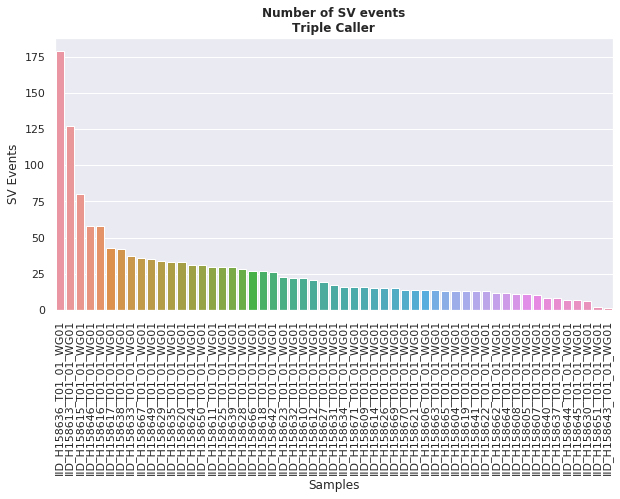

In [15]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=counts, x='Samples', y='SV Events')
plt.xticks(rotation=90)
ax.set_title('Number of SV events\nTriple Caller',weight='bold')
#plt.xticks(rotation=45)
plt.show()

- Number Reads:

In [16]:
triple_full_info=pd.DataFrame()
for n in samples_isabl:
    #isabl
    list_annotSVs=!isabl get-outdirs -fi application__name ANNOT_SVS -fi targets__system_id {n}
    path=list_annotSVs[1]+'/merged_svs.pass.annotated.tsv'
    svs_pass=!ls {path}
    triple_patient_info=pd.read_csv(svs_pass[0],sep='\t')
    triple_patient_info['Sample']=n
    
    #Number of Reads
    brass_RC=[]
    gridss_VF=[]
    svaba_AD=[]
    brass_PS=[]
    gridss_RF=[]
    svaba_DP=[]
    for index,row in triple_patient_info.iterrows():
        format_list=row['FORMAT'].split(':')
        if ('brass_PS' in format_list):
            brass_PS.append(row[str(n)].split(':')[format_list.index('brass_PS')])
            brass_RC.append(row[str(n)].split(':')[format_list.index('brass_RC')])
        else:
            brass_PS.append(0)
            brass_RC.append(0)
            
        if ('gridss_VF' in format_list):    
            gridss_VF.append(row[str(n)].split(':')[format_list.index('gridss_VF')])
            #gridss_RF.append(row[str(n)].split(':')[format_list.index('gridss_RF')-1])
        else:
            gridss_VF.append(0)
            gridss_RF.append(0)
            
        if ('svaba_AD' in format_list):
            svaba_AD.append(row[str(n)].split(':')[format_list.index('svaba_AD')])
            #svaba_DP.append(row[str(n)].split(':')[format_list.index('svaba_DP')-1])
        else:
            svaba_AD.append(0)
            svaba_DP.append(0)
        

    #print(len(num_reads))
    #print(triple_patient.shape)
    #triple_patient['score']=num_reads
    

    triple_patient_info['brass_PS']=brass_PS
    triple_patient_info['brass_RC']=brass_RC
    triple_patient_info['gridss_VF']=gridss_VF
    triple_patient_info['svaba_AD']=svaba_AD
    
    triple_patient_info=triple_patient_info[triple_patient_info['AnnotSV type']=='full']
    triple_patient_info=triple_patient_info[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD']]
    triple_full_info=triple_full_info.append(triple_patient_info)
    
print(triple_full_info.shape)
triple_full_info.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (35,38,63) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1487, 10)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9
12,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,22,7,31,13
14,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,0,8
16,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,24,8,28,28


In [17]:
triple_full_info_dup=triple_full_info.drop_duplicates()
print(triple_full_info_dup.shape)

(1487, 10)


### 2- TINder SVs:

### A) Two or more callers

In [18]:
#withbrass
path='/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/*/*.merged.annotated.tsv'
tinder_svs=!ls {path}
print(len(tinder_svs))
tinder_svs

58


['/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158604_T01_01_WG01/IID_H158604_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158605_T01_01_WG01/IID_H158605_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158606_T01_01_WG01/IID_H158606_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158607_T01_01_WG01/IID_H158607_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/sv_triplecaller_merge/annotated/universal_normal/IID_H158608_T01_01_WG01/IID_H158608_T01_01_WG01.merged.annotated.tsv',
 '/work/isabl/home/zhouy1/unmatechedSVpi

#### - Outputs Joe's Annotation:

In [25]:
tinder_full=pd.DataFrame(columns=['SV chrom','SV start','ALT','SV length','SV type','Gene name','AnnotSV type','INFO','FORMAT','GD_AF','GD_POPMAX_AF'])

for n in tinder_svs:
    #Joe's output click_annotsv
    name=n.split('/')[11]
    tinder_annot_filters = pd.read_csv(n,sep='\t')

    #Full
    tinder_annot_filters_full=tinder_annot_filters[tinder_annot_filters['AnnotSV type']=='full']
    tinder_annot_filters_full=tinder_annot_filters_full[['SV chrom','SV start','ALT','SV length','SV type','Gene name','AnnotSV type','INFO','FORMAT','GD_AF','GD_POPMAX_AF',str(name)]]
    tinder_annot_filters_full['Sample']=name
    
    #Number of Reads
    gridss_VF=[]
    svaba_AD=[]
    brass_PS=[]
    brass_RC=[]
    
    brass_tag='brass_'+name+'_PS'
    brass_tag_rc='brass_'+name+'_RC'
    
    strands=[]
    
    for index,row in tinder_annot_filters_full.iterrows():
        format_list=row['FORMAT'].split(':')
        if (brass_tag in format_list):
            brass_PS.append(row[str(name)].split(':')[format_list.index(brass_tag)])
            brass_RC.append(row[str(name)].split(':')[format_list.index(brass_tag_rc)])
        else:
            brass_PS.append(0)
            brass_RC.append(0)
            
        if ('gridss_VF' in format_list):    
            gridss_VF.append(row[str(name)].split(':')[format_list.index('gridss_VF')])
        else:
            gridss_VF.append(0)
            
        if ('svaba_AD' in format_list):
            svaba_AD.append(row[str(name)].split(':')[format_list.index('svaba_AD')])
        else:
            svaba_AD.append(0)
        
        if(row['SV type']=='TRA'):
            strands.append(row['INFO'].split(';')[4].split('=')[1])
        else:
            strands.append(row['INFO'].split(';')[5].split('=')[1])
    

    tinder_annot_filters_full['brass_PS']=brass_PS
    tinder_annot_filters_full['brass_RC']=brass_RC
    tinder_annot_filters_full['gridss_VF']=gridss_VF
    tinder_annot_filters_full['svaba_AD']=svaba_AD
    tinder_annot_filters_full['STRANDS']=strands
    
    tinder_annot_filters_full.drop(columns=['FORMAT'],inplace=True)

    tinder_full=tinder_full.append(tinder_annot_filters_full)

tinder_full=tinder_full[['SV chrom','SV start','ALT','SV length','SV type','Gene name','STRANDS','GD_AF','GD_POPMAX_AF','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD']]
tinder_full=tinder_full.reset_index(drop=True)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,35,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/pyt

In [28]:
print(tinder_full.shape)
tinder_full[tinder_full['brass_PS']!=0].head()

(143500, 14)


,SV chrom,SV start,ALT,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
102,1,159420252,]17:55923716]N,NaN,TRA,NaN,-+,-1,-1.0,IID_H158604_T01_01_WG01,5,0,0,0
209,10,34177954,]11:65607032]N,NaN,TRA,NaN,-+,-1,-1.0,IID_H158604_T01_01_WG01,5,0,0,0
256,10,120303654,]10:120305644]N,1990.0,DUP,NaN,-+,-1,-1.0,IID_H158604_T01_01_WG01,30,0,62,36
300,11,37429053,]17:10138559]N,NaN,TRA,NaN,-+,-1,-1.0,IID_H158604_T01_01_WG01,5,0,0,0
384,12,6613399,[22:41443456[N,NaN,TRA,NCAPD2,--,-1,-1.0,IID_H158604_T01_01_WG01,32,0,0,0


In [29]:
print('DELs',tinder_full[tinder_full['SV type']=='DEL'].shape)
print('DUPs',tinder_full[tinder_full['SV type']=='DUP'].shape)
print('TRAs',tinder_full[tinder_full['SV type']=='TRA'].shape)

DELs (98155, 14)
DUPs (22467, 14)
TRAs (11819, 14)


### -Checking TRAs problem:

In [30]:
tinder_full[((tinder_full['brass_PS']==0) & (tinder_full['gridss_VF']==0) & (tinder_full['svaba_AD']==0))].shape

(0, 14)

In [31]:
tinder_full[((tinder_full['gridss_VF']==0) & (tinder_full['svaba_AD']==0))].shape

(1763, 14)

In [32]:
print(tinder_full[tinder_full['brass_PS']!=0].shape)
tinder_full_brass=tinder_full[tinder_full['brass_PS']!=0]
tinder_full_brass=tinder_full_brass.reset_index()
tinder_full_brass.head()

(3322, 14)


,index,SV chrom,SV start,ALT,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
0,102,1,159420252,]17:55923716]N,NaN,TRA,NaN,-+,-1,-1.0,IID_H158604_T01_01_WG01,5,0,0,0
1,209,10,34177954,]11:65607032]N,NaN,TRA,NaN,-+,-1,-1.0,IID_H158604_T01_01_WG01,5,0,0,0
2,256,10,120303654,]10:120305644]N,1990.0,DUP,NaN,-+,-1,-1.0,IID_H158604_T01_01_WG01,30,0,62,36
3,300,11,37429053,]17:10138559]N,NaN,TRA,NaN,-+,-1,-1.0,IID_H158604_T01_01_WG01,5,0,0,0
4,384,12,6613399,[22:41443456[N,NaN,TRA,NCAPD2,--,-1,-1.0,IID_H158604_T01_01_WG01,32,0,0,0


In [33]:
print('DELs',tinder_full_brass[((tinder_full_brass['brass_PS']!=0) & (tinder_full_brass['SV type']=='DEL'))].shape)
print('DUPs',tinder_full_brass[((tinder_full_brass['brass_PS']!=0) & (tinder_full_brass['SV type']=='DUP'))].shape)
print('TRAs',tinder_full_brass[((tinder_full_brass['brass_PS']!=0) & (tinder_full_brass['SV type']=='TRA'))].shape)

DELs (866, 15)
DUPs (349, 15)
TRAs (1533, 15)


- TINder: at least Brass + Other

In [37]:
tinder_full_brass['brass_PS']=tinder_full_brass['brass_PS'].map(int)
tinder_full_brass['brass_RC']=tinder_full_brass['brass_RC'].map(int)
tinder_full_brass['gridss_VF']=tinder_full_brass['gridss_VF'].map(int)
tinder_full_brass['svaba_AD']=tinder_full_brass['svaba_AD'].map(int)

tinder_full_2callers=pd.DataFrame(columns=['SV chrom','SV start','ALT','SV length','SV type','Gene name','STRANDS','GD_AF','GD_POPMAX_AF','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD'])
for index,row in tinder_full_brass.iterrows():    
    if ( ((row.brass_PS!=0) & (row.gridss_VF!=0)) | ((row.brass_PS!=0) & (row.svaba_AD!=0))):
        tinder_full_2callers=tinder_full_2callers.append(row)

print(tinder_full_2callers.shape)            
tinder_full_2callers.head()        

(1559, 15)


,SV chrom,SV start,ALT,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,index
2,10,120303654,]10:120305644]N,1990.0,DUP,NaN,-+,-1,-1.000000,IID_H158604_T01_01_WG01,30,0,62,36,256.0
5,12,6791754,N]22:41528146],NaN,TRA,ZNF384,++,-1,-1.000000,IID_H158604_T01_01_WG01,45,0,60,43,386.0
7,14,22866689,N[14:23004506[,137817.0,DEL,LOC105370401,+-,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,24,66,38,622.0
8,14,49067540,N[14:49429620[,362080.0,DEL,NaN,+-,-1,-1.000000,IID_H158604_T01_01_WG01,61,11,78,33,645.0
9,14,49407635,N]14:49461451],53816.0,INV,NaN,++,-1,-1.000000,IID_H158604_T01_01_WG01,21,0,40,40,646.0


In [35]:
print('DELs',tinder_full_2callers[((tinder_full_brass['brass_PS']!=0) & (tinder_full_2callers['SV type']=='DEL'))].shape)
print('DUPs',tinder_full_2callers[((tinder_full_brass['brass_PS']!=0) & (tinder_full_2callers['SV type']=='DUP'))].shape)
print('TRAs',tinder_full_2callers[((tinder_full_brass['brass_PS']!=0) & (tinder_full_2callers['SV type']=='TRA'))].shape)

DELs (666, 15)
DUPs (208, 15)
TRAs (371, 15)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
tinder_full_2callers_rc=pd.DataFrame(columns=['SV chrom','SV start','ALT','SV length','SV type','Gene name','STRANDS','GD_AF','GD_POPMAX_AF','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD'])
for index,row in tinder_full_brass.iterrows():    
    if ( ((row.brass_RC!=0) & (row.gridss_VF!=0)) | ((row.brass_PS!=0) & (row.svaba_AD!=0))):
        tinder_full_2callers_rc=tinder_full_2callers_rc.append(row)

print(tinder_full_2callers_rc.shape)            
tinder_full_2callers_rc.head()   

(1445, 15)


,SV chrom,SV start,ALT,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,index
2,10,120303654,]10:120305644]N,1990.0,DUP,NaN,-+,-1,-1.000000,IID_H158604_T01_01_WG01,30,0,62,36,256.0
5,12,6791754,N]22:41528146],NaN,TRA,ZNF384,++,-1,-1.000000,IID_H158604_T01_01_WG01,45,0,60,43,386.0
7,14,22866689,N[14:23004506[,137817.0,DEL,LOC105370401,+-,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,24,66,38,622.0
8,14,49067540,N[14:49429620[,362080.0,DEL,NaN,+-,-1,-1.000000,IID_H158604_T01_01_WG01,61,11,78,33,645.0
9,14,49407635,N]14:49461451],53816.0,INV,NaN,++,-1,-1.000000,IID_H158604_T01_01_WG01,21,0,40,40,646.0


In [38]:
tinder_full_2callers=tinder_full_2callers[['SV chrom','SV start','ALT','SV length','SV type','Gene name','STRANDS','GD_AF','GD_POPMAX_AF','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD']]
tinder_full_2callers.head()                      

,SV chrom,SV start,ALT,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,]10:120305644]N,1990.0,DUP,NaN,-+,-1,-1.000000,IID_H158604_T01_01_WG01,30,0,62,36
5,12,6791754,N]22:41528146],NaN,TRA,ZNF384,++,-1,-1.000000,IID_H158604_T01_01_WG01,45,0,60,43
7,14,22866689,N[14:23004506[,137817.0,DEL,LOC105370401,+-,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,24,66,38
8,14,49067540,N[14:49429620[,362080.0,DEL,NaN,+-,-1,-1.000000,IID_H158604_T01_01_WG01,61,11,78,33
9,14,49407635,N]14:49461451],53816.0,INV,NaN,++,-1,-1.000000,IID_H158604_T01_01_WG01,21,0,40,40


In [39]:
tinder_full_2callers_format=tinder_full_2callers.copy()

alt=[]
for index,row in tinder_full_2callers_format.iterrows():
    row['ALT']=row['ALT'].replace(']','').replace('N','').replace('[','')
    alt.append(row['ALT'])

tinder_full_2callers_format['ALT']=alt
tinder_full_2callers_format.head()

,SV chrom,SV start,ALT,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,10:120305644,1990.0,DUP,NaN,-+,-1,-1.000000,IID_H158604_T01_01_WG01,30,0,62,36
5,12,6791754,22:41528146,NaN,TRA,ZNF384,++,-1,-1.000000,IID_H158604_T01_01_WG01,45,0,60,43
7,14,22866689,14:23004506,137817.0,DEL,LOC105370401,+-,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,24,66,38
8,14,49067540,14:49429620,362080.0,DEL,NaN,+-,-1,-1.000000,IID_H158604_T01_01_WG01,61,11,78,33
9,14,49407635,14:49461451,53816.0,INV,NaN,++,-1,-1.000000,IID_H158604_T01_01_WG01,21,0,40,40


In [40]:
sv_chrom2=[]
sv_start2=[]
for index,row in tinder_full_2callers_format.iterrows():
    sv_chrom2.append(row['ALT'].split(':')[0])
    sv_start2.append(row['ALT'].split(':')[1])
tinder_full_2callers_format['SV chrom2']=sv_chrom2
tinder_full_2callers_format['SV start2']=sv_start2
tinder_full_2callers_format2=tinder_full_2callers_format[['SV chrom','SV start','SV chrom2','SV start2','SV length','SV type','Gene name','STRANDS','GD_AF','GD_POPMAX_AF','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD']]
tinder_full_2callers_format2['SV start']=tinder_full_2callers_format2['SV start'].map(int)
tinder_full_2callers_format2['SV start2']=tinder_full_2callers_format2['SV start2'].map(int)

sv_length=[]
for index,row in tinder_full_2callers_format2.iterrows():
    if(row['SV type']=='TRA'):
        sv_length.append('NaN')
    else:
        sv_length.append(row['SV start2']-row['SV start'])
        
tinder_full_2callers_format2['SV length']=sv_length

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site

In [41]:
#tinder_full_2callers_format2[tinder_full_2callers_format2['gridss_VF']==0].head()
tinder_full_2callers_format2.head()

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-+,-1,-1.000000,IID_H158604_T01_01_WG01,30,0,62,36
5,12,6791754,22,41528146,NaN,TRA,ZNF384,++,-1,-1.000000,IID_H158604_T01_01_WG01,45,0,60,43
7,14,22866689,14,23004506,137817,DEL,LOC105370401,+-,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,24,66,38
8,14,49067540,14,49429620,362080,DEL,NaN,+-,-1,-1.000000,IID_H158604_T01_01_WG01,61,11,78,33
9,14,49407635,14,49461451,53816,INV,NaN,++,-1,-1.000000,IID_H158604_T01_01_WG01,21,0,40,40


[NOTE: 'SV lenght' with TRA it is not informative]

In [42]:
print(tinder_full_2callers_format2.shape)
tinder_full_2callers_format2.head()

(1559, 15)


,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-+,-1,-1.000000,IID_H158604_T01_01_WG01,30,0,62,36
5,12,6791754,22,41528146,NaN,TRA,ZNF384,++,-1,-1.000000,IID_H158604_T01_01_WG01,45,0,60,43
7,14,22866689,14,23004506,137817,DEL,LOC105370401,+-,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,24,66,38
8,14,49067540,14,49429620,362080,DEL,NaN,+-,-1,-1.000000,IID_H158604_T01_01_WG01,61,11,78,33
9,14,49407635,14,49461451,53816,INV,NaN,++,-1,-1.000000,IID_H158604_T01_01_WG01,21,0,40,40


- Unmatched:

In [43]:
#Take into account that one of the patients is unmatched (IID_H158647_T01_01_WG01)
tinder_full_set=tinder_full_2callers_format2[~(tinder_full_2callers_format2['Sample']=='IID_H158647_T01_01_WG01')]
print(tinder_full_2callers_format2.shape,'\t',tinder_full_set.shape)

(1559, 15) 	 (1544, 15)


- BTG:

In [44]:
#Take into account that five patients have not unmatched results (IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01,IID_H158647_T01_01_WG01)
#brass_full_set=brass_full[~( (brass_full['sample']=='IID_H158639_T01_01_WG01') | (brass_full['sample']=='IID_H158668_T01_01_WG01')  |(brass_full['sample']=='IID_H158607_T01_01_WG01') | (brass_full['sample']=='IID_H158613_T01_01_WG01') | (brass_full['sample']=='IID_H158634_T01_01_WG01'))]
#print(brass_full.shape,'\t',brass_full_set.shape)

### - gnomAD Germline Events: tinder_full_set

In [45]:
tinder_full_set=tinder_full_set[tinder_full_set['GD_POPMAX_AF']<=0.02]
tinder_full_set.shape

(1485, 15)

In [46]:
tinder_full_set.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-+,-1,-1.0,IID_H158604_T01_01_WG01,30,0,62,36


In [47]:
print('DELs',tinder_full_set[((tinder_full_brass['brass_PS']!=0) & (tinder_full_set['SV type']=='DEL'))].shape)
print('DUPs',tinder_full_set[((tinder_full_brass['brass_PS']!=0) & (tinder_full_set['SV type']=='DUP'))].shape)
print('TRAs',tinder_full_set[((tinder_full_brass['brass_PS']!=0) & (tinder_full_set['SV type']=='TRA'))].shape)

DELs (598, 15)
DUPs (206, 15)
TRAs (368, 15)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


- keys:

In [48]:
tinder_full_set_keys=tinder_full_set.copy()
keys=[]
for index,row in tinder_full_set.iterrows():
    key=str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+row['Sample']
    keys.append(key)
tinder_full_set_keys['keys']=keys

### A) Intersection Deletion:

### 1.1) Output of TINder detected by the Triple Caller: red + yellow

In [43]:
tinder_full_set_DEL=tinder_full_set_keys[tinder_full_set_keys['SV type']=='DEL']
tinder_full_set_DEL_2intersect=tinder_full_set_DEL[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','keys']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DEL_2intersect['SV chrom']=tinder_full_set_DEL_2intersect['SV chrom'].map(str)
tinder_full_set_DEL_2intersect['SV length']=tinder_full_set_DEL_2intersect['SV length'].map(int)
tinder_full_set_DEL_2intersect['GD_AF']=tinder_full_set_DEL_2intersect['GD_AF'].map(str)
tinder_full_set_DEL_2intersect['GD_POPMAX_AF']=tinder_full_set_DEL_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_DEL_2intersect['brass_PS']=tinder_full_set_DEL_2intersect['brass_PS'].map(str)
tinder_full_set_DEL_2intersect['brass_RC']=tinder_full_set_DEL_2intersect['brass_RC'].map(str)
tinder_full_set_DEL_2intersect['gridss_VF']=tinder_full_set_DEL_2intersect['gridss_VF'].map(str)
tinder_full_set_DEL_2intersect['svaba_AD']=tinder_full_set_DEL_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DEL_2intersect.shape)
tinder_full_set_DEL_2intersect.head()

(598, 13)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.0058079999871552,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.0,61,11,78,33,14_49067540_14_49429620_IID_H158604_T01_01_WG01
10,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1,-1.0,36,20,62,32,14_102562994_14_106373075_IID_H158604_T01_01_WG01
43,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005078999791294336,0.0058079999871552,25,18,33,25,14_22892030_14_23002450_IID_H158605_T01_01_WG01
48,17,984908,986317,1409,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000132000001030974,36,12,51,37,17_984908_17_986317_IID_H158605_T01_01_WG01


In [44]:
triple_full_info_dup.head(2)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9


In [45]:
triple_full_info_dup_DEL=triple_full_info_dup[triple_full_info_dup['SV type']=='DEL']
print(triple_full_info_dup_DEL.shape)
triple_full_info_dup_DEL.head()

(789, 10)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9
12,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,22,7,31,13
14,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,0,8
16,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,24,8,28,28


In [46]:
triple_full_info_dup_DEL_2intersect=triple_full_info_dup_DEL.copy()
triple_full_info_dup_DEL_2intersect['keys']=triple_full_info_dup_DEL_2intersect['ID']+'_'+triple_full_info_dup_DEL_2intersect['Sample']

triple_full_info_dup_DEL_2intersect['to_index']=triple_full_info_dup_DEL_2intersect['keys']
triple_full_info_dup_DEL_2intersect.index = triple_full_info_dup_DEL_2intersect['to_index']
triple_full_info_dup_DEL_2intersect=triple_full_info_dup_DEL_2intersect[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_full_info_dup_DEL_2intersect.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
to_index,,,,,,,,,,
12_110895557_12_110907163_DEL_+-_IID_H158612_T01_01_WG01,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8
13_44716505_13_45010463_DEL_+-_IID_H158612_T01_01_WG01,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9
14_22866085_14_22918105_DEL_+-_IID_H158612_T01_01_WG01,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,22,7,31,13
14_22892030_14_22976665_DEL_+-_IID_H158612_T01_01_WG01,14,22892030,22976665,14_22892030_14_22976665_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,0,8
14_22908005_14_22918118_DEL_+-_IID_H158612_T01_01_WG01,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,24,8,28,28


In [49]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DEL_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_full_info_dup_DEL_2intersect.values.tolist())

I_deletions = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','size','SVtype','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','key','chr_band', 'start_band', 'end_band','ID','SV type','Sample.1','brass_PS.tr','brass_RC.tr','gridss_VF.tr','svaba_AD.tr'])
#I = I[I.chr_band!="X"]
print(I_deletions.shape)
I_deletions.head()

(5887, 23)


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr
0,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22908005,22918118,14_22908005_14_22918118_DEL_+-,DEL,IID_H158612_T01_01_WG01,24,8,28,28
1,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22908009,22918112,14_22908009_14_22918112_DEL_+-,DEL,IID_H158613_T01_01_WG01,48,27,69,34
2,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22907993,22918142,14_22907993_14_22918142_DEL_+-,DEL,IID_H158616_T01_01_WG01,13,5,19,9
3,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22907998,22918118,14_22907998_14_22918118_DEL_+-,DEL,IID_H158607_T01_01_WG01,33,7,43,13
4,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22907999,22918117,14_22907999_14_22918117_DEL_+-,DEL,IID_H158638_T01_01_WG01,31,24,61,29


In [50]:
I_deletions_PATIENT=I_deletions[I_deletions['Sample']==I_deletions['Sample.1']]
I_deletions_PATIENT['keys']=I_deletions_PATIENT['chr_seg'].map(str)+'_'+I_deletions_PATIENT['start_seg'].map(str)+'_'+I_deletions_PATIENT['end_seg'].map(str)+'_'+I_deletions_PATIENT['Sample'].map(str)
print(I_deletions_PATIENT.shape)
print(len(I_deletions_PATIENT['keys'].unique()))
I_deletions_PATIENT.head()

(556, 24)
378


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr,keys
24,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22950265,22981845,14_22950265_14_22981845_DEL_+-,DEL,IID_H158604_T01_01_WG01,19,18,45,26,14_22866689_23004506_IID_H158604_T01_01_WG01
48,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005079,0.005808,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14,22866689,23004506,14_22866689_14_23004506_DEL_+-,DEL,IID_H158604_T01_01_WG01,47,24,66,38,14_22866689_23004506_IID_H158604_T01_01_WG01
137,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1.000000,-1.000000,36,20,62,32,14_102562994_14_106373075_IID_H158604_T01_01_WG01,14,106330072,106667593,14_106330072_14_106667593_DEL_+-,DEL,IID_H158604_T01_01_WG01,36,0,54,40,14_102562994_106373075_IID_H158604_T01_01_WG01
170,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1.000000,-1.000000,36,20,62,32,14_102562994_14_106373075_IID_H158604_T01_01_WG01,14,102562994,106373075,14_102562994_14_106373075_DEL_+-,DEL,IID_H158604_T01_01_WG01,36,20,62,32,14_102562994_106373075_IID_H158604_T01_01_WG01
221,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005079,0.005808,25,18,33,25,14_22892030_14_23002450_IID_H158605_T01_01_WG01,14,22892029,22981836,14_22892029_14_22981836_DEL_+-,DEL,IID_H158605_T01_01_WG01,34,0,48,31,14_22892030_23002450_IID_H158605_T01_01_WG01


- Overlapping of deletions around 70%:

In [51]:
I_deletions_PATIENT['start_seg']=I_deletions_PATIENT['start_seg'].astype(int)
I_deletions_PATIENT['end_seg']=I_deletions_PATIENT['end_seg'].astype(int)
I_deletions_PATIENT['start_band']=I_deletions_PATIENT['start_band'].astype(int)
I_deletions_PATIENT['end_band']=I_deletions_PATIENT['end_band'].astype(int) 

I_deletions_70_PATIENT=pd.DataFrame()
for index,row in I_deletions_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_deletions_70_PATIENT=I_deletions_70_PATIENT.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_deletions_70_PATIENT=I_deletions_70_PATIENT.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_deletions_70_PATIENT=I_deletions_70_PATIENT.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_deletions_70_PATIENT=I_deletions_70_PATIENT.append(row)
            continue
   

print(I_deletions_70_PATIENT.shape)
print(len(I_deletions_70_PATIENT['keys'].unique()))
I_deletions_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(459, 24)
376


,GD_AF,GD_POPMAX_AF,ID,SV type,SVtype,Sample,Sample.1,brass_PS,brass_PS.tr,brass_RC,brass_RC.tr,chr_band,chr_seg,end_band,end_seg,gridss_VF,gridss_VF.tr,key,keys,size,start_band,start_seg,svaba_AD,svaba_AD.tr
48,0.005079,0.005808,14_22866689_14_23004506_DEL_+-,DEL,DEL,IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,47.0,47.0,24.0,24.0,14,14,23004506.0,23004506.0,66.0,66.0,14_22866689_14_23004506_IID_H158604_T01_01_WG01,14_22866689_23004506_IID_H158604_T01_01_WG01,137817.0,22866689.0,22866689.0,38.0,38.0
170,-1.000000,-1.000000,14_102562994_14_106373075_DEL_+-,DEL,DEL,IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,36.0,36.0,20.0,20.0,14,14,106373075.0,106373075.0,62.0,62.0,14_102562994_14_106373075_IID_H158604_T01_01_WG01,14_102562994_106373075_IID_H158604_T01_01_WG01,3810081.0,102562994.0,102562994.0,32.0,32.0
221,0.005079,0.005808,14_22892029_14_22981836_DEL_+-,DEL,DEL,IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,25.0,34.0,18.0,0.0,14,14,22981836.0,23002450.0,33.0,48.0,14_22892030_14_23002450_IID_H158605_T01_01_WG01,14_22892030_23002450_IID_H158605_T01_01_WG01,110420.0,22892029.0,22892030.0,25.0,31.0
222,0.005079,0.005808,14_22892030_14_23002450_DEL_+-,DEL,DEL,IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,25.0,25.0,18.0,18.0,14,14,23002450.0,23002450.0,33.0,33.0,14_22892030_14_23002450_IID_H158605_T01_01_WG01,14_22892030_23002450_IID_H158605_T01_01_WG01,110420.0,22892030.0,22892030.0,25.0,25.0
310,-1.000000,-1.000000,9_15424528_9_22380856_DEL_+-,DEL,DEL,IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,39.0,39.0,15.0,26.0,9,9,22380856.0,22380856.0,59.0,59.0,9_15424528_9_22380856_IID_H158605_T01_01_WG01,9_15424528_22380856_IID_H158605_T01_01_WG01,6956328.0,15424528.0,15424528.0,33.0,33.0


- Detected/NonDetected:

In [52]:
tinder_full_set_DEL.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
7,14,22866689,14,23004506,137817,DEL,LOC105370401,0.005078999791294336,0.005808,IID_H158604_T01_01_WG01,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01


In [53]:
tinder_full_set_DEL_DETECT=tinder_full_set_DEL[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','keys']]
tinder_full_set_DEL_DETECT.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.000000,61,11,78,33,14_49067540_14_49429620_IID_H158604_T01_01_WG01
10,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1,-1.000000,36,20,62,32,14_102562994_14_106373075_IID_H158604_T01_01_WG01
43,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005078999791294336,0.005808,25,18,33,25,14_22892030_14_23002450_IID_H158605_T01_01_WG01
48,17,984908,986317,1409,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000132,36,12,51,37,17_984908_17_986317_IID_H158605_T01_01_WG01


In [54]:
detection=[]
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if (str(row['keys']) in I_deletions_70_PATIENT['key'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_full_set_DEL_DETECT['Detection']=detection
tinder_full_set_DEL_DETECT[tinder_full_set_DEL_DETECT['Detection']=='Non Detected'].head()

598


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.000000,61,11,78,33,14_49067540_14_49429620_IID_H158604_T01_01_WG01,Non Detected
48,17,984908,986317,1409,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000132,36,12,51,37,17_984908_17_986317_IID_H158605_T01_01_WG01,Non Detected
64,5,60201995,60294535,92540,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000561,47,22,65,34,5_60201995_5_60294535_IID_H158605_T01_01_WG01,Non Detected
66,7,110382221,110493855,111634,DEL,IID_H158605_T01_01_WG01,-1,-1.000000,33,27,48,30,7_110382221_7_110493855_IID_H158605_T01_01_WG01,Non Detected
77,10,33723719,33726033,2314,DEL,IID_H158606_T01_01_WG01,4.70000013592653e-05,0.000132,70,27,82,35,10_33723719_10_33726033_IID_H158606_T01_01_WG01,Non Detected


In [55]:
print(tinder_full_set_DEL_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(598, 14)
376 222


In [56]:
#Joe
tinder_full_set_DEL_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_DEL_DETECT.tsv',sep='\t')

### 1.2) Precision: TripleCaller calls in TINder: yellow and green areas

In [57]:
tinder_full_set.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,0,62,36


In [58]:
tinder_full_set_DEL=tinder_full_set[tinder_full_set['SV type']=='DEL']
tinder_full_set_DEL_2intersect=tinder_full_set_DEL[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DEL_2intersect['SV length']=tinder_full_set_DEL_2intersect['SV length'].map(int)
tinder_full_set_DEL_2intersect['GD_AF']=tinder_full_set_DEL_2intersect['GD_AF'].map(str)
tinder_full_set_DEL_2intersect['GD_POPMAX_AF']=tinder_full_set_DEL_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_DEL_2intersect['brass_PS']=tinder_full_set_DEL_2intersect['brass_PS'].map(str)
tinder_full_set_DEL_2intersect['brass_RC']=tinder_full_set_DEL_2intersect['brass_RC'].map(str)
tinder_full_set_DEL_2intersect['gridss_VF']=tinder_full_set_DEL_2intersect['gridss_VF'].map(str)
tinder_full_set_DEL_2intersect['svaba_AD']=tinder_full_set_DEL_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DEL_2intersect.shape)
tinder_full_set_DEL_2intersect.head()

(598, 12)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.0058079999871552,47,24,66,38
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.0,61,11,78,33
10,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1,-1.0,36,20,62,32
43,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005078999791294336,0.0058079999871552,25,18,33,25
48,17,984908,986317,1409,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000132000001030974,36,12,51,37


In [59]:
tinder_full_set_DEL_2intersect
#keys
keys=[]
for index,row in tinder_full_set_DEL_2intersect.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV start2'])+'_'+row['Sample'])
tinder_full_set_DEL_2intersect['keys']=keys
tinder_full_set_DEL_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.0058079999871552,47,24,66,38,14_22866689_23004506_IID_H158604_T01_01_WG01
8,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1,-1.0,61,11,78,33,14_49067540_49429620_IID_H158604_T01_01_WG01
10,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1,-1.0,36,20,62,32,14_102562994_106373075_IID_H158604_T01_01_WG01
43,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.005078999791294336,0.0058079999871552,25,18,33,25,14_22892030_23002450_IID_H158605_T01_01_WG01
48,17,984908,986317,1409,DEL,IID_H158605_T01_01_WG01,4.70000013592653e-05,0.000132000001030974,36,12,51,37,17_984908_986317_IID_H158605_T01_01_WG01


In [60]:
tinder_full_set_DEL_2intersect2=tinder_full_set_DEL_2intersect.copy()
tinder_full_set_DEL_2intersect2['to_index']=tinder_full_set_DEL_2intersect['keys']
tinder_full_set_DEL_2intersect2.index = tinder_full_set_DEL_2intersect2['to_index']
tinder_full_set_DEL_2intersect2=tinder_full_set_DEL_2intersect2[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','keys']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_full_set_DEL_2intersect2.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
to_index,,,,,,,,,,,,
14_22866689_23004506_IID_H158604_T01_01_WG01,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.0058079999871552,47,24,66,38,14_22866689_23004506_IID_H158604_T01_01_WG01
14_49067540_49429620_IID_H158604_T01_01_WG01,14,49067540,49429620,362080,DEL,IID_H158604_T01_01_WG01,-1.0,61,11,78,33,14_49067540_49429620_IID_H158604_T01_01_WG01
14_102562994_106373075_IID_H158604_T01_01_WG01,14,102562994,106373075,3810081,DEL,IID_H158604_T01_01_WG01,-1.0,36,20,62,32,14_102562994_106373075_IID_H158604_T01_01_WG01
14_22892030_23002450_IID_H158605_T01_01_WG01,14,22892030,23002450,110420,DEL,IID_H158605_T01_01_WG01,0.0058079999871552,25,18,33,25,14_22892030_23002450_IID_H158605_T01_01_WG01
17_984908_986317_IID_H158605_T01_01_WG01,17,984908,986317,1409,DEL,IID_H158605_T01_01_WG01,0.000132000001030974,36,12,51,37,17_984908_986317_IID_H158605_T01_01_WG01


In [61]:
print(triple_full_info_dup_DEL.shape)
triple_full_info_dup_DEL.head(2)

(789, 10)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9


In [62]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DEL.values.tolist())
list_bed_cytobands=BedTool(tinder_full_set_DEL_2intersect2.values.tolist())

I_deletions_TC = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg','ID','SV type','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD','chr_band', 'start_band','end_band','size','SVtype','Sample.1','GD_POPMAX_AF','brass_PS.tr','brass_RC.tr','gridss_VF.tr','svaba_AD.tr','keys'])
#I = I[I.chr_band!="X"]
print(I_deletions_TC.shape)
I_deletions_TC.head()

(5887, 22)


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr,keys
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8,12,110895557,110907163,11606,DEL,IID_H158612_T01_01_WG01,-1.000000,8,4,12,8,12_110895557_110907163_IID_H158612_T01_01_WG01
1,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9,13,44980727,45010462,29735,DEL,IID_H158633_T01_01_WG01,-1.000000,23,23,61,41,13_44980727_45010462_IID_H158633_T01_01_WG01
2,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9,13,44716505,45010463,293958,DEL,IID_H158612_T01_01_WG01,-1.000000,4,4,14,9,13_44716505_45010463_IID_H158612_T01_01_WG01
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9,13,28530816,91014774,62483958,DEL,IID_H158624_T01_01_WG01,-1.000000,13,6,17,17,13_28530816_91014774_IID_H158624_T01_01_WG01
4,14,22866085,22918105,14_22866085_14_22918105_DEL_+-,DEL,IID_H158612_T01_01_WG01,22,7,31,13,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005808,47,24,66,38,14_22866689_23004506_IID_H158604_T01_01_WG01


In [63]:
I_deletions_TC_PATIENT=I_deletions_TC[I_deletions_TC['Sample']==I_deletions_TC['Sample.1']]
I_deletions_TC_PATIENT['keys']=I_deletions_TC_PATIENT['chr_seg'].map(str)+'_'+I_deletions_TC_PATIENT['start_seg'].map(str)+'_'+I_deletions_TC_PATIENT['end_seg'].map(str)+'_'+I_deletions_TC_PATIENT['Sample'].map(str)
print(I_deletions_TC_PATIENT.shape)
print(len(I_deletions_TC_PATIENT['keys'].unique()))
I_deletions_TC_PATIENT.head()

(556, 22)
401


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr,keys
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8,12,110895557,110907163,11606,DEL,IID_H158612_T01_01_WG01,-1.000000,8,4,12,8,12_110895557_110907163_IID_H158612_T01_01_WG01
2,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9,13,44716505,45010463,293958,DEL,IID_H158612_T01_01_WG01,-1.000000,4,4,14,9,13_44716505_45010463_IID_H158612_T01_01_WG01
83,14,106881446,107048677,14_106881446_14_107048677_DEL_+-,DEL,IID_H158612_T01_01_WG01,11,4,20,17,14,106881446,107048677,167231,DEL,IID_H158612_T01_01_WG01,0.006734,11,4,20,17,14_106881446_107048677_IID_H158612_T01_01_WG01
100,2,114164439,114195649,2_114164439_2_114195649_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,4,0,11,2,114164439,114195649,31210,DEL,IID_H158612_T01_01_WG01,-1.000000,7,4,0,11,2_114164439_114195649_IID_H158612_T01_01_WG01
123,7,27985458,55777536,7_27985458_7_55777536_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,22,11,7,27985458,55777536,27792078,DEL,IID_H158612_T01_01_WG01,-1.000000,13,0,22,11,7_27985458_55777536_IID_H158612_T01_01_WG01


- Overlapping of deletions around 70%:

In [64]:
I_deletions_TC_PATIENT['start_seg']=I_deletions_TC_PATIENT['start_seg'].astype(int)
I_deletions_TC_PATIENT['end_seg']=I_deletions_TC_PATIENT['end_seg'].astype(int)
I_deletions_TC_PATIENT['start_band']=I_deletions_TC_PATIENT['start_band'].astype(int)
I_deletions_TC_PATIENT['end_band']=I_deletions_TC_PATIENT['end_band'].astype(int) 

I_deletions_TC_70_PATIENT=pd.DataFrame()
for index,row in I_deletions_TC_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_deletions_TC_70_PATIENT=I_deletions_TC_70_PATIENT.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_deletions_TC_70_PATIENT=I_deletions_TC_70_PATIENT.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_deletions_TC_70_PATIENT=I_deletions_TC_70_PATIENT.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_deletions_TC_70_PATIENT=I_deletions_TC_70_PATIENT.append(row)
            continue
   

print(I_deletions_TC_70_PATIENT.shape)
print(len(I_deletions_TC_70_PATIENT['keys'].unique()))
I_deletions_TC_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(470, 22)
390


,GD_POPMAX_AF,ID,SV type,SVtype,Sample,Sample.1,brass_PS,brass_PS.tr,brass_RC,brass_RC.tr,chr_band,chr_seg,end_band,end_seg,gridss_VF,gridss_VF.tr,keys,size,start_band,start_seg,svaba_AD,svaba_AD.tr
0,-1.000000,12_110895557_12_110907163_DEL_+-,DEL,DEL,IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,8.0,8.0,4.0,4.0,12,12,110907163.0,110907163.0,0.0,12.0,12_110895557_110907163_IID_H158612_T01_01_WG01,11606.0,110895557.0,110895557.0,8.0,8.0
2,-1.000000,13_44716505_13_45010463_DEL_+-,DEL,DEL,IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,4.0,4.0,7.0,4.0,13,13,45010463.0,45010463.0,14.0,14.0,13_44716505_45010463_IID_H158612_T01_01_WG01,293958.0,44716505.0,44716505.0,9.0,9.0
83,0.006734,14_106881446_14_107048677_DEL_+-,DEL,DEL,IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,11.0,11.0,4.0,4.0,14,14,107048677.0,107048677.0,20.0,20.0,14_106881446_107048677_IID_H158612_T01_01_WG01,167231.0,106881446.0,106881446.0,17.0,17.0
100,-1.000000,2_114164439_2_114195649_DEL_+-,DEL,DEL,IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,7.0,7.0,4.0,4.0,2,2,114195649.0,114195649.0,0.0,0.0,2_114164439_114195649_IID_H158612_T01_01_WG01,31210.0,114164439.0,114164439.0,11.0,11.0
123,-1.000000,7_27985458_7_55777536_DEL_+-,DEL,DEL,IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,7.0,13.0,0.0,0.0,7,7,55777536.0,55777536.0,22.0,22.0,7_27985458_55777536_IID_H158612_T01_01_WG01,27792078.0,27985458.0,27985458.0,11.0,11.0


- Detected/NonDetected:

In [65]:
triple_full_info_dup_DEL_DETECT=triple_full_info_dup_DEL.copy()
keys=[]
for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+row['Sample'])
triple_full_info_dup_DEL_DETECT['keys']=keys

In [66]:
detection=[]
for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    if (str(row['keys']) in I_deletions_TC_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_full_info_dup_DEL_DETECT['Detection']=detection
triple_full_info_dup_DEL_DETECT[triple_full_info_dup_DEL_DETECT['Detection']=='Detected'].head(10)

789


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9,13_44716505_45010463_IID_H158612_T01_01_WG01,Detected
30,14,106881446,107048677,14_106881446_14_107048677_DEL_+-,DEL,IID_H158612_T01_01_WG01,11,4,20,17,14_106881446_107048677_IID_H158612_T01_01_WG01,Detected
35,2,114164439,114195649,2_114164439_2_114195649_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,4,0,11,2_114164439_114195649_IID_H158612_T01_01_WG01,Detected
42,7,27985458,55777536,7_27985458_7_55777536_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,0,22,11,7_27985458_55777536_IID_H158612_T01_01_WG01,Detected
241,7,38295966,38398111,7_38295966_7_38398111_DEL_+-,DEL,IID_H158612_T01_01_WG01,7,2,10,0,7_38295966_38398111_IID_H158612_T01_01_WG01,Detected
246,X,19599352,27031317,X_19599352_X_27031317_DEL_+-,DEL,IID_H158612_T01_01_WG01,11,6,18,8,X_19599352_27031317_IID_H158612_T01_01_WG01,Detected
0,1,201507717,201586945,1_201507717_1_201586945_DEL_+-,DEL,IID_H158619_T01_01_WG01,18,9,25,16,1_201507717_201586945_IID_H158619_T01_01_WG01,Detected
4,14,106330465,107183409,14_106330465_14_107183409_DEL_+-,DEL,IID_H158619_T01_01_WG01,65,0,76,31,14_106330465_107183409_IID_H158619_T01_01_WG01,Detected
28,4,140972843,141046677,4_140972843_4_141046677_DEL_+-,DEL,IID_H158619_T01_01_WG01,0,0,21,14,4_140972843_141046677_IID_H158619_T01_01_WG01,Detected


In [67]:
print(triple_full_info_dup_DEL_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(789, 12)
390 399


In [68]:
#Joe
triple_full_info_dup_DEL_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_DEL_DETECT.tsv',sep='\t')

In [69]:
print(tinder_full_set_DEL_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(598, 14)
376 222


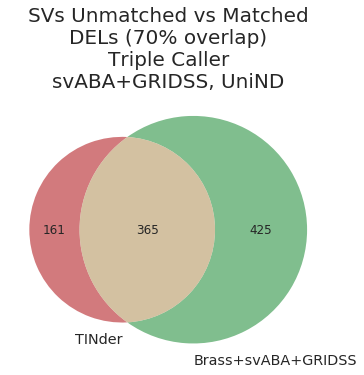

In [65]:
venn2(subsets = (161,425,365), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS, UniND',fontsize=20)
plt.show()

In [ ]:
venn2(subsets = (239,406,383), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS, UniND, SUPP',fontsize=20)
plt.show()

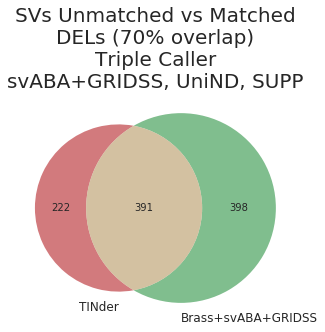

In [423]:
venn2(subsets = (222,398,391), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS, UniND, SUPP',fontsize=20)
plt.show()

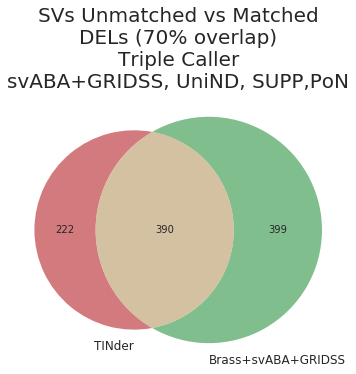

In [61]:
venn2(subsets = (222,399,390), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS, UniND, SUPP,PoN',fontsize=20)
plt.show()

- Green Area:

In [62]:
triple_full_info_dup_DEL_DETECT_check=triple_full_info_dup_DEL_DETECT[~((triple_full_info_dup_DEL_DETECT['SV chrom']=='X') | (triple_full_info_dup_DEL_DETECT['SV chrom']=='Y'))]

triple_full_info_dup_DEL_DETECT_check['SV start']=triple_full_info_dup_DEL_DETECT_check['SV start'].map(int)
triple_full_info_dup_DEL_DETECT_check['SV chrom']=triple_full_info_dup_DEL_DETECT_check['SV chrom'].map(int)
triple_full_info_dup_DEL_DETECT_check[triple_full_info_dup_DEL_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index().head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,0,1,16945804,16947870,1_16945804_1_16947870_DEL_+-,DEL,IID_H158650_T01_01_WG01,8,0,10,1_16945804_16947870_IID_H158650_T01_01_WG01,Non Detected
1,0,1,33476428,33478808,1_33476428_1_33478808_DEL_+-,DEL,IID_H158651_T01_01_WG01,5,0,11,1_33476428_33478808_IID_H158651_T01_01_WG01,Non Detected
2,0,1,114473252,114478844,1_114473252_1_114478844_DEL_+-,DEL,IID_H158629_T01_01_WG01,24,37,20,1_114473252_114478844_IID_H158629_T01_01_WG01,Non Detected
3,2,1,185286970,185343041,1_185286970_1_185343041_DEL_+-,DEL,IID_H158624_T01_01_WG01,59,76,29,1_185286970_185343041_IID_H158624_T01_01_WG01,Non Detected
4,3,1,194451117,194454312,1_194451117_1_194454312_DEL_+-,DEL,IID_H158666_T01_01_WG01,0,27,26,1_194451117_194454312_IID_H158666_T01_01_WG01,Non Detected


In [63]:
triple_full_info_dup_DEL_DETECT_check[triple_full_info_dup_DEL_DETECT_check['brass_PS']==0].shape

(97, 11)

- Red Area:

In [64]:
tinder_full_set_DEL_DETECT_check=tinder_full_set_DEL_DETECT[~((tinder_full_set_DEL_DETECT['SV chrom']=='X') | (tinder_full_set_DEL_DETECT['SV chrom']=='Y'))]

tinder_full_set_DEL_DETECT_check['SV start']=tinder_full_set_DEL_DETECT_check['SV start'].map(int)
tinder_full_set_DEL_DETECT_check['SV chrom']=tinder_full_set_DEL_DETECT_check['SV chrom'].map(int)

tinder_full_set_DEL_DETECT_check[tinder_full_set_DEL_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index().head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,351,1,6832812,6834315,1503,DEL,IID_H158612_T01_01_WG01,0.0004189999890513718,0.000921,34,41,15,1_6832812_1_6834315_IID_H158612_T01_01_WG01,Non Detected
1,1216,1,23350986,23354222,3236,DEL,IID_H158625_T01_01_WG01,-1,-1.000000,38,75,44,1_23350986_1_23354222_IID_H158625_T01_01_WG01,Non Detected
2,1218,1,32671723,32674044,2321,DEL,IID_H158625_T01_01_WG01,0.0003260000084992498,0.000422,48,74,39,1_32671723_1_32674044_IID_H158625_T01_01_WG01,Non Detected
3,1448,1,41546673,41549420,2747,DEL,IID_H158630_T01_01_WG01,4.70000013592653e-05,0.000132,22,65,44,1_41546673_1_41549420_IID_H158630_T01_01_WG01,Non Detected
4,165,1,43970462,43973388,2926,DEL,IID_H158608_T01_01_WG01,4.70000013592653e-05,0.000132,62,85,47,1_43970462_1_43973388_IID_H158608_T01_01_WG01,Non Detected


In [65]:
tinder_full_set_DEL_DETECT_check[tinder_full_set_DEL_DETECT_check['svaba_AD']<5].shape

(30, 13)

In [66]:
tinder_full_set_DEL_DETECT_check[tinder_full_set_DEL_DETECT_check['brass_PS']<10].shape

(65, 13)

#### - Brass score >10:

In [67]:
print(tinder_full_set_DEL_DETECT.shape)
tinder_full_set_DEL_DETECT.head(1)

(598, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected


In [68]:
tinder_full_set_DEL_DETECT_score=tinder_full_set_DEL_DETECT[tinder_full_set_DEL_DETECT['brass_PS']>=10]
print(tinder_full_set_DEL_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DEL_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(530, 13)
323 207


In [69]:
print(triple_full_info_dup_DEL_DETECT.shape)
triple_full_info_dup_DEL_DETECT.head(1)

(789, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected


In [70]:
triple_full_info_dup_DEL_DETECT['brass_PS']=triple_full_info_dup_DEL_DETECT['brass_PS'].map(int)
triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DEL_DETECT_score=triple_full_info_dup_DEL_DETECT[(triple_full_info_dup_DEL_DETECT['brass_PS']>=10) | (triple_full_info_dup_DEL_DETECT['gridss_VF']>=10) | (triple_full_info_dup_DEL_DETECT['svaba_AD']>=10)]

print(triple_full_info_dup_DEL_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DEL_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(759, 11)
374 385


In [71]:
triple_full_info_dup_DEL_DETECT['brass_PS']=triple_full_info_dup_DEL_DETECT['brass_PS'].map(int)
#triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
#triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DEL_DETECT_scorebrass=triple_full_info_dup_DEL_DETECT[(triple_full_info_dup_DEL_DETECT['brass_PS']>=10)]

print(triple_full_info_dup_DEL_DETECT_scorebrass.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DEL_DETECT_scorebrass.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(630, 11)
322 308


#### - Sizes:

In [72]:
tinder_full_set_DEL_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected


In [73]:
tinder_full_set_DEL_DETECT_size=tinder_full_set_DEL_DETECT.copy()
tinder_full_set_DEL_DETECT_size['SV length']=tinder_full_set_DEL_DETECT_size['SV length'].map(int)

triple_full_info_dup_DEL_DETECT_size=triple_full_info_dup_DEL_DETECT.copy()
triple_full_info_dup_DEL_DETECT_size['SV length']=triple_full_info_dup_DEL_DETECT_size['SV end']-triple_full_info_dup_DEL_DETECT_size['SV start']

In [74]:
onlyTINder_DELs=tinder_full_set_DEL_DETECT_size[tinder_full_set_DEL_DETECT_size['Detection']=='Non Detected']
common_DELs=tinder_full_set_DEL_DETECT_size[tinder_full_set_DEL_DETECT_size['Detection']=='Detected']
onlyTRIPLE_DELs=triple_full_info_dup_DEL_DETECT_size[triple_full_info_dup_DEL_DETECT_size['Detection']=='Non Detected']

In [75]:
#TINder
average_size=sum(onlyTINder_DELs['SV length'])/len(onlyTINder_DELs['SV length'])
print('onlyTINDER_DELs Size average\t',average_size)

#BTG
average_size=sum(onlyTRIPLE_DELs['SV length'])/len(onlyTRIPLE_DELs['SV length'])
print('onlyTRIPLE_DELs Size average\t',average_size)

#Common
average_size=sum(common_DELs['SV length'])/len(common_DELs['SV length'])
print('common_DELs Size average\t',average_size)

onlyTINDER_DELs Size average	 1884281.292792793
onlyTRIPLE_DELs Size average	 101564.70927318296
common_DELs Size average	 4789982.882978723


In [76]:
sizes_TINder_df=pd.DataFrame(onlyTINder_DELs,columns=['SV length'])
sizes_TINder_df['Group']='TINder'

sizes_TRIPLE_df=pd.DataFrame(onlyTRIPLE_DELs,columns=['SV length'])
sizes_TRIPLE_df['Group']='TRIPLE'

sizes_COMMON_df=pd.DataFrame(common_DELs,columns=['SV length'])
sizes_COMMON_df['Group']='COMMON'

In [77]:
sizes_TOTAL_df=sizes_TINder_df.copy()
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_TRIPLE_df,ignore_index=True)
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_COMMON_df,ignore_index=True)
#sizes_TOTAL_df

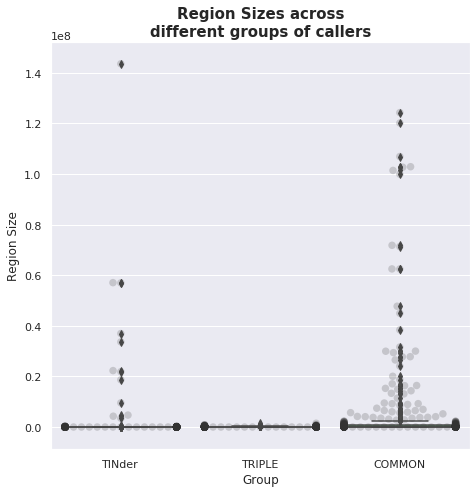

In [78]:
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='SV length', data=sizes_TOTAL_df,order=['TINder','TRIPLE','COMMON'])
ax = sns.swarmplot(x='Group',y='SV length',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['TINder','TRIPLE','COMMON'])
ax.set_title('Region Sizes across\ndifferent groups of callers',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

### - Black regions:

### A- TRIPLE:

In [70]:
triple_full_info_dup_DEL_DETECT.head(1)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected


In [71]:
triple_full_info_dup_DEL_DETECT_2intersectBLACK=triple_full_info_dup_DEL_DETECT[['SV chrom','SV start','SV end','SV type','Sample','keys','Detection','brass_PS','brass_RC','gridss_VF','svaba_AD']]
triple_full_info_dup_DEL_DETECT_2intersectBLACK['brass_PS']=triple_full_info_dup_DEL_DETECT_2intersectBLACK['brass_PS'].map(str)
triple_full_info_dup_DEL_DETECT_2intersectBLACK['brass_RC']=triple_full_info_dup_DEL_DETECT_2intersectBLACK['brass_RC'].map(str)
triple_full_info_dup_DEL_DETECT_2intersectBLACK['gridss_VF']=triple_full_info_dup_DEL_DETECT_2intersectBLACK['gridss_VF'].map(str)
triple_full_info_dup_DEL_DETECT_2intersectBLACK['svaba_AD']=triple_full_info_dup_DEL_DETECT_2intersectBLACK['svaba_AD'].map(str)

triple_full_info_dup_DEL_DETECT_2intersectBLACK.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/sit

,SV chrom,SV start,SV end,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,DEL,IID_H158612_T01_01_WG01,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected,8,4,0,8
3,13,44716505,45010463,DEL,IID_H158612_T01_01_WG01,13_44716505_45010463_IID_H158612_T01_01_WG01,Detected,4,7,14,9
12,14,22866085,22918105,DEL,IID_H158612_T01_01_WG01,14_22866085_22918105_IID_H158612_T01_01_WG01,Non Detected,22,7,31,13
14,14,22892030,22976665,DEL,IID_H158612_T01_01_WG01,14_22892030_22976665_IID_H158612_T01_01_WG01,Non Detected,4,7,0,8
16,14,22908005,22918118,DEL,IID_H158612_T01_01_WG01,14_22908005_22918118_IID_H158612_T01_01_WG01,Non Detected,24,8,28,28


In [72]:
black_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist/blacklist_regions.bed',sep='\t',header=None,names=['chromosome','start','end'])
#blue_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist_uk_dan/blacklist_regions_uk_dan.bed',sep='\t',header=None,names=['chromosome','start','end'])

#black_bed=black_bed.append(blue_bed)

key_list=[]
for index,row in black_bed.iterrows():
    key_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end']))

black_bed['to_index']=key_list 
black_bed_2intersect=black_bed.copy()
black_bed_2intersect.index=black_bed_2intersect['to_index']
black_bed_2intersect.head()

,chromosome,start,end,to_index
to_index,,,,
1_1_840000,1,1,840000,1_1_840000
1_1560001_1605000,1,1560001,1605000,1_1560001_1605000
1_1620001_1680000,1,1620001,1680000,1_1620001_1680000
1_2580001_2700000,1,2580001,2700000,1_2580001_2700000
1_3855001_3990000,1,3855001,3990000,1_3855001_3990000


In [73]:
#1- Black list

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DEL_DETECT_2intersectBLACK.values.tolist())
list_bed_cytobands=BedTool(black_bed_2intersect.values.tolist())

I_focal_blacklist = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','SV type','Sample','keys','Detection','brass_PS','brass_RC','gridss_VF','svaba_AD','chr_band','start_band', 'end_band','keys2' ])
#I = I[I.chr_band!="X"]
print(triple_full_info_dup_DEL_DETECT_2intersectBLACK.shape)
print(I_focal_blacklist.shape)
I_focal_blacklist.head()

(789, 11)
(721, 15)


,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2
0,14,106315458,106383257,DEL,IID_H158612_T01_01_WG01,14_106315458_106383257_IID_H158612_T01_01_WG01,Non Detected,13,7,0,12,14,106245001,106920000,14_106245001_106920000
1,14,106329450,106805207,DEL,IID_H158612_T01_01_WG01,14_106329450_106805207_IID_H158612_T01_01_WG01,Non Detected,9,6,18,0,14,106245001,106920000,14_106245001_106920000
2,14,106330447,106586142,DEL,IID_H158612_T01_01_WG01,14_106330447_106586142_IID_H158612_T01_01_WG01,Non Detected,13,7,0,12,14,106245001,106920000,14_106245001_106920000
3,14,106881446,107048677,DEL,IID_H158612_T01_01_WG01,14_106881446_107048677_IID_H158612_T01_01_WG01,Detected,11,4,20,17,14,106980001,107025000,14_106980001_107025000
4,14,106881446,107048677,DEL,IID_H158612_T01_01_WG01,14_106881446_107048677_IID_H158612_T01_01_WG01,Detected,11,4,20,17,14,106245001,106920000,14_106245001_106920000


In [74]:
I_focal_blacklist['start_seg']=I_focal_blacklist['start_seg'].map(int)
I_focal_blacklist['end_seg']=I_focal_blacklist['end_seg'].map(int)
I_focal_blacklist['start_band']=I_focal_blacklist['start_band'].map(int)
I_focal_blacklist['end_band']=I_focal_blacklist['end_band'].map(int)

In [75]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_focal_blacklist_70=[]
percentage=[]

for index,row in I_focal_blacklist.iterrows():
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_seg']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_seg']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        percentage.append(1)
        continue
                
I_focal_blacklist_70=pd.DataFrame(I_focal_blacklist_70)
I_focal_blacklist_70['Percentage']=percentage
print(I_focal_blacklist_70.shape)
I_focal_blacklist_70.sort_values(by=['chr_seg','start_seg']).reset_index().head()

(721, 16)


,index,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2,Percentage
0,123,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,5715001,5745000,1_5715001_5745000,0.000300
1,124,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,22290001,22350000,1_22290001_22350000,0.000600
2,125,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,24255001,24375000,1_24255001_24375000,0.001201
3,126,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,25590001,25665000,1_25590001_25665000,0.000751
4,127,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,47385001,47415000,1_47385001_47415000,0.000300


In [76]:
I_focal_blacklist_70_detected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Detected']
I_focal_blacklist_70_nondetected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Non Detected']

- Detected:

In [77]:
print(len(I_focal_blacklist_70_detected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_detected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

101
14_106881446_107048677_IID_H158612_T01_01_WG01 	 0.7308931956395643
2_114164439_114195649_IID_H158612_T01_01_WG01 	 1.0
7_27985458_55777536_IID_H158612_T01_01_WG01 	 0.04398793066139206
7_38295966_38398111_IID_H158612_T01_01_WG01 	 0.1373929218268148
14_106330465_107183409_IID_H158619_T01_01_WG01 	 0.8670346470577202
14_106667581_106967069_IID_H158635_T01_01_WG01 	 0.9430027246500695
6_32408859_32555755_IID_H158635_T01_01_WG01 	 0.7539619867116871
2_32189850_33467214_IID_H158632_T01_01_WG01 	 0.023485083343510543
2_34817859_51168118_IID_H158632_T01_01_WG01 	 0.008256505294503285
2_114164404_114194652_IID_H158625_T01_01_WG01 	 1.0
4_100832115_103940860_IID_H158625_T01_01_WG01 	 0.028950267712533513
9_21191478_22422195_IID_H158625_T01_01_WG01 	 0.01504976367434593
15_93499967_97583520_IID_H158618_T01_01_WG01 	 0.011019570457393353
17_52347649_58834798_IID_H158631_T01_01_WG01 	 0.027746549370147037
2_87566154_87770010_IID_H158631_T01_01_WG01 	 1.0
2_114164449_114188428_IID_H158628_T01

In [78]:
scatter_plot.head()

,Sample,Percentage
0,14_106881446_107048677_IID_H158612_T01_01_WG01,0.730893
1,2_114164439_114195649_IID_H158612_T01_01_WG01,1.000000
2,7_27985458_55777536_IID_H158612_T01_01_WG01,0.043988
3,7_38295966_38398111_IID_H158612_T01_01_WG01,0.137393
4,14_106330465_107183409_IID_H158619_T01_01_WG01,0.867035


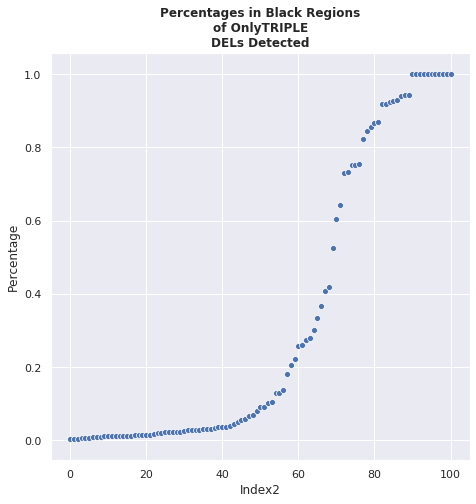

In [88]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTRIPLE\nDELs Detected',weight='bold')
plt.show()

In [79]:
YELLOW_TRIPLE_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(YELLOW_TRIPLE_BLACK))
YELLOW_TRIPLE_BLACK

29


['14_106881446_107048677_IID_H158612_T01_01_WG01',
 '2_114164439_114195649_IID_H158612_T01_01_WG01',
 '14_106330465_107183409_IID_H158619_T01_01_WG01',
 '14_106667581_106967069_IID_H158635_T01_01_WG01',
 '6_32408859_32555755_IID_H158635_T01_01_WG01',
 '2_114164404_114194652_IID_H158625_T01_01_WG01',
 '2_87566154_87770010_IID_H158631_T01_01_WG01',
 '2_114164449_114188428_IID_H158628_T01_01_WG01',
 '22_23029742_23260337_IID_H158617_T01_01_WG01',
 '14_106330472_107113739_IID_H158606_T01_01_WG01',
 '14_106330517_107083255_IID_H158606_T01_01_WG01',
 '14_106357063_106518398_IID_H158606_T01_01_WG01',
 '14_106551444_107034728_IID_H158606_T01_01_WG01',
 '14_106146402_106363822_IID_H158622_T01_01_WG01',
 '2_114164447_114188427_IID_H158622_T01_01_WG01',
 '14_106898522_106967052_IID_H158611_T01_01_WG01',
 '14_106935615_107034733_IID_H158611_T01_01_WG01',
 '22_23029774_23241805_IID_H158607_T01_01_WG01',
 '14_106285723_106367000_IID_H158634_T01_01_WG01',
 '14_106471231_107083260_IID_H158666_T01_01_W

In [80]:
joe_file_noBLACK=pd.DataFrame()

for index,row in joe_file.iterrows():
    if row['keys'] not in onlyBTG_BLACK:
        joe_file_noBLACK=joe_file_noBLACK.append(row)

print(joe_file_noBLACK.shape)
joe_file_noBLACK.head()

NameError: name 'joe_file' is not defined

- Non Detected:

In [81]:
print(len(I_focal_blacklist_70_nondetected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_nondetected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

205
14_106315458_106383257_IID_H158612_T01_01_WG01 	 1.0
14_106329450_106805207_IID_H158612_T01_01_WG01 	 1.0
14_106330447_106586142_IID_H158612_T01_01_WG01 	 1.0
14_107095155_107169928_IID_H158612_T01_01_WG01 	 0.26540328728284274
2_89277893_89291929_IID_H158612_T01_01_WG01 	 1.0
22_22764648_23241800_IID_H158619_T01_01_WG01 	 0.471543659043659
22_23063642_23247179_IID_H158619_T01_01_WG01 	 0.9336428077172451
14_106329462_106452676_IID_H158635_T01_01_WG01 	 1.0
14_106539078_106552287_IID_H158635_T01_01_WG01 	 1.0
14_106790234_107048670_IID_H158635_T01_01_WG01 	 0.8258640437090807
14_107048699_107083255_IID_H158635_T01_01_WG01 	 1.0
2_89132282_89159123_IID_H158635_T01_01_WG01 	 1.0
2_89160435_89533668_IID_H158635_T01_01_WG01 	 1.0
2_90044437_90061006_IID_H158635_T01_01_WG01 	 1.0
7_38309135_38356624_IID_H158635_T01_01_WG01 	 0.01821474446713976
14_106330074_106725203_IID_H158632_T01_01_WG01 	 1.0
14_106541818_106552283_IID_H158632_T01_01_WG01 	 1.0
14_106993780_107048620_IID_H158632_T01

In [84]:
scatter_plot.head()

,Sample,Percentage
0,14_106315458_106383257_IID_H158612_T01_01_WG01,1.000000
1,14_106329450_106805207_IID_H158612_T01_01_WG01,1.000000
2,14_106330447_106586142_IID_H158612_T01_01_WG01,1.000000
3,14_107095155_107169928_IID_H158612_T01_01_WG01,0.265403
4,2_89277893_89291929_IID_H158612_T01_01_WG01,1.000000


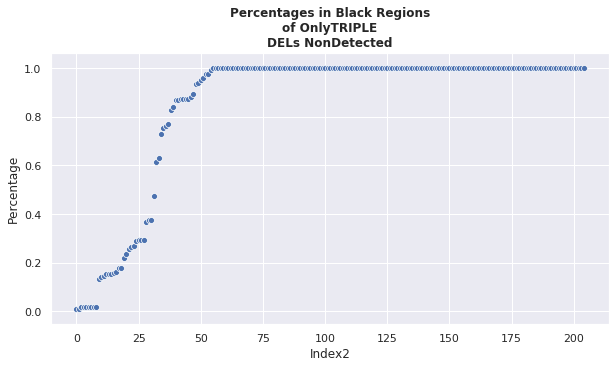

In [85]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTRIPLE\nDELs NonDetected',weight='bold')
plt.show()

In [86]:
GREEN_TRIPLE_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(GREEN_TRIPLE_BLACK))
GREEN_TRIPLE_BLACK

171


['14_106315458_106383257_IID_H158612_T01_01_WG01',
 '14_106329450_106805207_IID_H158612_T01_01_WG01',
 '14_106330447_106586142_IID_H158612_T01_01_WG01',
 '2_89277893_89291929_IID_H158612_T01_01_WG01',
 '22_23063642_23247179_IID_H158619_T01_01_WG01',
 '14_106329462_106452676_IID_H158635_T01_01_WG01',
 '14_106539078_106552287_IID_H158635_T01_01_WG01',
 '14_106790234_107048670_IID_H158635_T01_01_WG01',
 '14_107048699_107083255_IID_H158635_T01_01_WG01',
 '2_89132282_89159123_IID_H158635_T01_01_WG01',
 '2_89160435_89533668_IID_H158635_T01_01_WG01',
 '2_90044437_90061006_IID_H158635_T01_01_WG01',
 '14_106330074_106725203_IID_H158632_T01_01_WG01',
 '14_106541818_106552283_IID_H158632_T01_01_WG01',
 '14_106993780_107048620_IID_H158632_T01_01_WG01',
 '14_107048672_107083256_IID_H158632_T01_01_WG01',
 '2_89132324_89521182_IID_H158632_T01_01_WG01',
 '2_90008158_90109097_IID_H158632_T01_01_WG01',
 '14_106329453_106331762_IID_H158609_T01_01_WG01',
 '14_106330468_106382688_IID_H158609_T01_01_WG01',


In [87]:
TRIPLE_noBLACK_DELs=pd.DataFrame()
triple_keys=YELLOW_TRIPLE_BLACK+GREEN_TRIPLE_BLACK

for index,row in triple_full_info_dup_DEL_DETECT.iterrows():
    if (row['keys'] not in triple_keys):
        TRIPLE_noBLACK_DELs=TRIPLE_noBLACK_DELs.append(row)

print(TRIPLE_noBLACK_DELs.shape)
TRIPLE_noBLACK_DELs.head()

(589, 12)


,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0,12_110895557_110907163_IID_H158612_T01_01_WG01,8
3,Detected,13_44716505_13_45010463_DEL_+-,13,45010463.0,44716505.0,DEL,IID_H158612_T01_01_WG01,4,7,14,13_44716505_45010463_IID_H158612_T01_01_WG01,9
12,Non Detected,14_22866085_14_22918105_DEL_+-,14,22918105.0,22866085.0,DEL,IID_H158612_T01_01_WG01,22,7,31,14_22866085_22918105_IID_H158612_T01_01_WG01,13
14,Non Detected,14_22892030_14_22976665_DEL_+-,14,22976665.0,22892030.0,DEL,IID_H158612_T01_01_WG01,4,7,0,14_22892030_22976665_IID_H158612_T01_01_WG01,8
16,Non Detected,14_22908005_14_22918118_DEL_+-,14,22918118.0,22908005.0,DEL,IID_H158612_T01_01_WG01,24,8,28,14_22908005_22918118_IID_H158612_T01_01_WG01,28


In [88]:
TRIPLE_noBLACK_DELs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_DEL_DETECT_noBLACK.tsv',sep='\t')

### B- TINDER:

In [89]:
tinder_full_set_DEL_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,24,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected


In [90]:
tinder_full_set_DEL_DETECT_2intersectBLACK=tinder_full_set_DEL_DETECT[['SV chrom','SV start','SV start2','SV type','Sample','keys','Detection','brass_PS','brass_RC','gridss_VF','svaba_AD']]
tinder_full_set_DEL_DETECT_2intersectBLACK['brass_PS']=tinder_full_set_DEL_DETECT_2intersectBLACK['brass_PS'].map(str)
tinder_full_set_DEL_DETECT_2intersectBLACK['brass_RC']=tinder_full_set_DEL_DETECT_2intersectBLACK['brass_RC'].map(str)
tinder_full_set_DEL_DETECT_2intersectBLACK['gridss_VF']=tinder_full_set_DEL_DETECT_2intersectBLACK['gridss_VF'].map(str)
tinder_full_set_DEL_DETECT_2intersectBLACK['svaba_AD']=tinder_full_set_DEL_DETECT_2intersectBLACK['svaba_AD'].map(str)

tinder_full_set_DEL_DETECT_2intersectBLACK.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/sit

,SV chrom,SV start,SV start2,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD
7,14,22866689,23004506,DEL,IID_H158604_T01_01_WG01,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected,47,24,66,38
8,14,49067540,49429620,DEL,IID_H158604_T01_01_WG01,14_49067540_14_49429620_IID_H158604_T01_01_WG01,Non Detected,61,11,78,33
10,14,102562994,106373075,DEL,IID_H158604_T01_01_WG01,14_102562994_14_106373075_IID_H158604_T01_01_WG01,Detected,36,20,62,32
43,14,22892030,23002450,DEL,IID_H158605_T01_01_WG01,14_22892030_14_23002450_IID_H158605_T01_01_WG01,Detected,25,18,33,25
48,17,984908,986317,DEL,IID_H158605_T01_01_WG01,17_984908_17_986317_IID_H158605_T01_01_WG01,Non Detected,36,12,51,37


In [91]:
black_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist/blacklist_regions.bed',sep='\t',header=None,names=['chromosome','start','end'])
#blue_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist_uk_dan/blacklist_regions_uk_dan.bed',sep='\t',header=None,names=['chromosome','start','end'])

#black_bed=black_bed.append(blue_bed)

key_list=[]
for index,row in black_bed.iterrows():
    key_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end']))

black_bed['to_index']=key_list 
black_bed_2intersect=black_bed.copy()
black_bed_2intersect.index=black_bed_2intersect['to_index']
black_bed_2intersect.head()

,chromosome,start,end,to_index
to_index,,,,
1_1_840000,1,1,840000,1_1_840000
1_1560001_1605000,1,1560001,1605000,1_1560001_1605000
1_1620001_1680000,1,1620001,1680000,1_1620001_1680000
1_2580001_2700000,1,2580001,2700000,1_2580001_2700000
1_3855001_3990000,1,3855001,3990000,1_3855001_3990000


In [92]:
#1- Black list

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DEL_DETECT_2intersectBLACK.values.tolist())
list_bed_cytobands=BedTool(black_bed_2intersect.values.tolist())

I_focal_blacklist = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','SV type','Sample','keys','Detection','brass_PS','brass_RC','gridss_VF','svaba_AD','chr_band','start_band', 'end_band','keys2' ])
#I = I[I.chr_band!="X"]
print(tinder_full_set_DEL_DETECT_2intersectBLACK.shape)
print(I_focal_blacklist.shape)
I_focal_blacklist.head()

(598, 11)
(629, 15)


,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2
0,14,102562994,106373075,DEL,IID_H158604_T01_01_WG01,14_102562994_14_106373075_IID_H158604_T01_01_WG01,Detected,36,20,62,32,14,106050001,106125000,14_106050001_106125000
1,14,102562994,106373075,DEL,IID_H158604_T01_01_WG01,14_102562994_14_106373075_IID_H158604_T01_01_WG01,Detected,36,20,62,32,14,106170001,106230000,14_106170001_106230000
2,14,102562994,106373075,DEL,IID_H158604_T01_01_WG01,14_102562994_14_106373075_IID_H158604_T01_01_WG01,Detected,36,20,62,32,14,106245001,106920000,14_106245001_106920000
3,9,15424528,22380856,DEL,IID_H158605_T01_01_WG01,9_15424528_9_22380856_IID_H158605_T01_01_WG01,Detected,39,15,59,33,9,21180001,21210000,9_21180001_21210000
4,14,106330472,107113739,DEL,IID_H158606_T01_01_WG01,14_106330472_14_107113739_IID_H158606_T01_01_WG01,Detected,13,0,15,14,14,106980001,107025000,14_106980001_107025000


In [93]:
I_focal_blacklist['start_seg']=I_focal_blacklist['start_seg'].map(int)
I_focal_blacklist['end_seg']=I_focal_blacklist['end_seg'].map(int)
I_focal_blacklist['start_band']=I_focal_blacklist['start_band'].map(int)
I_focal_blacklist['end_band']=I_focal_blacklist['end_band'].map(int)

In [94]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_focal_blacklist_70=[]
percentage=[]

for index,row in I_focal_blacklist.iterrows():
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_seg']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_seg']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        percentage.append(1)
        continue
                
I_focal_blacklist_70=pd.DataFrame(I_focal_blacklist_70)
I_focal_blacklist_70['Percentage']=percentage
print(I_focal_blacklist_70.shape)
I_focal_blacklist_70.sort_values(by=['chr_seg','start_seg']).reset_index().head()

(629, 16)


,index,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2,Percentage
0,49,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,5715001,5745000,1_5715001_5745000,0.000300
1,50,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,22290001,22350000,1_22290001_22350000,0.000600
2,51,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,24255001,24375000,1_24255001_24375000,0.001201
3,52,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,25590001,25665000,1_25590001_25665000,0.000751
4,53,1,3708400,103627577,DEL,IID_H158613_T01_01_WG01,1_3708400_1_103627577_IID_H158613_T01_01_WG01,Detected,8,0,13,11,1,47385001,47415000,1_47385001_47415000,0.000300


In [95]:
I_focal_blacklist_70_detected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Detected']
I_focal_blacklist_70_nondetected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Non Detected']

- Detected:

In [96]:
print(len(I_focal_blacklist_70_detected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_detected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

99
14_102562994_14_106373075_IID_H158604_T01_01_WG01 	 0.06904630111538311
9_15424528_9_22380856_IID_H158605_T01_01_WG01 	 0.004312476352466416
14_106330472_14_107113739_IID_H158606_T01_01_WG01 	 0.9425444963211779
14_106551444_14_107034728_IID_H158606_T01_01_WG01 	 0.9177916090745815
22_23029809_22_23241805_IID_H158607_T01_01_WG01 	 0.9198239589426216
14_106898522_14_106967052_IID_H158611_T01_01_WG01 	 0.751160075879177
14_106935615_14_107034733_IID_H158611_T01_01_WG01 	 0.7504590488105087
5_121632431_5_160041023_IID_H158611_T01_01_WG01 	 0.007029468823017516
14_106881446_14_107048677_IID_H158612_T01_01_WG01 	 0.7308931956395643
2_114164439_2_114195649_IID_H158612_T01_01_WG01 	 1.0
7_27985458_7_55777536_IID_H158612_T01_01_WG01 	 0.04398793066139206
1_3708400_1_103627577_IID_H158613_T01_01_WG01 	 0.028522833009323123
1_3723187_1_106598971_IID_H158613_T01_01_WG01 	 0.031931450456795546
1_5354510_1_77169659_IID_H158613_T01_01_WG01 	 0.0319567950767602
1_77599586_1_104102892_IID_H158613_T

In [97]:
scatter_plot.head()

,Sample,Percentage
0,14_102562994_14_106373075_IID_H158604_T01_01_WG01,0.069046
1,9_15424528_9_22380856_IID_H158605_T01_01_WG01,0.004312
2,14_106330472_14_107113739_IID_H158606_T01_01_WG01,0.942544
3,14_106551444_14_107034728_IID_H158606_T01_01_WG01,0.917792
4,22_23029809_22_23241805_IID_H158607_T01_01_WG01,0.919824


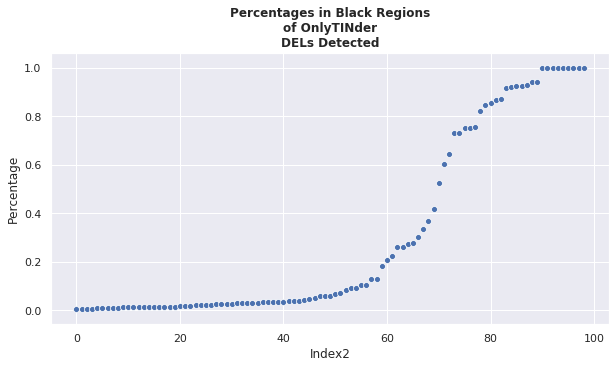

In [98]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTINder\nDELs Detected',weight='bold')
plt.show()

In [99]:
YELLOW_TINDER_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(YELLOW_TINDER_BLACK))
YELLOW_TINDER_BLACK

26


['14_106330472_14_107113739_IID_H158606_T01_01_WG01',
 '14_106551444_14_107034728_IID_H158606_T01_01_WG01',
 '22_23029809_22_23241805_IID_H158607_T01_01_WG01',
 '14_106898522_14_106967052_IID_H158611_T01_01_WG01',
 '14_106935615_14_107034733_IID_H158611_T01_01_WG01',
 '14_106881446_14_107048677_IID_H158612_T01_01_WG01',
 '2_114164439_2_114195649_IID_H158612_T01_01_WG01',
 '22_23029742_22_23260337_IID_H158617_T01_01_WG01',
 '14_106330465_14_107183409_IID_H158619_T01_01_WG01',
 '14_106438674_14_107083256_IID_H158620_T01_01_WG01',
 '14_106146402_14_106363822_IID_H158622_T01_01_WG01',
 '2_114164447_2_114188427_IID_H158622_T01_01_WG01',
 '2_114164366_2_114194652_IID_H158625_T01_01_WG01',
 '2_114164449_2_114188428_IID_H158628_T01_01_WG01',
 '2_87566154_2_87770010_IID_H158631_T01_01_WG01',
 '2_114164446_2_114189320_IID_H158633_T01_01_WG01',
 '14_106285723_14_106367000_IID_H158634_T01_01_WG01',
 '14_106667581_14_106967069_IID_H158635_T01_01_WG01',
 '6_32408859_6_32555755_IID_H158635_T01_01_WG0

- Non Detected:

In [100]:
print(len(I_focal_blacklist_70_nondetected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_nondetected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

19
11_49219711_11_49221067_IID_H158616_T01_01_WG01 	 1.0
9_19742146_9_23212077_IID_H158616_T01_01_WG01 	 0.008645416868519863
5_88111492_5_92828026_IID_H158617_T01_01_WG01 	 0.006360390914175536
5_126661475_5_148515164_IID_H158618_T01_01_WG01 	 0.00823636686693949
6_13191446_6_156731674_IID_H158618_T01_01_WG01 	 0.043053951398210125
5_57315694_5_57319121_IID_H158624_T01_01_WG01 	 1.0
5_57317135_5_57319143_IID_H158624_T01_01_WG01 	 1.0
16_32031477_16_32033019_IID_H158627_T01_01_WG01 	 1.0
17_34596076_17_34812172_IID_H158627_T01_01_WG01 	 1.0
16_53545261_16_75842350_IID_H158630_T01_01_WG01 	 0.03901827722892437
6_52860655_6_109913312_IID_H158633_T01_01_WG01 	 0.09202000881396286
22_22517071_22_22653067_IID_H158634_T01_01_WG01 	 0.3534368657901703
8_83255531_8_101930911_IID_H158636_T01_01_WG01 	 0.016867019573363434
10_27601261_10_37135413_IID_H158639_T01_01_WG01 	 0.015600338656232877
2_132134342_2_132146156_IID_H158641_T01_01_WG01 	 1.0
9_86623_9_258650_IID_H158641_T01_01_WG01 	 0.62999

In [108]:
scatter_plot.head()

,Sample,Percentage
0,11_49219711_11_49221067_IID_H158616_T01_01_WG01,1.000000
1,9_19742146_9_23212077_IID_H158616_T01_01_WG01,0.008645
2,5_88111492_5_92828026_IID_H158617_T01_01_WG01,0.006360
3,5_126661475_5_148515164_IID_H158618_T01_01_WG01,0.008236
4,6_13191446_6_156731674_IID_H158618_T01_01_WG01,0.043054


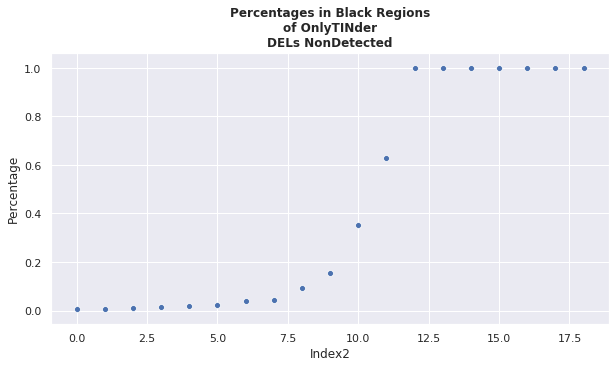

In [101]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTINder\nDELs NonDetected',weight='bold')
plt.show()

In [102]:
RED_TINDER_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(RED_TINDER_BLACK))
RED_TINDER_BLACK

7


['11_49219711_11_49221067_IID_H158616_T01_01_WG01',
 '5_57315694_5_57319121_IID_H158624_T01_01_WG01',
 '5_57317135_5_57319143_IID_H158624_T01_01_WG01',
 '16_32031477_16_32033019_IID_H158627_T01_01_WG01',
 '17_34596076_17_34812172_IID_H158627_T01_01_WG01',
 '2_132134342_2_132146156_IID_H158641_T01_01_WG01',
 '16_33665647_16_33667892_IID_H158644_T01_01_WG01']

In [103]:
TINDER_noBLACK_DELs=pd.DataFrame()
tinder_keys=YELLOW_TINDER_BLACK+RED_TINDER_BLACK

for index,row in tinder_full_set_DEL_DETECT.iterrows():
    if row['keys'] not in tinder_keys:
        TINDER_noBLACK_DELs=TINDER_noBLACK_DELs.append(row)

print(TINDER_noBLACK_DELs.shape)
TINDER_noBLACK_DELs.head()

(565, 14)


,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
7,Detected,0.005078999791294336,0.005808,14,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_14_23004506_IID_H158604_T01_01_WG01,38.0
8,Non Detected,-1,-1.000000,14,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,11.0,78.0,14_49067540_14_49429620_IID_H158604_T01_01_WG01,33.0
10,Detected,-1,-1.000000,14,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,20.0,62.0,14_102562994_14_106373075_IID_H158604_T01_01_WG01,32.0
43,Detected,0.005078999791294336,0.005808,14,110420.0,22892030.0,23002450.0,DEL,IID_H158605_T01_01_WG01,25.0,18.0,33.0,14_22892030_14_23002450_IID_H158605_T01_01_WG01,25.0
48,Non Detected,4.70000013592653e-05,0.000132,17,1409.0,984908.0,986317.0,DEL,IID_H158605_T01_01_WG01,36.0,12.0,51.0,17_984908_17_986317_IID_H158605_T01_01_WG01,37.0


In [104]:
TINDER_noBLACK_DELs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_DEL_DETECT_noBLACK.tsv',sep='\t')

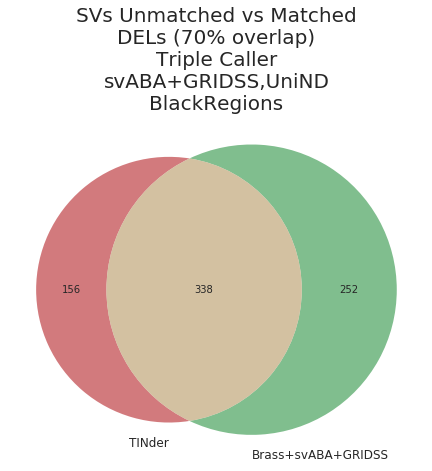

In [127]:
venn2(subsets = (156,252,338), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND\nBlackRegions',fontsize=20)
plt.show()

In [ ]:
venn2(subsets = (230,233,356), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND, SUPP\nBlackRegions',fontsize=20)
plt.show()

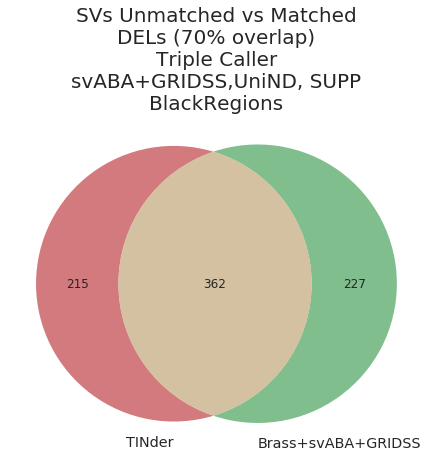

In [475]:
venn2(subsets = (215,227,362), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND, SUPP\nBlackRegions',fontsize=20)
plt.show()

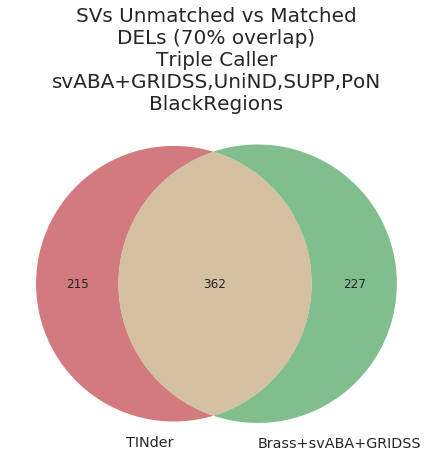

In [113]:
venn2(subsets = (215,227,362), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDELs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND,SUPP,PoN\nBlackRegions',fontsize=20)
plt.show()

# - Caller Combinations:

In [115]:
#tinder_full_set_DEL_DETECT
#triple_full_info_dup_DEL_DETECT

In [116]:
print(tinder_full_set_DEL_DETECT.shape)
tinder_full_set_DEL_DETECT.head(1)

(598, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
7,14,22866689,23004506,137817,DEL,IID_H158604_T01_01_WG01,0.005078999791294336,0.005808,47,66,38,14_22866689_14_23004506_IID_H158604_T01_01_WG01,Detected


In [117]:
print(triple_full_info_dup_DEL_DETECT.shape)
triple_full_info_dup_DEL_DETECT.head(1)

(789, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,0,8,12_110895557_110907163_IID_H158612_T01_01_WG01,Detected


In [118]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [119]:
tinder_full_set_DEL_DETECT['Callers']=tinder_full_set_DEL_DETECT.apply(lambda row: label_caller(row), axis=1)
triple_full_info_dup_DEL_DETECT['Callers']=triple_full_info_dup_DEL_DETECT.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [120]:
countsTIN=tinder_full_set_DEL_DETECT.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       35
             Brass,GRIDSS,SvABA               165
             Brass,GRIDSS                      22
Detected     Brass,SvABA                       22
             Brass,GRIDSS,SvABA               346
             Brass,GRIDSS                       8

- TRIPLE:

In [121]:
countsTRI=triple_full_info_dup_DEL_DETECT.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                      63
             Brass,SvABA                       80
             Brass,GRIDSS,SvABA               230
             Brass,GRIDSS                      26
Detected     GRIDSS,SvABA                      35
             Brass,SvABA                       19
             Brass,GRIDSS,SvABA               330
             Brass,GRIDSS                       6

In [122]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                      8                6
             Brass,GRIDSS,SvABA              346              330
             Brass,SvABA                      22               19
             GRIDSS,SvABA                    NaN               35
Non Detected Brass,GRIDSS                     22               26
             Brass,GRIDSS,SvABA              165              230
             Brass,SvABA                      35               80
             GRIDSS,SvABA                    NaN               63

In [123]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


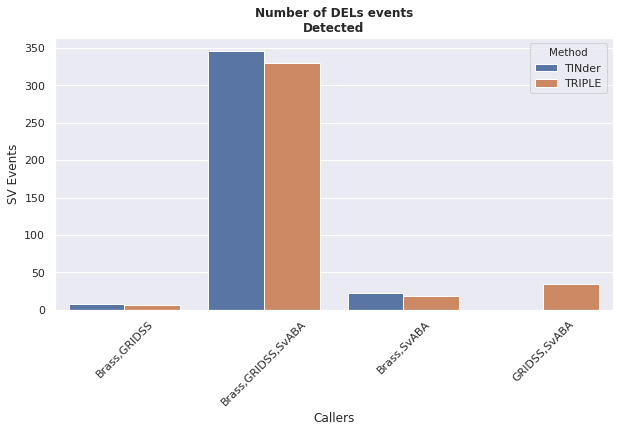

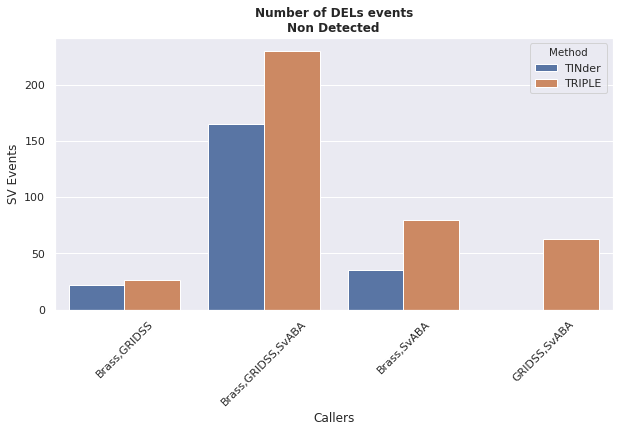

In [124]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DELs events\nDetected',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DELs events\nNon Detected',weight='bold')
plt.xticks(rotation=45)
plt.show()

# - Caller Combinations: blacklist

In [125]:
#TRIPLE_noBLACK_DELs
#TINDER_noBLACK_DELs

In [126]:
print(TINDER_noBLACK_DELs.shape)
TINDER_noBLACK_DELs.head(1)

(565, 13)


,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
7,Detected,0.005078999791294336,0.005808,14,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,66.0,14_22866689_14_23004506_IID_H158604_T01_01_WG01,38.0


In [127]:
print(TRIPLE_noBLACK_DELs.shape)
TRIPLE_noBLACK_DELs.head(1)

(589, 11)


,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8.0,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8.0


In [128]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [129]:
TINDER_noBLACK_DELs['Callers']=TINDER_noBLACK_DELs.apply(lambda row: label_caller(row), axis=1)
TRIPLE_noBLACK_DELs['Callers']=TRIPLE_noBLACK_DELs.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [130]:
countsTIN=TINDER_noBLACK_DELs.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       32
             Brass,GRIDSS,SvABA               162
             Brass,GRIDSS                      21
Detected     Brass,SvABA                       16
             Brass,GRIDSS,SvABA               327
             Brass,GRIDSS                       7

- TRIPLE:

In [131]:
countsTRI=TRIPLE_noBLACK_DELs.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                      19
             Brass,SvABA                       52
             Brass,GRIDSS,SvABA               152
             Brass,GRIDSS                       5
Detected     GRIDSS,SvABA                      32
             Brass,SvABA                       13
             Brass,GRIDSS,SvABA               310
             Brass,GRIDSS                       6

In [132]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                      7                6
             Brass,GRIDSS,SvABA              327              310
             Brass,SvABA                      16               13
             GRIDSS,SvABA                    NaN               32
Non Detected Brass,GRIDSS                     21                5
             Brass,GRIDSS,SvABA              162              152
             Brass,SvABA                      32               52
             GRIDSS,SvABA                    NaN               19

In [133]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


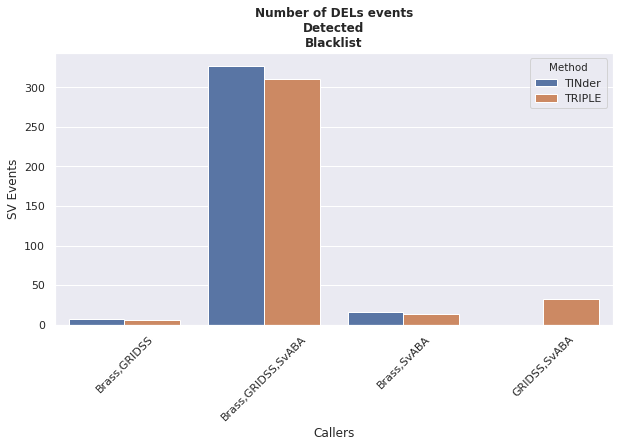

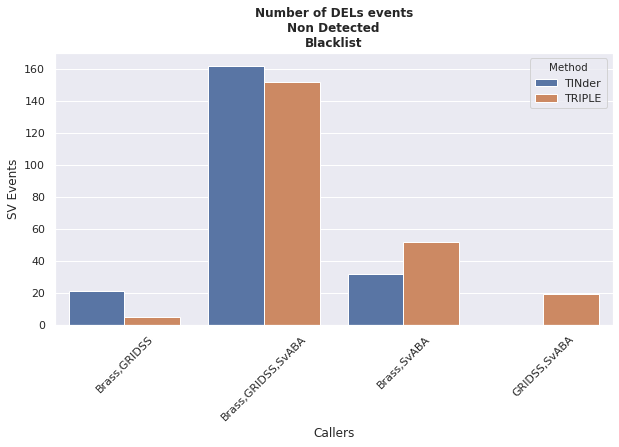

In [134]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DELs events\nDetected\nBlacklist',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DELs events\nNon Detected\nBlacklist',weight='bold')
plt.xticks(rotation=45)
plt.show()

# B) Intersection Duplication:

In [105]:
tinder_full_set_DUP=tinder_full_set_keys[tinder_full_set_keys['SV type']=='DUP']
tinder_full_set_DUP_2intersect=tinder_full_set_DUP[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','keys']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DUP_2intersect['SV chrom']=tinder_full_set_DUP_2intersect['SV chrom'].map(str)
tinder_full_set_DUP_2intersect['SV length']=tinder_full_set_DUP_2intersect['SV length'].map(int)
tinder_full_set_DUP_2intersect['GD_AF']=tinder_full_set_DUP_2intersect['GD_AF'].map(str)
tinder_full_set_DUP_2intersect['GD_POPMAX_AF']=tinder_full_set_DUP_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_DUP_2intersect['brass_PS']=tinder_full_set_DUP_2intersect['brass_PS'].map(str)
tinder_full_set_DUP_2intersect['brass_RC']=tinder_full_set_DUP_2intersect['brass_RC'].map(str)
tinder_full_set_DUP_2intersect['gridss_VF']=tinder_full_set_DUP_2intersect['gridss_VF'].map(str)
tinder_full_set_DUP_2intersect['svaba_AD']=tinder_full_set_DUP_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DUP_2intersect.shape)
tinder_full_set_DUP_2intersect.head()

(206, 13)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,0,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01
30,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.00044900001375935993,26,18,52,0,8_83891490_8_83893303_IID_H158604_T01_01_WG01
42,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.0,40,26,64,41,13_58011247_13_58016252_IID_H158605_T01_01_WG01
46,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0010760000441223383,0.0015529999509453802,34,10,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01
68,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.00236900011077523,41,20,49,48,8_101179292_8_101181852_IID_H158605_T01_01_WG01


In [106]:
triple_full_info_dup.head(2)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9


In [107]:
triple_full_info_dup_DUP=triple_full_info_dup[triple_full_info_dup['SV type']=='DUP']
print(triple_full_info_dup_DUP.shape)
triple_full_info_dup_DUP.head()

(86, 10)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,0,8
47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,20,0,0,14
151,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,11,67,26
155,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,17,61,47
158,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,55,28,70,39


In [108]:
triple_full_info_dup_DUP_2intersect=triple_full_info_dup_DUP.copy()
triple_full_info_dup_DUP_2intersect['keys']=triple_full_info_dup_DUP_2intersect['ID']+'_'+triple_full_info_dup_DUP_2intersect['Sample']

triple_full_info_dup_DUP_2intersect['to_index']=triple_full_info_dup_DUP_2intersect['keys']
triple_full_info_dup_DUP_2intersect.index = triple_full_info_dup_DUP_2intersect['to_index']
triple_full_info_dup_DUP_2intersect=triple_full_info_dup_DUP_2intersect[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_full_info_dup_DUP_2intersect.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
to_index,,,,,,,,,,
12_95588243_12_95589486_DUP_-+_IID_H158635_T01_01_WG01,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,0,8
6_32452838_6_32512203_DUP_-+_IID_H158635_T01_01_WG01,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,20,0,0,14
2_204224087_2_204237921_DUP_-+_IID_H158632_T01_01_WG01,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,11,67,26
2_204237518_2_204248875_DUP_-+_IID_H158632_T01_01_WG01,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,17,61,47
3_15596176_3_15601901_DUP_-+_IID_H158632_T01_01_WG01,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,55,28,70,39


In [109]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DUP_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_full_info_dup_DUP_2intersect.values.tolist())

I_duplications = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','size','SVtype','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','key','chr_band', 'start_band', 'end_band','ID','SV type','Sample.1','brass_PS.tr','brass_RC.tr','gridss_VF.tr','svaba_AD.tr'])
#I = I[I.chr_band!="X"]
print(I_duplications.shape)
I_duplications.head()

(326, 23)


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr
0,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.001076,0.001553,34,10,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01,14,106382716,106552283,14_106382716_14_106552283_DUP_-+,DUP,IID_H158605_T01_01_WG01,34,10,46,46
1,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.001076,0.001553,34,10,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01,14,106478109,107048698,14_106478109_14_107048698_DUP_-+,DUP,IID_H158622_T01_01_WG01,22,18,0,57
2,11,77932829,77939621,6792,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,21,7,29,25,11_77932829_11_77939621_IID_H158606_T01_01_WG01,11,77932829,77939621,11_77932829_11_77939621_DUP_-+,DUP,IID_H158606_T01_01_WG01,21,7,29,25
3,11,77932829,77939621,6792,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,21,7,29,25,11_77932829_11_77939621_IID_H158606_T01_01_WG01,11,36492836,106436144,11_36492836_11_106436144_DUP_-+,DUP,IID_H158638_T01_01_WG01,0,0,11,10
4,6,25909421,25913762,4341,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,8,0,11,0,6_25909421_6_25913762_IID_H158606_T01_01_WG01,6,25909421,25913762,6_25909421_6_25913762_DUP_-+,DUP,IID_H158606_T01_01_WG01,8,4,11,0


In [110]:
I_duplications_PATIENT=I_duplications[I_duplications['Sample']==I_duplications['Sample.1']]
I_duplications_PATIENT['keys']=I_duplications_PATIENT['chr_seg'].map(str)+'_'+I_duplications_PATIENT['start_seg'].map(str)+'_'+I_duplications_PATIENT['end_seg'].map(str)+'_'+I_duplications_PATIENT['Sample'].map(str)
print(I_duplications_PATIENT.shape)
print(len(I_duplications_PATIENT['keys'].unique()))
I_duplications_PATIENT.head()

(215, 24)
67


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr,keys
0,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.001076,0.001553,34,10,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01,14,106382716,106552283,14_106382716_14_106552283_DUP_-+,DUP,IID_H158605_T01_01_WG01,34,10,46,46,14_106382716_106552283_IID_H158605_T01_01_WG01
2,11,77932829,77939621,6792,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,21,7,29,25,11_77932829_11_77939621_IID_H158606_T01_01_WG01,11,77932829,77939621,11_77932829_11_77939621_DUP_-+,DUP,IID_H158606_T01_01_WG01,21,7,29,25,11_77932829_77939621_IID_H158606_T01_01_WG01
4,6,25909421,25913762,4341,DUP,IID_H158606_T01_01_WG01,-1.000000,-1.000000,8,0,11,0,6_25909421_6_25913762_IID_H158606_T01_01_WG01,6,25909421,25913762,6_25909421_6_25913762_DUP_-+,DUP,IID_H158606_T01_01_WG01,8,4,11,0,6_25909421_25913762_IID_H158606_T01_01_WG01
5,12,115909573,115910799,1226,DUP,IID_H158608_T01_01_WG01,-1.000000,-1.000000,29,16,46,44,12_115909573_12_115910799_IID_H158608_T01_01_WG01,12,115909573,115910799,12_115909573_12_115910799_DUP_-+,DUP,IID_H158608_T01_01_WG01,29,16,46,44,12_115909573_115910799_IID_H158608_T01_01_WG01
6,2,89161441,89214587,53146,DUP,IID_H158608_T01_01_WG01,0.000047,0.000561,48,23,63,46,2_89161441_2_89214587_IID_H158608_T01_01_WG01,2,89161441,89214587,2_89161441_2_89214587_DUP_-+,DUP,IID_H158608_T01_01_WG01,48,23,63,30,2_89161441_89214587_IID_H158608_T01_01_WG01


- Overlapping of deletions around 70%:

In [111]:
I_duplications_PATIENT['start_seg']=I_duplications_PATIENT['start_seg'].astype(int)
I_duplications_PATIENT['end_seg']=I_duplications_PATIENT['end_seg'].astype(int)
I_duplications_PATIENT['start_band']=I_duplications_PATIENT['start_band'].astype(int)
I_duplications_PATIENT['end_band']=I_duplications_PATIENT['end_band'].astype(int) 

I_duplications_70_PATIENT=pd.DataFrame()
for index,row in I_duplications_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_duplications_70_PATIENT=I_duplications_70_PATIENT.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_duplications_70_PATIENT=I_duplications_70_PATIENT.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] < row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_duplications_70_PATIENT=I_duplications_70_PATIENT.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_duplications_70_PATIENT=I_duplications_70_PATIENT.append(row)
            continue
   

print(I_duplications_70_PATIENT.shape)
print(len(I_duplications_70_PATIENT['keys'].unique()))
I_duplications_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(120, 24)
64


,GD_AF,GD_POPMAX_AF,ID,SV type,SVtype,Sample,Sample.1,brass_PS,brass_PS.tr,brass_RC,brass_RC.tr,chr_band,chr_seg,end_band,end_seg,gridss_VF,gridss_VF.tr,key,keys,size,start_band,start_seg,svaba_AD,svaba_AD.tr
0,0.001076,0.001553,14_106382716_14_106552283_DUP_-+,DUP,DUP,IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,34.0,34.0,10.0,10.0,14,14,106552283.0,106552283.0,46.0,46.0,14_106382716_14_106552283_IID_H158605_T01_01_WG01,14_106382716_106552283_IID_H158605_T01_01_WG01,169567.0,106382716.0,106382716.0,46.0,46.0
2,-1.000000,-1.000000,11_77932829_11_77939621_DUP_-+,DUP,DUP,IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,21.0,21.0,7.0,7.0,11,11,77939621.0,77939621.0,29.0,29.0,11_77932829_11_77939621_IID_H158606_T01_01_WG01,11_77932829_77939621_IID_H158606_T01_01_WG01,6792.0,77932829.0,77932829.0,25.0,25.0
4,-1.000000,-1.000000,6_25909421_6_25913762_DUP_-+,DUP,DUP,IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,8.0,8.0,0.0,4.0,6,6,25913762.0,25913762.0,11.0,11.0,6_25909421_6_25913762_IID_H158606_T01_01_WG01,6_25909421_25913762_IID_H158606_T01_01_WG01,4341.0,25909421.0,25909421.0,0.0,0.0
5,-1.000000,-1.000000,12_115909573_12_115910799_DUP_-+,DUP,DUP,IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,29.0,29.0,16.0,16.0,12,12,115910799.0,115910799.0,46.0,46.0,12_115909573_12_115910799_IID_H158608_T01_01_WG01,12_115909573_115910799_IID_H158608_T01_01_WG01,1226.0,115909573.0,115909573.0,44.0,44.0
6,0.000047,0.000561,2_89161441_2_89214587_DUP_-+,DUP,DUP,IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,48.0,48.0,23.0,23.0,2,2,89214587.0,89214587.0,63.0,63.0,2_89161441_2_89214587_IID_H158608_T01_01_WG01,2_89161441_89214587_IID_H158608_T01_01_WG01,53146.0,89161441.0,89161441.0,46.0,30.0


- Detected/NonDetected:

In [112]:
tinder_full_set_DUP.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,0,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01


In [113]:
tinder_full_set_DUP_DETECT=tinder_full_set_DUP[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','keys']]
tinder_full_set_DUP_DETECT.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.000000,30,0,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01
30,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.000449,26,18,52,0,8_83891490_8_83893303_IID_H158604_T01_01_WG01
42,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.000000,40,26,64,41,13_58011247_13_58016252_IID_H158605_T01_01_WG01
46,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0010760000441223383,0.001553,34,10,46,46,14_106382716_14_106552283_IID_H158605_T01_01_WG01
68,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.002369,41,20,49,48,8_101179292_8_101181852_IID_H158605_T01_01_WG01


In [114]:
detection=[]
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if (str(row['keys']) in I_duplications_70_PATIENT['key'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_full_set_DUP_DETECT['Detection']=detection
tinder_full_set_DUP_DETECT[tinder_full_set_DUP_DETECT['Detection']=='Non Detected'].head()

206


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.000000,30,0,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected
30,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.000449,26,18,52,0,8_83891490_8_83893303_IID_H158604_T01_01_WG01,Non Detected
42,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.000000,40,26,64,41,13_58011247_13_58016252_IID_H158605_T01_01_WG01,Non Detected
68,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.002369,41,20,49,48,8_101179292_8_101181852_IID_H158605_T01_01_WG01,Non Detected
101,2,203281241,203286817,5576,DUP,IID_H158606_T01_01_WG01,0.0004900000058114529,0.000940,60,0,0,61,2_203281241_2_203286817_IID_H158606_T01_01_WG01,Non Detected


In [115]:
print(tinder_full_set_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(206, 14)
64 142


In [116]:
#Joe
tinder_full_set_DUP_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_DUP_DETECT.tsv',sep='\t')

### 2.2) Precision: TripleCaller calls in TINder: yellow and green areas

In [117]:
tinder_full_set.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,0,62,36


In [118]:
tinder_full_set_DUP=tinder_full_set[tinder_full_set['SV type']=='DUP']
tinder_full_set_DUP_2intersect=tinder_full_set_DUP[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_DUP_2intersect['SV length']=tinder_full_set_DUP_2intersect['SV length'].map(int)
tinder_full_set_DUP_2intersect['GD_AF']=tinder_full_set_DUP_2intersect['GD_AF'].map(str)
tinder_full_set_DUP_2intersect['GD_POPMAX_AF']=tinder_full_set_DUP_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_DUP_2intersect['brass_PS']=tinder_full_set_DUP_2intersect['brass_PS'].map(str)
tinder_full_set_DUP_2intersect['brass_RC']=tinder_full_set_DUP_2intersect['brass_RC'].map(str)
tinder_full_set_DUP_2intersect['gridss_VF']=tinder_full_set_DUP_2intersect['gridss_VF'].map(str)
tinder_full_set_DUP_2intersect['svaba_AD']=tinder_full_set_DUP_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_DUP_2intersect.shape)
tinder_full_set_DUP_2intersect.head()

(206, 12)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,0,62,36
30,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.00044900001375935993,26,18,52,0
42,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.0,40,26,64,41
46,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0010760000441223383,0.0015529999509453802,34,10,46,46
68,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.00236900011077523,41,20,49,48


In [119]:
tinder_full_set_DUP_2intersect
#keys
keys=[]
for index,row in tinder_full_set_DUP_2intersect.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV start2'])+'_'+row['Sample'])
tinder_full_set_DUP_2intersect['keys']=keys
tinder_full_set_DUP_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,0,62,36,10_120303654_120305644_IID_H158604_T01_01_WG01
30,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,9.7999996796716e-05,0.00044900001375935993,26,18,52,0,8_83891490_83893303_IID_H158604_T01_01_WG01
42,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1,-1.0,40,26,64,41,13_58011247_58016252_IID_H158605_T01_01_WG01
46,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0010760000441223383,0.0015529999509453802,34,10,46,46,14_106382716_106552283_IID_H158605_T01_01_WG01
68,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.000977999996393919,0.00236900011077523,41,20,49,48,8_101179292_101181852_IID_H158605_T01_01_WG01


In [120]:
tinder_full_set_DUP_2intersect2=tinder_full_set_DUP_2intersect.copy()
tinder_full_set_DUP_2intersect2['to_index']=tinder_full_set_DUP_2intersect['keys']
tinder_full_set_DUP_2intersect2.index = tinder_full_set_DUP_2intersect2['to_index']
tinder_full_set_DUP_2intersect2=tinder_full_set_DUP_2intersect2[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','keys']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_full_set_DUP_2intersect2.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
to_index,,,,,,,,,,,,
10_120303654_120305644_IID_H158604_T01_01_WG01,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1.0,30,0,62,36,10_120303654_120305644_IID_H158604_T01_01_WG01
8_83891490_83893303_IID_H158604_T01_01_WG01,8,83891490,83893303,1813,DUP,IID_H158604_T01_01_WG01,0.00044900001375935993,26,18,52,0,8_83891490_83893303_IID_H158604_T01_01_WG01
13_58011247_58016252_IID_H158605_T01_01_WG01,13,58011247,58016252,5005,DUP,IID_H158605_T01_01_WG01,-1.0,40,26,64,41,13_58011247_58016252_IID_H158605_T01_01_WG01
14_106382716_106552283_IID_H158605_T01_01_WG01,14,106382716,106552283,169567,DUP,IID_H158605_T01_01_WG01,0.0015529999509453802,34,10,46,46,14_106382716_106552283_IID_H158605_T01_01_WG01
8_101179292_101181852_IID_H158605_T01_01_WG01,8,101179292,101181852,2560,DUP,IID_H158605_T01_01_WG01,0.00236900011077523,41,20,49,48,8_101179292_101181852_IID_H158605_T01_01_WG01


In [121]:
print(triple_full_info_dup_DUP.shape)
triple_full_info_dup_DUP.head(2)

(86, 10)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,0,8
47,6,32452838,32512203,6_32452838_6_32512203_DUP_-+,DUP,IID_H158635_T01_01_WG01,20,0,0,14


In [122]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DUP.values.tolist())
list_bed_cytobands=BedTool(tinder_full_set_DUP_2intersect2.values.tolist())

I_duplications_TC = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg','ID','SV type','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD','chr_band', 'start_band','end_band','size','SVtype','Sample.1','GD_POPMAX_AF','brass_PS.tr','brass_RC.tr','gridss_VF.tr','svaba_AD.tr','keys'])
#I = I[I.chr_band!="X"]
print(I_duplications_TC.shape)
I_duplications_TC.head()

(326, 22)


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr,keys
0,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,0,8,12,69547381,118732981,49185600,DUP,IID_H158639_T01_01_WG01,-1.0,29,0,32,45,12_69547381_118732981_IID_H158639_T01_01_WG01
1,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,0,8,12,69547381,118732981,49185600,DUP,IID_H158671_T01_01_WG01,-1.0,17,0,60,72,12_69547381_118732981_IID_H158671_T01_01_WG01
2,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,0,8,12,25956276,104359837,78403561,DUP,IID_H158644_T01_01_WG01,-1.0,20,0,0,21,12_25956276_104359837_IID_H158644_T01_01_WG01
3,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,0,8,12,25956255,104359832,78403577,DUP,IID_H158668_T01_01_WG01,-1.0,16,36,0,17,12_25956255_104359832_IID_H158668_T01_01_WG01
4,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,11,67,26,2,204224086,204248954,24868,DUP,IID_H158632_T01_01_WG01,-1.0,10,0,0,10,2_204224086_204248954_IID_H158632_T01_01_WG01


In [123]:
I_duplications_TC_PATIENT=I_duplications_TC[I_duplications_TC['Sample']==I_duplications_TC['Sample.1']]
I_duplications_TC_PATIENT['keys']=I_duplications_TC_PATIENT['chr_seg'].map(str)+'_'+I_duplications_TC_PATIENT['start_seg'].map(str)+'_'+I_duplications_TC_PATIENT['end_seg'].map(str)+'_'+I_duplications_TC_PATIENT['Sample'].map(str)
print(I_duplications_TC_PATIENT.shape)
print(len(I_duplications_TC_PATIENT['keys'].unique()))
I_duplications_TC_PATIENT.head()

(215, 22)
67


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr,keys
4,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,11,67,26,2,204224086,204248954,24868,DUP,IID_H158632_T01_01_WG01,-1.0,10,0,0,10,2_204224087_204237921_IID_H158632_T01_01_WG01
5,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,11,67,26,2,204224087,204237979,13892,DUP,IID_H158632_T01_01_WG01,-1.0,25,17,67,26,2_204224087_204237921_IID_H158632_T01_01_WG01
6,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,11,67,26,2,204237518,204248875,11357,DUP,IID_H158632_T01_01_WG01,-1.0,27,11,61,47,2_204224087_204237921_IID_H158632_T01_01_WG01
7,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,17,61,47,2,204224086,204248954,24868,DUP,IID_H158632_T01_01_WG01,-1.0,10,0,0,10,2_204237518_204248875_IID_H158632_T01_01_WG01
8,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,17,61,47,2,204224087,204237979,13892,DUP,IID_H158632_T01_01_WG01,-1.0,25,17,67,26,2_204237518_204248875_IID_H158632_T01_01_WG01


- Overlapping of duplications around 70%:

In [124]:
I_duplications_TC_PATIENT['start_seg']=I_duplications_TC_PATIENT['start_seg'].astype(int)
I_duplications_TC_PATIENT['end_seg']=I_duplications_TC_PATIENT['end_seg'].astype(int)
I_duplications_TC_PATIENT['start_band']=I_duplications_TC_PATIENT['start_band'].astype(int)
I_duplications_TC_PATIENT['end_band']=I_duplications_TC_PATIENT['end_band'].astype(int) 

I_duplications_TC_70_PATIENT=pd.DataFrame()
for index,row in I_duplications_TC_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_duplications_TC_70_PATIENT=I_duplications_TC_70_PATIENT.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_duplications_TC_70_PATIENT=I_duplications_TC_70_PATIENT.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_duplications_TC_70_PATIENT=I_duplications_TC_70_PATIENT.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_duplications_TC_70_PATIENT=I_duplications_TC_70_PATIENT.append(row)
            continue
   

print(I_duplications_TC_70_PATIENT.shape)
print(len(I_duplications_TC_70_PATIENT['keys'].unique()))
I_duplications_TC_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(123, 22)
64


,GD_POPMAX_AF,ID,SV type,SVtype,Sample,Sample.1,brass_PS,brass_PS.tr,brass_RC,brass_RC.tr,chr_band,chr_seg,end_band,end_seg,gridss_VF,gridss_VF.tr,keys,size,start_band,start_seg,svaba_AD,svaba_AD.tr
4,-1.000000,2_204224087_2_204237921_DUP_-+,DUP,DUP,IID_H158632_T01_01_WG01,IID_H158632_T01_01_WG01,25.0,10.0,11.0,0.0,2,2,204248954.0,204237921.0,67.0,0.0,2_204224087_204237921_IID_H158632_T01_01_WG01,24868.0,204224086.0,204224087.0,26.0,10.0
5,-1.000000,2_204224087_2_204237921_DUP_-+,DUP,DUP,IID_H158632_T01_01_WG01,IID_H158632_T01_01_WG01,25.0,25.0,11.0,17.0,2,2,204237979.0,204237921.0,67.0,67.0,2_204224087_204237921_IID_H158632_T01_01_WG01,13892.0,204224087.0,204224087.0,26.0,26.0
7,-1.000000,2_204237518_2_204248875_DUP_-+,DUP,DUP,IID_H158632_T01_01_WG01,IID_H158632_T01_01_WG01,27.0,10.0,17.0,0.0,2,2,204248954.0,204248875.0,61.0,0.0,2_204237518_204248875_IID_H158632_T01_01_WG01,24868.0,204224086.0,204237518.0,47.0,10.0
9,-1.000000,2_204237518_2_204248875_DUP_-+,DUP,DUP,IID_H158632_T01_01_WG01,IID_H158632_T01_01_WG01,27.0,27.0,17.0,11.0,2,2,204248875.0,204248875.0,61.0,61.0,2_204237518_204248875_IID_H158632_T01_01_WG01,11357.0,204237518.0,204237518.0,47.0,47.0
10,0.000754,3_15596176_3_15601901_DUP_-+,DUP,DUP,IID_H158632_T01_01_WG01,IID_H158632_T01_01_WG01,55.0,55.0,28.0,21.0,3,3,15601901.0,15601901.0,70.0,70.0,3_15596176_15601901_IID_H158632_T01_01_WG01,5725.0,15596176.0,15596176.0,39.0,39.0


- Detected/NonDetected:

In [125]:
triple_full_info_dup_DUP_DETECT=triple_full_info_dup_DUP.copy()
keys=[]
for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+row['Sample'])
triple_full_info_dup_DUP_DETECT['keys']=keys

In [126]:
detection=[]
for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    if (str(row['keys']) in I_duplications_TC_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_full_info_dup_DUP_DETECT['Detection']=detection
triple_full_info_dup_DUP_DETECT[triple_full_info_dup_DUP_DETECT['Detection']=='Detected'].head(10)

86


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
151,2,204224087,204237921,2_204224087_2_204237921_DUP_-+,DUP,IID_H158632_T01_01_WG01,25,11,67,26,2_204224087_204237921_IID_H158632_T01_01_WG01,Detected
155,2,204237518,204248875,2_204237518_2_204248875_DUP_-+,DUP,IID_H158632_T01_01_WG01,27,17,61,47,2_204237518_204248875_IID_H158632_T01_01_WG01,Detected
158,3,15596176,15601901,3_15596176_3_15601901_DUP_-+,DUP,IID_H158632_T01_01_WG01,55,28,70,39,3_15596176_15601901_IID_H158632_T01_01_WG01,Detected
568,9,21191503,32532021,9_21191503_9_32532021_DUP_-+,DUP,IID_H158625_T01_01_WG01,40,19,58,43,9_21191503_32532021_IID_H158625_T01_01_WG01,Detected
662,9,32341087,32345901,9_32341087_9_32345901_DUP_-+,DUP,IID_H158625_T01_01_WG01,61,26,75,60,9_32341087_32345901_IID_H158625_T01_01_WG01,Detected
2,12,115909573,115910799,12_115909573_12_115910799_DUP_-+,DUP,IID_H158608_T01_01_WG01,29,16,46,44,12_115909573_115910799_IID_H158608_T01_01_WG01,Detected
16,2,89161441,89214587,2_89161441_2_89214587_DUP_-+,DUP,IID_H158608_T01_01_WG01,48,23,63,30,2_89161441_89214587_IID_H158608_T01_01_WG01,Detected
82,19,4842214,4909757,19_4842214_19_4909757_DUP_-+,DUP,IID_H158618_T01_01_WG01,49,26,67,48,19_4842214_4909757_IID_H158618_T01_01_WG01,Detected
476,17,53624213,74434948,17_53624213_17_74434948_DUP_-+,DUP,IID_H158631_T01_01_WG01,0,0,46,45,17_53624213_74434948_IID_H158631_T01_01_WG01,Detected
779,17,57483548,75487029,17_57483548_17_75487029_DUP_-+,DUP,IID_H158631_T01_01_WG01,0,0,16,15,17_57483548_75487029_IID_H158631_T01_01_WG01,Detected


In [127]:
#Joe
triple_full_info_dup_DUP_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_DUP_DETECT.tsv',sep='\t')

In [128]:
print(triple_full_info_dup_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(86, 12)
64 22


In [129]:
print(tinder_full_set_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(206, 14)
64 142


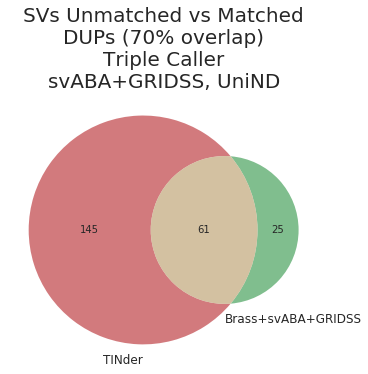

In [177]:
venn2(subsets = (145,25,61), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS, UniND',fontsize=20)
plt.show()

In [ ]:
venn2(subsets = (145,25,61), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS, UniND, SUPP',fontsize=20)
plt.show()

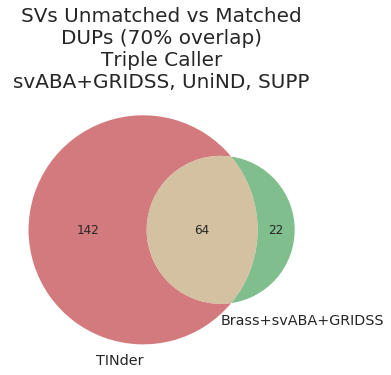

In [524]:
venn2(subsets = (142,22,64), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS, UniND, SUPP',fontsize=20)
plt.show()

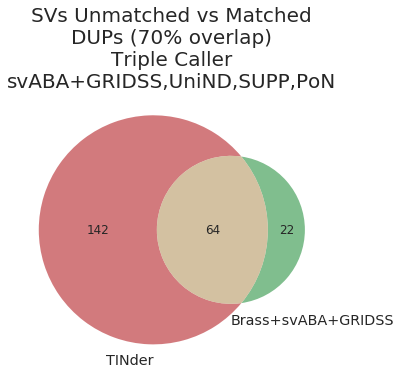

In [161]:
venn2(subsets = (142,22,64), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND,SUPP,PoN',fontsize=20)
plt.show()

- green area:

In [162]:
triple_full_info_dup_DUP_DETECT_check=triple_full_info_dup_DUP_DETECT[~((triple_full_info_dup_DUP_DETECT['SV chrom']=='X') | (triple_full_info_dup_DUP_DETECT['SV chrom']=='Y'))]

triple_full_info_dup_DUP_DETECT_check['SV start']=triple_full_info_dup_DUP_DETECT_check['SV start'].map(int)
triple_full_info_dup_DUP_DETECT_check['SV chrom']=triple_full_info_dup_DUP_DETECT_check['SV chrom'].map(int)

triple_full_info_dup_DUP_DETECT_check[triple_full_info_dup_DUP_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index().head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,0,1,8768030,8775099,1_8768030_1_8775099_DUP_-+,DUP,IID_H158621_T01_01_WG01,37,50,22,1_8768030_8775099_IID_H158621_T01_01_WG01,Non Detected
1,3501,1,77971370,106639460,1_77971370_1_106639460_DUP_-+,DUP,IID_H158613_T01_01_WG01,9,19,18,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected
2,0,1,246407292,246410776,1_246407292_1_246410776_DUP_-+,DUP,IID_H158637_T01_01_WG01,18,0,17,1_246407292_246410776_IID_H158637_T01_01_WG01,Non Detected
3,156,2,89161436,89265778,2_89161436_2_89265778_DUP_-+,DUP,IID_H158617_T01_01_WG01,45,57,20,2_89161436_89265778_IID_H158617_T01_01_WG01,Non Detected
4,24,4,93567358,93570162,4_93567358_4_93570162_DUP_-+,DUP,IID_H158666_T01_01_WG01,22,43,0,4_93567358_93570162_IID_H158666_T01_01_WG01,Non Detected


- red area:

In [163]:
tinder_full_set_DUP_DETECT_check=tinder_full_set_DUP_DETECT[~((tinder_full_set_DUP_DETECT['SV chrom']=='X') | (tinder_full_set_DUP_DETECT['SV chrom']=='Y'))]

tinder_full_set_DUP_DETECT_check['SV start']=tinder_full_set_DUP_DETECT_check['SV start'].map(int)
tinder_full_set_DUP_DETECT_check['SV chrom']=tinder_full_set_DUP_DETECT_check['SV chrom'].map(int)

tinder_full_set_DUP_DETECT_check[tinder_full_set_DUP_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index().head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,3162,1,1381103,1432704,51601,DUP,IID_H158669_T01_01_WG01,4.8999998398358e-05,0.000134,10,0,9,1_1381103_1_1432704_IID_H158669_T01_01_WG01,Non Detected
1,1320,1,16875148,145382613,128507465,DUP,IID_H158627_T01_01_WG01,-1,-1.000000,9,0,17,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected
2,1813,1,16875156,145382616,128507460,DUP,IID_H158636_T01_01_WG01,-1,-1.000000,8,0,16,1_16875156_1_145382616_IID_H158636_T01_01_WG01,Non Detected
3,1053,1,21243153,21716289,473136,DUP,IID_H158623_T01_01_WG01,-1,-1.000000,19,0,25,1_21243153_1_21716289_IID_H158623_T01_01_WG01,Non Detected
4,1217,1,23351172,23354476,3304,DUP,IID_H158625_T01_01_WG01,-1,-1.000000,28,59,40,1_23351172_1_23354476_IID_H158625_T01_01_WG01,Non Detected


#### - Brass score >10:

In [164]:
print(tinder_full_set_DUP_DETECT.shape)
tinder_full_set_DUP_DETECT.head(1)

(206, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected


In [165]:
tinder_full_set_DUP_DETECT_score=tinder_full_set_DUP_DETECT[tinder_full_set_DUP_DETECT['brass_PS']>=10]
print(tinder_full_set_DUP_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_DUP_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(184, 13)
54 130


In [166]:
print(triple_full_info_dup_DUP_DETECT.shape)
triple_full_info_dup_DUP_DETECT.head(1)

(86, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected


In [167]:
triple_full_info_dup_DUP_DETECT['brass_PS']=triple_full_info_dup_DUP_DETECT['brass_PS'].map(int)
triple_full_info_dup_DUP_DETECT['gridss_VF']=triple_full_info_dup_DUP_DETECT['gridss_VF'].map(int)
triple_full_info_dup_DUP_DETECT['svaba_AD']=triple_full_info_dup_DUP_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DUP_DETECT_score=triple_full_info_dup_DUP_DETECT[(triple_full_info_dup_DUP_DETECT['brass_PS']>=10) | (triple_full_info_dup_DUP_DETECT['gridss_VF']>=10) | (triple_full_info_dup_DUP_DETECT['svaba_AD']>=10)]

print(triple_full_info_dup_DUP_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DUP_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(81, 11)
61 20


In [168]:
triple_full_info_dup_DUP_DETECT['brass_PS']=triple_full_info_dup_DUP_DETECT['brass_PS'].map(int)
#triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
#triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_DUP_DETECT_scorebrass=triple_full_info_dup_DUP_DETECT[(triple_full_info_dup_DUP_DETECT['brass_PS']>=10)]

print(triple_full_info_dup_DUP_DETECT_scorebrass.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_DUP_DETECT_scorebrass.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(66, 11)
51 15


#### - Sizes:

In [169]:
tinder_full_set_DUP_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected


In [170]:
tinder_full_set_DUP_DETECT_size=tinder_full_set_DUP_DETECT.copy()
tinder_full_set_DUP_DETECT_size['SV length']=tinder_full_set_DUP_DETECT_size['SV length'].map(int)

triple_full_info_dup_DUP_DETECT_size=triple_full_info_dup_DUP_DETECT.copy()
triple_full_info_dup_DUP_DETECT_size['SV length']=triple_full_info_dup_DUP_DETECT_size['SV end']-triple_full_info_dup_DUP_DETECT_size['SV start']

In [171]:
onlyTINder_DUPs=tinder_full_set_DUP_DETECT_size[tinder_full_set_DUP_DETECT_size['Detection']=='Non Detected']
common_DUPs=tinder_full_set_DUP_DETECT_size[tinder_full_set_DUP_DETECT_size['Detection']=='Detected']
onlyTRIPLE_DUPs=triple_full_info_dup_DUP_DETECT_size[triple_full_info_dup_DUP_DETECT_size['Detection']=='Non Detected']

In [172]:
#TINder
average_size=sum(onlyTINder_DUPs['SV length'])/len(onlyTINder_DUPs['SV length'])
print('onlyTINDER_DELs Size average\t',average_size)

#BTG
average_size=sum(onlyTRIPLE_DUPs['SV length'])/len(onlyTRIPLE_DUPs['SV length'])
print('onlyTRIPLE_DELs Size average\t',average_size)

#Common
average_size=sum(common_DUPs['SV length'])/len(common_DUPs['SV length'])
print('common_DELs Size average\t',average_size)

onlyTINDER_DELs Size average	 6683018.950704225
onlyTRIPLE_DELs Size average	 3585218.090909091
common_DELs Size average	 17166882.5625


In [173]:
sizes_TINder_df=pd.DataFrame(onlyTINder_DUPs,columns=['SV length'])
sizes_TINder_df['Group']='TINder'

sizes_TRIPLE_df=pd.DataFrame(onlyTRIPLE_DUPs,columns=['SV length'])
sizes_TRIPLE_df['Group']='TRIPLE'

sizes_COMMON_df=pd.DataFrame(common_DUPs,columns=['SV length'])
sizes_COMMON_df['Group']='COMMON'

In [174]:
sizes_TOTAL_df=sizes_TINder_df.copy()
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_TRIPLE_df,ignore_index=True)
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_COMMON_df,ignore_index=True)
#sizes_TOTAL_df

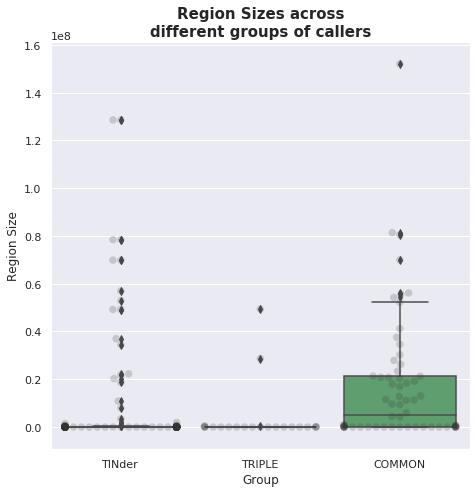

In [175]:
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='SV length', data=sizes_TOTAL_df,order=['TINder','TRIPLE','COMMON'])
ax = sns.swarmplot(x='Group',y='SV length',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['TINder','TRIPLE','COMMON'])
ax.set_title('Region Sizes across\ndifferent groups of callers',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

### - Black regions:

### A- TRIPLE:

In [130]:
triple_full_info_dup_DUP_DETECT.head(1)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,0,8,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected


In [131]:
triple_full_info_dup_DUP_DETECT_2intersectBLACK=triple_full_info_dup_DUP_DETECT[['SV chrom','SV start','SV end','SV type','Sample','keys','Detection','brass_PS','brass_RC','gridss_VF','svaba_AD']]
triple_full_info_dup_DUP_DETECT_2intersectBLACK['brass_PS']=triple_full_info_dup_DUP_DETECT_2intersectBLACK['brass_PS'].map(str)
triple_full_info_dup_DUP_DETECT_2intersectBLACK['brass_RC']=triple_full_info_dup_DUP_DETECT_2intersectBLACK['brass_RC'].map(str)
triple_full_info_dup_DUP_DETECT_2intersectBLACK['gridss_VF']=triple_full_info_dup_DUP_DETECT_2intersectBLACK['gridss_VF'].map(str)
triple_full_info_dup_DUP_DETECT_2intersectBLACK['svaba_AD']=triple_full_info_dup_DUP_DETECT_2intersectBLACK['svaba_AD'].map(str)

triple_full_info_dup_DUP_DETECT_2intersectBLACK.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/sit

,SV chrom,SV start,SV end,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD
6,12,95588243,95589486,DUP,IID_H158635_T01_01_WG01,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected,6,0,0,8
47,6,32452838,32512203,DUP,IID_H158635_T01_01_WG01,6_32452838_32512203_IID_H158635_T01_01_WG01,Non Detected,20,0,0,14
151,2,204224087,204237921,DUP,IID_H158632_T01_01_WG01,2_204224087_204237921_IID_H158632_T01_01_WG01,Detected,25,11,67,26
155,2,204237518,204248875,DUP,IID_H158632_T01_01_WG01,2_204237518_204248875_IID_H158632_T01_01_WG01,Detected,27,17,61,47
158,3,15596176,15601901,DUP,IID_H158632_T01_01_WG01,3_15596176_15601901_IID_H158632_T01_01_WG01,Detected,55,28,70,39


In [132]:
black_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist/blacklist_regions.bed',sep='\t',header=None,names=['chromosome','start','end'])
#blue_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist_uk_dan/blacklist_regions_uk_dan.bed',sep='\t',header=None,names=['chromosome','start','end'])

#black_bed=black_bed.append(blue_bed)

key_list=[]
for index,row in black_bed.iterrows():
    key_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end']))

black_bed['to_index']=key_list 
black_bed_2intersect=black_bed.copy()
black_bed_2intersect.index=black_bed_2intersect['to_index']
black_bed_2intersect.head()

,chromosome,start,end,to_index
to_index,,,,
1_1_840000,1,1,840000,1_1_840000
1_1560001_1605000,1,1560001,1605000,1_1560001_1605000
1_1620001_1680000,1,1620001,1680000,1_1620001_1680000
1_2580001_2700000,1,2580001,2700000,1_2580001_2700000
1_3855001_3990000,1,3855001,3990000,1_3855001_3990000


In [133]:
#1- Black list

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_DUP_DETECT_2intersectBLACK.values.tolist())
list_bed_cytobands=BedTool(black_bed_2intersect.values.tolist())

I_focal_blacklist = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','SV type','Sample','keys','Detection','brass_PS','brass_RC','gridss_VF','svaba_AD','chr_band','start_band', 'end_band','keys2' ])
#I = I[I.chr_band!="X"]
print(triple_full_info_dup_DUP_DETECT_2intersectBLACK.shape)
print(I_focal_blacklist.shape)
I_focal_blacklist.head()

(86, 11)
(380, 15)


,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2
0,6,32452838,32512203,DUP,IID_H158635_T01_01_WG01,6_32452838_32512203_IID_H158635_T01_01_WG01,Non Detected,20,0,0,14,6,32445001,32655000,6_32445001_32655000
1,9,21191503,32532021,DUP,IID_H158625_T01_01_WG01,9_21191503_32532021_IID_H158625_T01_01_WG01,Detected,40,19,58,43,9,21180001,21210000,9_21180001_21210000
2,9,21191503,32532021,DUP,IID_H158625_T01_01_WG01,9_21191503_32532021_IID_H158625_T01_01_WG01,Detected,40,19,58,43,9,23355001,23385000,9_23355001_23385000
3,2,89161441,89214587,DUP,IID_H158608_T01_01_WG01,2_89161441_89214587_IID_H158608_T01_01_WG01,Detected,48,23,63,30,2,89130001,90105000,2_89130001_90105000
4,17,53624213,74434948,DUP,IID_H158631_T01_01_WG01,17_53624213_74434948_IID_H158631_T01_01_WG01,Detected,0,0,46,45,17,58005001,58035000,17_58005001_58035000


In [134]:
I_focal_blacklist['start_seg']=I_focal_blacklist['start_seg'].map(int)
I_focal_blacklist['end_seg']=I_focal_blacklist['end_seg'].map(int)
I_focal_blacklist['start_band']=I_focal_blacklist['start_band'].map(int)
I_focal_blacklist['end_band']=I_focal_blacklist['end_band'].map(int)

In [135]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_focal_blacklist_70=[]
percentage=[]

for index,row in I_focal_blacklist.iterrows():
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_seg']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_seg']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        percentage.append(1)
        continue
                
I_focal_blacklist_70=pd.DataFrame(I_focal_blacklist_70)
I_focal_blacklist_70['Percentage']=percentage
print(I_focal_blacklist_70.shape)
I_focal_blacklist_70.sort_values(by=['chr_seg','start_seg']).reset_index().head()

(380, 16)


,index,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2,Percentage
0,26,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,7,19,18,1,104400001,104430000,1_104400001_104430000,0.001046
1,27,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,7,19,18,1,106005001,106035000,1_106005001_106035000,0.001046
2,28,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,7,19,18,1,82695001,82725000,1_82695001_82725000,0.001046
3,29,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,7,19,18,1,103920001,104010000,1_103920001_104010000,0.003139
4,30,1,77971370,106639460,DUP,IID_H158613_T01_01_WG01,1_77971370_106639460_IID_H158613_T01_01_WG01,Non Detected,9,7,19,18,1,104130001,104295000,1_104130001_104295000,0.005755


In [136]:
I_focal_blacklist_70_detected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Detected']
I_focal_blacklist_70_nondetected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Non Detected']

- Detected:

In [137]:
print(len(I_focal_blacklist_70_detected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_detected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

36
9_21191503_32532021_IID_H158625_T01_01_WG01 	 0.004276347870529371
2_89161441_89214587_IID_H158608_T01_01_WG01 	 1.0
17_53624213_74434948_IID_H158631_T01_01_WG01 	 0.040363254829778955
17_57483548_75487029_IID_H158631_T01_01_WG01 	 0.04665703260386145
1_80270241_93307117_IID_H158613_T01_01_WG01 	 0.032216076919041034
1_91351809_104129509_IID_H158613_T01_01_WG01 	 0.016434726124419888
22_18113784_40429270_IID_H158613_T01_01_WG01 	 0.1035144831710141
22_18162700_38953659_IID_H158613_T01_01_WG01 	 0.10894047744502794
22_41343925_47349511_IID_H158613_T01_01_WG01 	 0.004995182818129654
13_31476926_42683945_IID_H158617_T01_01_WG01 	 0.0026768045989749817
5_22503451_63694222_IID_H158616_T01_01_WG01 	 0.10742666118097181
5_26261588_178257462_IID_H158616_T01_01_WG01 	 0.05072483743867942
5_75581792_129806283_IID_H158616_T01_01_WG01 	 0.009681750631831658
7_70936968_94311945_IID_H158616_T01_01_WG01 	 0.11294094535365745
14_106382716_106552283_IID_H158605_T01_01_WG01 	 1.0
11_36492836_10643614

In [138]:
scatter_plot.head()

,Sample,Percentage
0,9_21191503_32532021_IID_H158625_T01_01_WG01,0.004276
1,2_89161441_89214587_IID_H158608_T01_01_WG01,1.000000
2,17_53624213_74434948_IID_H158631_T01_01_WG01,0.040363
3,17_57483548_75487029_IID_H158631_T01_01_WG01,0.046657
4,1_80270241_93307117_IID_H158613_T01_01_WG01,0.032216


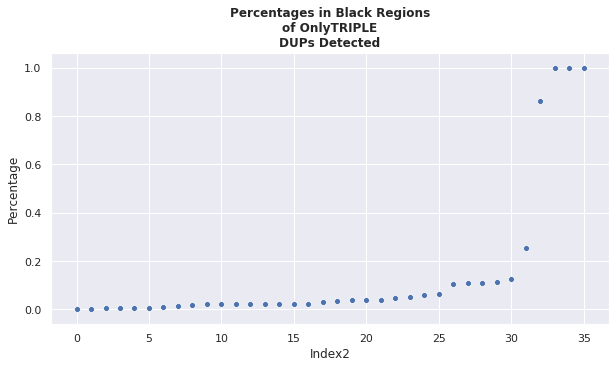

In [139]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTRIPLE\nDUPs Detected',weight='bold')
plt.show()

In [140]:
YELLOW_TRIPLE_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(YELLOW_TRIPLE_BLACK))
YELLOW_TRIPLE_BLACK

4


['2_89161441_89214587_IID_H158608_T01_01_WG01',
 '14_106382716_106552283_IID_H158605_T01_01_WG01',
 '9_38327562_75852185_IID_H158638_T01_01_WG01',
 '14_106327314_106330074_IID_H158620_T01_01_WG01']

- Non Detected:

In [141]:
print(len(I_focal_blacklist_70_nondetected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_nondetected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

7
6_32452838_32512203_IID_H158635_T01_01_WG01 	 1.0
1_77971370_106639460_IID_H158613_T01_01_WG01 	 0.029823821538163164
2_89161436_89265778_IID_H158617_T01_01_WG01 	 1.0
14_106478109_107048698_IID_H158622_T01_01_WG01 	 0.9211288685901762
6_32451354_32523412_IID_H158650_T01_01_WG01 	 1.0
6_51846112_101194085_IID_H158650_T01_01_WG01 	 0.10638706477366355
7_75759026_75761393_IID_H158614_T01_01_WG01 	 1.0


In [142]:
scatter_plot.head()

,Sample,Percentage
0,6_32452838_32512203_IID_H158635_T01_01_WG01,1.000000
1,1_77971370_106639460_IID_H158613_T01_01_WG01,0.029824
2,2_89161436_89265778_IID_H158617_T01_01_WG01,1.000000
3,14_106478109_107048698_IID_H158622_T01_01_WG01,0.921129
4,6_32451354_32523412_IID_H158650_T01_01_WG01,1.000000


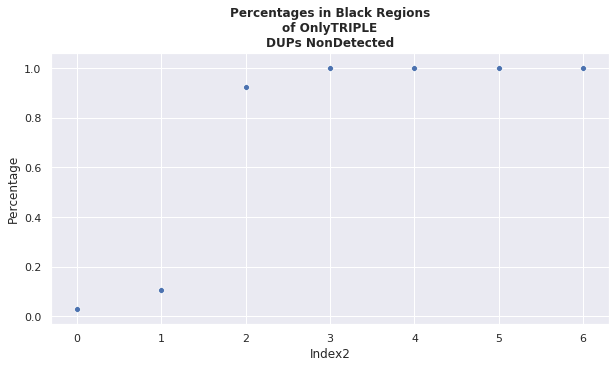

In [143]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTRIPLE\nDUPs NonDetected',weight='bold')
plt.show()

In [144]:
GREEN_TRIPLE_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(GREEN_TRIPLE_BLACK))
GREEN_TRIPLE_BLACK

5


['6_32452838_32512203_IID_H158635_T01_01_WG01',
 '2_89161436_89265778_IID_H158617_T01_01_WG01',
 '14_106478109_107048698_IID_H158622_T01_01_WG01',
 '6_32451354_32523412_IID_H158650_T01_01_WG01',
 '7_75759026_75761393_IID_H158614_T01_01_WG01']

In [145]:
TRIPLE_noBLACK_DUPs=pd.DataFrame()
triple_keys=YELLOW_TRIPLE_BLACK+GREEN_TRIPLE_BLACK

for index,row in triple_full_info_dup_DUP_DETECT.iterrows():
    if row['keys'] not in triple_keys:
        TRIPLE_noBLACK_DUPs=TRIPLE_noBLACK_DUPs.append(row)

print(TRIPLE_noBLACK_DUPs.shape)
TRIPLE_noBLACK_DUPs.head()

(77, 12)


,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
6,Non Detected,12_95588243_12_95589486_DUP_-+,12,95589486.0,95588243.0,DUP,IID_H158635_T01_01_WG01,6,0,0,12_95588243_95589486_IID_H158635_T01_01_WG01,8
151,Detected,2_204224087_2_204237921_DUP_-+,2,204237921.0,204224087.0,DUP,IID_H158632_T01_01_WG01,25,11,67,2_204224087_204237921_IID_H158632_T01_01_WG01,26
155,Detected,2_204237518_2_204248875_DUP_-+,2,204248875.0,204237518.0,DUP,IID_H158632_T01_01_WG01,27,17,61,2_204237518_204248875_IID_H158632_T01_01_WG01,47
158,Detected,3_15596176_3_15601901_DUP_-+,3,15601901.0,15596176.0,DUP,IID_H158632_T01_01_WG01,55,28,70,3_15596176_15601901_IID_H158632_T01_01_WG01,39
568,Detected,9_21191503_9_32532021_DUP_-+,9,32532021.0,21191503.0,DUP,IID_H158625_T01_01_WG01,40,19,58,9_21191503_32532021_IID_H158625_T01_01_WG01,43


In [146]:
#Joe
TRIPLE_noBLACK_DUPs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_DUP_DETECT_noBLACK.tsv',sep='\t')

### B- TINDER:

In [147]:
tinder_full_set_DUP_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,0,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected


In [148]:
tinder_full_set_DUP_DETECT_2intersectBLACK=tinder_full_set_DUP_DETECT[['SV chrom','SV start','SV start2','SV type','Sample','keys','Detection','brass_PS','brass_RC','gridss_VF','svaba_AD']]
tinder_full_set_DUP_DETECT_2intersectBLACK['brass_PS']=tinder_full_set_DUP_DETECT_2intersectBLACK['brass_PS'].map(str)
tinder_full_set_DUP_DETECT_2intersectBLACK['brass_RC']=tinder_full_set_DUP_DETECT_2intersectBLACK['brass_RC'].map(str)
tinder_full_set_DUP_DETECT_2intersectBLACK['gridss_VF']=tinder_full_set_DUP_DETECT_2intersectBLACK['gridss_VF'].map(str)
tinder_full_set_DUP_DETECT_2intersectBLACK['svaba_AD']=tinder_full_set_DUP_DETECT_2intersectBLACK['svaba_AD'].map(str)

tinder_full_set_DUP_DETECT_2intersectBLACK.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/sit

,SV chrom,SV start,SV start2,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,120305644,DUP,IID_H158604_T01_01_WG01,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected,30,0,62,36
30,8,83891490,83893303,DUP,IID_H158604_T01_01_WG01,8_83891490_8_83893303_IID_H158604_T01_01_WG01,Non Detected,26,18,52,0
42,13,58011247,58016252,DUP,IID_H158605_T01_01_WG01,13_58011247_13_58016252_IID_H158605_T01_01_WG01,Non Detected,40,26,64,41
46,14,106382716,106552283,DUP,IID_H158605_T01_01_WG01,14_106382716_14_106552283_IID_H158605_T01_01_WG01,Detected,34,10,46,46
68,8,101179292,101181852,DUP,IID_H158605_T01_01_WG01,8_101179292_8_101181852_IID_H158605_T01_01_WG01,Non Detected,41,20,49,48


In [149]:
black_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist/blacklist_regions.bed',sep='\t',header=None,names=['chromosome','start','end'])
#blue_bed=pd.read_csv('/ifs/res/leukgen/home/gutierj2/lowPassPeds/CNVkit/normals_indiv/blacklist_uk_dan/blacklist_regions_uk_dan.bed',sep='\t',header=None,names=['chromosome','start','end'])

#black_bed=black_bed.append(blue_bed)

key_list=[]
for index,row in black_bed.iterrows():
    key_list.append(str(row['chromosome'])+'_'+str(row['start'])+'_'+str(row['end']))

black_bed['to_index']=key_list 
black_bed_2intersect=black_bed.copy()
black_bed_2intersect.index=black_bed_2intersect['to_index']
black_bed_2intersect.head()

,chromosome,start,end,to_index
to_index,,,,
1_1_840000,1,1,840000,1_1_840000
1_1560001_1605000,1,1560001,1605000,1_1560001_1605000
1_1620001_1680000,1,1620001,1680000,1_1620001_1680000
1_2580001_2700000,1,2580001,2700000,1_2580001_2700000
1_3855001_3990000,1,3855001,3990000,1_3855001_3990000


In [152]:
#1- Black list

#list2intersection

list_patient_contig=BedTool(tinder_full_set_DUP_DETECT_2intersectBLACK.values.tolist())
list_bed_cytobands=BedTool(black_bed_2intersect.values.tolist())

I_focal_blacklist = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','SV type','Sample','keys','Detection','brass_PS','brass_RC','gridss_VF','svaba_AD','chr_band','start_band', 'end_band','keys2' ])
#I = I[I.chr_band!="X"]
print(tinder_full_set_DUP_DETECT_2intersectBLACK.shape)
print(I_focal_blacklist.shape)
I_focal_blacklist.head()

(206, 11)
(596, 15)


,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2
0,14,106382716,106552283,DUP,IID_H158605_T01_01_WG01,14_106382716_14_106552283_IID_H158605_T01_01_WG01,Detected,34,10,46,46,14,106245001,106920000,14_106245001_106920000
1,2,89161441,89214587,DUP,IID_H158608_T01_01_WG01,2_89161441_2_89214587_IID_H158608_T01_01_WG01,Detected,48,23,63,46,2,89130001,90105000,2_89130001_90105000
2,1,80270241,93307117,DUP,IID_H158613_T01_01_WG01,1_80270241_1_93307117_IID_H158613_T01_01_WG01,Detected,34,22,49,24,1,82695001,82725000,1_82695001_82725000
3,1,80270241,93307117,DUP,IID_H158613_T01_01_WG01,1_80270241_1_93307117_IID_H158613_T01_01_WG01,Detected,34,22,49,24,1,85980001,86010000,1_85980001_86010000
4,1,80270241,93307117,DUP,IID_H158613_T01_01_WG01,1_80270241_1_93307117_IID_H158613_T01_01_WG01,Detected,34,22,49,24,1,83595001,83955000,1_83595001_83955000


In [153]:
I_focal_blacklist['start_seg']=I_focal_blacklist['start_seg'].map(int)
I_focal_blacklist['end_seg']=I_focal_blacklist['end_seg'].map(int)
I_focal_blacklist['start_band']=I_focal_blacklist['start_band'].map(int)
I_focal_blacklist['end_band']=I_focal_blacklist['end_band'].map(int)

In [154]:
## 70% of overlapping between the segment and the band
#I_cytobands_to70=I_cytobands[~( (I_cytobands['start_seg']<I_cytobands['start_band']) & (I_cytobands['end_seg']>I_cytobands['end_band']) )]
I_focal_blacklist_70=[]
percentage=[]

for index,row in I_focal_blacklist.iterrows():
    
    #Cases in which the segment starts before the beginning of the band and finishes after the end (100%)
    if((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
        
    #Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_seg']-row['start_band']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue

    #Cases in which the segment starts after the beginning of the band and finisihes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        I_focal_blacklist_70.append(row)
        band_size=row['end_band']-row['start_seg']
        segment_size=row['end_seg']-row['start_seg']
        percentage.append(band_size/segment_size)
        continue
      
    #Cases in which the segment starts after the beginning of the band and finishes before the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_focal_blacklist_70.append(row)
        percentage.append(1)
        continue
                
I_focal_blacklist_70=pd.DataFrame(I_focal_blacklist_70)
I_focal_blacklist_70['Percentage']=percentage
print(I_focal_blacklist_70.shape)
I_focal_blacklist_70.sort_values(by=['chr_seg','start_seg']).reset_index().head()

(596, 16)


,index,chr_seg,start_seg,end_seg,SV type,Sample,keys,Detection,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,keys2,Percentage
0,135,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,0,17,1,22290001,22350000,1_22290001_22350000,0.000467
1,136,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,0,17,1,24255001,24375000,1_24255001_24375000,0.000934
2,137,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,0,17,1,25590001,25665000,1_25590001_25665000,0.000584
3,138,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,0,17,1,47385001,47415000,1_47385001_47415000,0.000233
4,139,1,16875148,145382613,DUP,IID_H158627_T01_01_WG01,1_16875148_1_145382613_IID_H158627_T01_01_WG01,Non Detected,9,0,0,17,1,47595001,47640000,1_47595001_47640000,0.000350


In [155]:
I_focal_blacklist_70_detected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Detected']
I_focal_blacklist_70_nondetected=I_focal_blacklist_70[I_focal_blacklist_70['Detection']=='Non Detected']

- Detected:

In [156]:
print(len(I_focal_blacklist_70_detected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_detected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

37
14_106382716_14_106552283_IID_H158605_T01_01_WG01 	 1.0
2_89161441_2_89214587_IID_H158608_T01_01_WG01 	 1.0
1_80270241_1_93307117_IID_H158613_T01_01_WG01 	 0.032216076919041034
1_91351809_1_104129509_IID_H158613_T01_01_WG01 	 0.016434726124419888
22_18162700_22_38953659_IID_H158613_T01_01_WG01 	 0.10894047744502794
22_41343925_22_47349511_IID_H158613_T01_01_WG01 	 0.004995182818129654
5_22503451_5_63694219_IID_H158616_T01_01_WG01 	 0.10742666900505472
5_26261588_5_178257467_IID_H158616_T01_01_WG01 	 0.050724835770053996
5_75581792_5_129806283_IID_H158616_T01_01_WG01 	 0.009681750631831658
7_70936968_7_94311945_IID_H158616_T01_01_WG01 	 0.11294094535365745
13_31476926_13_42683945_IID_H158617_T01_01_WG01 	 0.0026768045989749817
14_106327314_14_106330074_IID_H158620_T01_01_WG01 	 1.0
9_21191503_9_32532021_IID_H158625_T01_01_WG01 	 0.004276347870529371
1_147092403_1_156443099_IID_H158630_T01_01_WG01 	 0.2550604789204996
17_49281590_17_77184553_IID_H158631_T01_01_WG01 	 0.030103935556951

In [157]:
scatter_plot.head()

,Sample,Percentage
0,14_106382716_14_106552283_IID_H158605_T01_01_WG01,1.000000
1,2_89161441_2_89214587_IID_H158608_T01_01_WG01,1.000000
2,1_80270241_1_93307117_IID_H158613_T01_01_WG01,0.032216
3,1_91351809_1_104129509_IID_H158613_T01_01_WG01,0.016435
4,22_18162700_22_38953659_IID_H158613_T01_01_WG01,0.108940


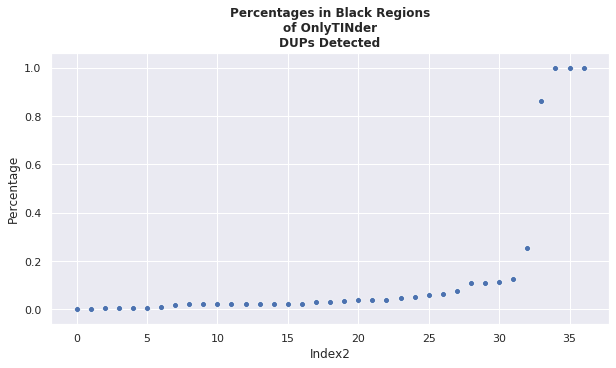

In [158]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTINder\nDUPs Detected',weight='bold')
plt.show()

In [159]:
YELLOW_TINDER_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(YELLOW_TINDER_BLACK))
YELLOW_TINDER_BLACK

4


['14_106382716_14_106552283_IID_H158605_T01_01_WG01',
 '2_89161441_2_89214587_IID_H158608_T01_01_WG01',
 '14_106327314_14_106330074_IID_H158620_T01_01_WG01',
 '9_38327562_9_75852185_IID_H158638_T01_01_WG01']

- Non Detected:

In [160]:
print(len(I_focal_blacklist_70_nondetected['keys'].unique()))

dict_keys={}
for index,row in I_focal_blacklist_70_nondetected.iterrows():
    key=row['keys']
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        dict_keys[key]=row['Percentage']
    else:
        dict_keys[key]=dict_keys[key]+row['Percentage']

samples=[]
percent=[]
for keys in dict_keys:
    samples.append(keys)
    percent.append(dict_keys[keys])
    print(keys,'\t',dict_keys[keys])

scatter_plot=pd.DataFrame()
scatter_plot['Sample']=samples
scatter_plot['Percentage']=percent

26
1_226089727_1_229530677_IID_H158614_T01_01_WG01 	 0.030513956901437107
11_49219228_11_49221071_IID_H158616_T01_01_WG01 	 1.0
17_25538297_17_33465423_IID_H158617_T01_01_WG01 	 0.05487423815390344
5_19606200_5_89451660_IID_H158618_T01_01_WG01 	 0.10201061028161315
6_31377393_6_31472068_IID_H158619_T01_01_WG01 	 0.3443992606284658
1_16875148_1_145382613_IID_H158627_T01_01_WG01 	 0.2119707131410615
16_33418847_16_33520581_IID_H158627_T01_01_WG01 	 1.0
1_145251479_1_147164213_IID_H158630_T01_01_WG01 	 0.4749850214405139
16_53545465_16_75842461_IID_H158630_T01_01_WG01 	 0.03901843997281069
1_16875156_1_145382616_IID_H158636_T01_01_WG01 	 0.2119706591352751
8_83255520_8_101931142_IID_H158636_T01_01_WG01 	 0.01686680100935862
1_237182720_1_248070505_IID_H158638_T01_01_WG01 	 0.04959640551315075
5_59387596_5_79680023_IID_H158638_T01_01_WG01 	 0.09757319811967292
12_9553663_12_31407917_IID_H158639_T01_01_WG01 	 0.02065190603165864
12_69547381_12_118732981_IID_H158639_T01_01_WG01 	 0.001829742

In [161]:
scatter_plot.head()

,Sample,Percentage
0,1_226089727_1_229530677_IID_H158614_T01_01_WG01,0.030514
1,11_49219228_11_49221071_IID_H158616_T01_01_WG01,1.000000
2,17_25538297_17_33465423_IID_H158617_T01_01_WG01,0.054874
3,5_19606200_5_89451660_IID_H158618_T01_01_WG01,0.102011
4,6_31377393_6_31472068_IID_H158619_T01_01_WG01,0.344399


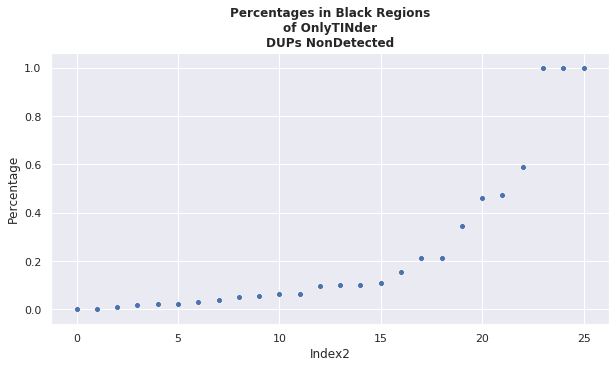

In [162]:
plt.figure()
scatter_black=scatter_plot.sort_values(by=['Percentage']).reset_index()
scatter_black=scatter_black[['Percentage']]
scatter_black.index.name = 'index'
scatter_black['Index2']=scatter_black.index
scatter_black.head()
ax = sns.scatterplot(x="Index2", y="Percentage", data=scatter_black)
plt.title('Percentages in Black Regions\nof OnlyTINder\nDUPs NonDetected',weight='bold')
plt.show()

In [163]:
RED_TINDER_BLACK=list(scatter_plot[scatter_plot['Percentage']>0.7]['Sample'])
print(len(RED_TINDER_BLACK))
RED_TINDER_BLACK

3


['11_49219228_11_49221071_IID_H158616_T01_01_WG01',
 '16_33418847_16_33520581_IID_H158627_T01_01_WG01',
 '8_12432835_8_12485729_IID_H158668_T01_01_WG01']

In [164]:
TINDER_noBLACK_DUPs=pd.DataFrame()
tinder_keys=YELLOW_TINDER_BLACK+RED_TINDER_BLACK

for index,row in tinder_full_set_DUP_DETECT.iterrows():
    if row['keys'] not in tinder_keys:
        TINDER_noBLACK_DUPs=TINDER_noBLACK_DUPs.append(row)

print(TINDER_noBLACK_DUPs.shape)
TINDER_noBLACK_DUPs.head()

(199, 14)


,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
2,Non Detected,-1,-1.000000,10,1990.0,120303654.0,120305644.0,DUP,IID_H158604_T01_01_WG01,30.0,0.0,62.0,10_120303654_10_120305644_IID_H158604_T01_01_WG01,36.0
30,Non Detected,9.7999996796716e-05,0.000449,8,1813.0,83891490.0,83893303.0,DUP,IID_H158604_T01_01_WG01,26.0,18.0,52.0,8_83891490_8_83893303_IID_H158604_T01_01_WG01,0.0
42,Non Detected,-1,-1.000000,13,5005.0,58011247.0,58016252.0,DUP,IID_H158605_T01_01_WG01,40.0,26.0,64.0,13_58011247_13_58016252_IID_H158605_T01_01_WG01,41.0
68,Non Detected,0.000977999996393919,0.002369,8,2560.0,101179292.0,101181852.0,DUP,IID_H158605_T01_01_WG01,41.0,20.0,49.0,8_101179292_8_101181852_IID_H158605_T01_01_WG01,48.0
80,Detected,-1,-1.000000,11,6792.0,77932829.0,77939621.0,DUP,IID_H158606_T01_01_WG01,21.0,7.0,29.0,11_77932829_11_77939621_IID_H158606_T01_01_WG01,25.0


In [165]:
#Joe
TINDER_noBLACK_DUPs.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_DUP_DETECT_noBLACK.tsv',sep='\t')

In [ ]:
venn2(subsets = (142,20,57), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND, SUPP\nBlackRegions',fontsize=20)
plt.show()

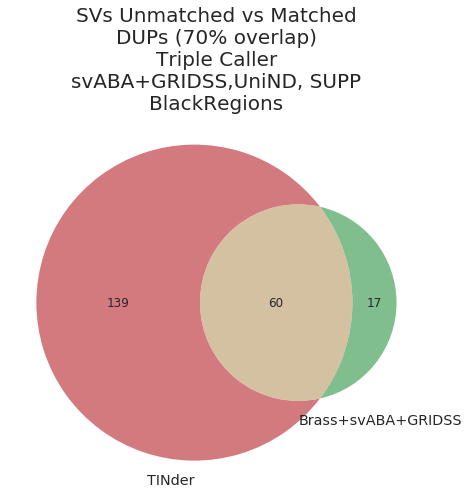

In [573]:
venn2(subsets = (139,17,60), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND, SUPP\nBlackRegions',fontsize=20)
plt.show()

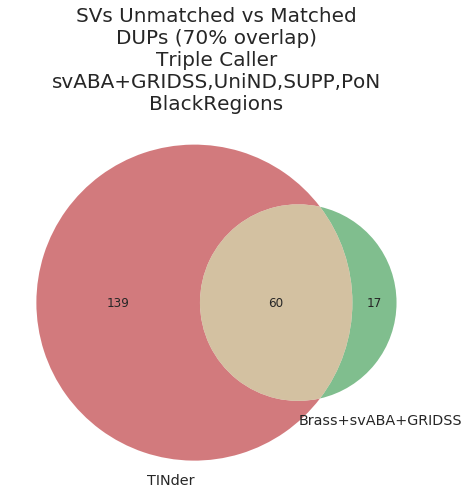

In [210]:
venn2(subsets = (139,17,60), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nDUPs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND,SUPP,PoN\nBlackRegions',fontsize=20)
plt.show()

# - Caller Combinations:

In [211]:
#tinder_full_set_DUP_DETECT
#triple_full_info_dup_DUP_DETECT

In [212]:
print(tinder_full_set_DUP_DETECT.shape)
tinder_full_set_DUP_DETECT.head(1)

(206, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
2,10,120303654,120305644,1990,DUP,IID_H158604_T01_01_WG01,-1,-1.0,30,62,36,10_120303654_10_120305644_IID_H158604_T01_01_WG01,Non Detected


In [213]:
print(triple_full_info_dup_DUP_DETECT.shape)
triple_full_info_dup_DUP_DETECT.head(1)

(86, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
6,12,95588243,95589486,12_95588243_12_95589486_DUP_-+,DUP,IID_H158635_T01_01_WG01,6,0,8,12_95588243_95589486_IID_H158635_T01_01_WG01,Non Detected


In [214]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [215]:
tinder_full_set_DUP_DETECT['Callers']=tinder_full_set_DUP_DETECT.apply(lambda row: label_caller(row), axis=1)
triple_full_info_dup_DUP_DETECT['Callers']=triple_full_info_dup_DUP_DETECT.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [216]:
countsTIN=tinder_full_set_DUP_DETECT.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       34
             Brass,GRIDSS,SvABA                83
             Brass,GRIDSS                      25
Detected     Brass,SvABA                       10
             Brass,GRIDSS,SvABA                49
             Brass,GRIDSS                       5

- TRIPLE:

In [217]:
countsTRI=triple_full_info_dup_DUP_DETECT.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                       3
             Brass,SvABA                        6
             Brass,GRIDSS,SvABA                10
             Brass,GRIDSS                       3
Detected     GRIDSS,SvABA                       7
             Brass,SvABA                        8
             Brass,GRIDSS,SvABA                46
             Brass,GRIDSS                       3

In [218]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                      5                3
             Brass,GRIDSS,SvABA               49               46
             Brass,SvABA                      10                8
             GRIDSS,SvABA                    NaN                7
Non Detected Brass,GRIDSS                     25                3
             Brass,GRIDSS,SvABA               83               10
             Brass,SvABA                      34                6
             GRIDSS,SvABA                    NaN                3

In [219]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


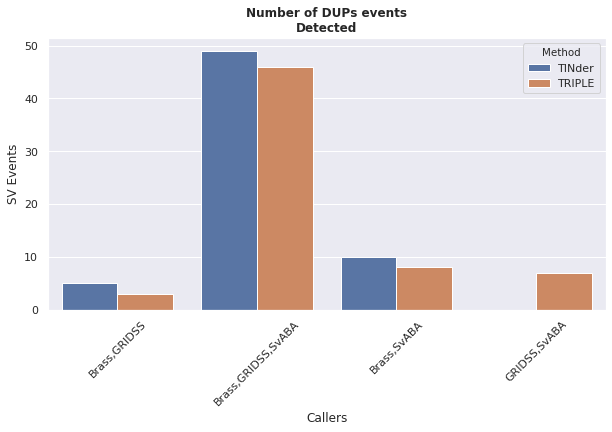

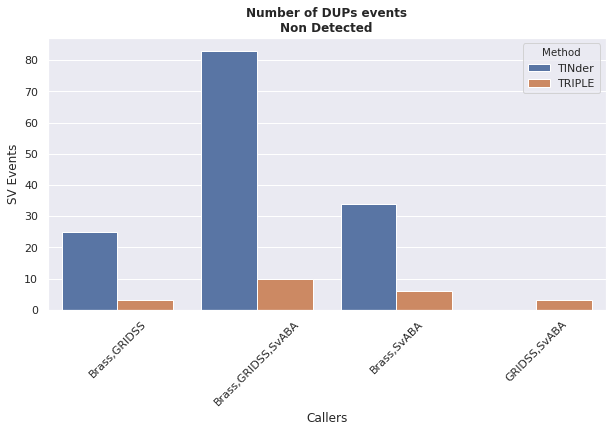

In [220]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DUPs events\nDetected',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DUPs events\nNon Detected',weight='bold')
plt.xticks(rotation=45)
plt.show()

# - Caller Combinations:

In [221]:
#TRIPLE_noBLACK_DUPs
#TINDER_noBLACK_DUPs

In [222]:
print(TINDER_noBLACK_DUPs.shape)
TINDER_noBLACK_DUPs.head(1)

(199, 13)


,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
2,Non Detected,-1,-1.0,10,1990.0,120303654.0,120305644.0,DUP,IID_H158604_T01_01_WG01,30.0,62.0,10_120303654_10_120305644_IID_H158604_T01_01_WG01,36.0


In [223]:
print(TRIPLE_noBLACK_DUPs.shape)
TRIPLE_noBLACK_DUPs.head(1)

(77, 11)


,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,gridss_VF,keys,svaba_AD
6,Non Detected,12_95588243_12_95589486_DUP_-+,12,95589486.0,95588243.0,DUP,IID_H158635_T01_01_WG01,6.0,0.0,12_95588243_95589486_IID_H158635_T01_01_WG01,8.0


In [224]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [225]:
TINDER_noBLACK_DUPs['Callers']=TINDER_noBLACK_DUPs.apply(lambda row: label_caller(row), axis=1)
TRIPLE_noBLACK_DUPs['Callers']=TRIPLE_noBLACK_DUPs.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [226]:
countsTIN=TINDER_noBLACK_DUPs.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       32
             Brass,GRIDSS,SvABA                83
             Brass,GRIDSS                      24
Detected     Brass,SvABA                       10
             Brass,GRIDSS,SvABA                45
             Brass,GRIDSS                       5

- TRIPLE:

In [227]:
countsTRI=TRIPLE_noBLACK_DUPs.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                       3
             Brass,SvABA                        3
             Brass,GRIDSS,SvABA                 8
             Brass,GRIDSS                       3
Detected     GRIDSS,SvABA                       7
             Brass,SvABA                        8
             Brass,GRIDSS,SvABA                42
             Brass,GRIDSS                       3

In [228]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                      5                3
             Brass,GRIDSS,SvABA               45               42
             Brass,SvABA                      10                8
             GRIDSS,SvABA                    NaN                7
Non Detected Brass,GRIDSS                     24                3
             Brass,GRIDSS,SvABA               83                8
             Brass,SvABA                      32                3
             GRIDSS,SvABA                    NaN                3

In [229]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


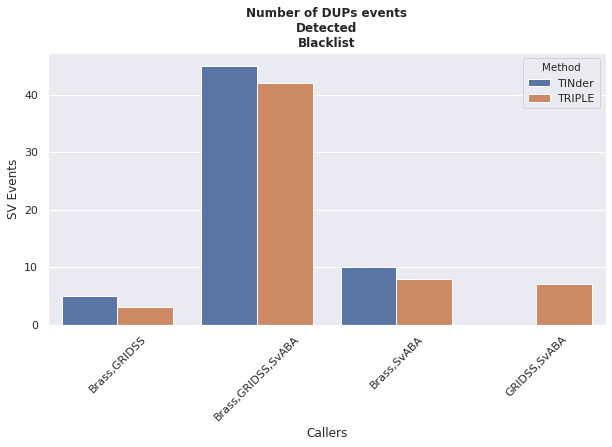

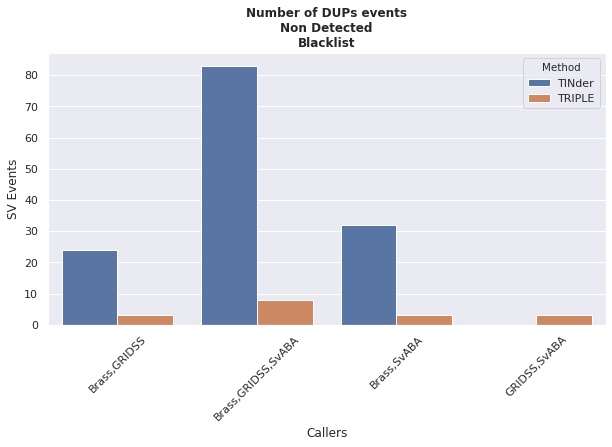

In [230]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DUPs events\nDetected\nBlacklist',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of DUPs events\nNon Detected\nBlacklist',weight='bold')
plt.xticks(rotation=45)
plt.show()

### C) Intersection Inversion:

In [166]:
tinder_full_set_INV=tinder_full_set_keys[tinder_full_set_keys['SV type']=='INV']
tinder_full_set_INV_2intersect=tinder_full_set_INV[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','keys']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_INV_2intersect['SV chrom']=tinder_full_set_INV_2intersect['SV chrom'].map(str)
tinder_full_set_INV_2intersect['SV length']=tinder_full_set_INV_2intersect['SV length'].map(int)
tinder_full_set_INV_2intersect['GD_AF']=tinder_full_set_INV_2intersect['GD_AF'].map(str)
tinder_full_set_INV_2intersect['GD_POPMAX_AF']=tinder_full_set_INV_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_INV_2intersect['brass_PS']=tinder_full_set_INV_2intersect['brass_PS'].map(str)
tinder_full_set_INV_2intersect['brass_RC']=tinder_full_set_INV_2intersect['brass_RC'].map(str)
tinder_full_set_INV_2intersect['gridss_VF']=tinder_full_set_INV_2intersect['gridss_VF'].map(str)
tinder_full_set_INV_2intersect['svaba_AD']=tinder_full_set_INV_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_INV_2intersect.shape)
tinder_full_set_INV_2intersect.head()

(313, 13)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,0,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01
37,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,16,15,0,39,11_4123049_11_4248897_IID_H158605_T01_01_WG01
45,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1,-1.0,23,0,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01
47,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1,-1.0,35,20,54,51,14_106385364_14_106552284_IID_H158605_T01_01_WG01
55,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,0,57,0,3_50170156_3_50172449_IID_H158605_T01_01_WG01


In [167]:
triple_full_info_dup.head(2)

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,110895557,110907163,12_110895557_12_110907163_DEL_+-,DEL,IID_H158612_T01_01_WG01,8,4,0,8
3,13,44716505,45010463,13_44716505_13_45010463_DEL_+-,DEL,IID_H158612_T01_01_WG01,4,7,14,9


In [168]:
triple_full_info_dup_INV=triple_full_info_dup[triple_full_info_dup['SV type']=='INV']
print(triple_full_info_dup_INV.shape)
triple_full_info_dup_INV.head()

(188, 10)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,0,36,0
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,13,48,53
16,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,0,33,23
22,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,0,28,26
319,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,19,41,29


In [169]:
triple_full_info_dup_INV_2intersect=triple_full_info_dup_INV.copy()
triple_full_info_dup_INV_2intersect['keys']=triple_full_info_dup_INV_2intersect['ID']+'_'+triple_full_info_dup_INV_2intersect['Sample']

triple_full_info_dup_INV_2intersect['to_index']=triple_full_info_dup_INV_2intersect['keys']
triple_full_info_dup_INV_2intersect.index = triple_full_info_dup_INV_2intersect['to_index']
triple_full_info_dup_INV_2intersect=triple_full_info_dup_INV_2intersect[['SV chrom','SV start','SV end','ID','SV type','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_full_info_dup_INV_2intersect.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
to_index,,,,,,,,,,
13_89110965_13_89112603_INV_--_IID_H158635_T01_01_WG01,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,0,36,0
7_142190647_7_142494053_INV_--_IID_H158635_T01_01_WG01,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,13,48,53
2_89160453_2_90249423_INV_++_IID_H158609_T01_01_WG01,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,0,33,23
2_11317205_2_49115205_INV_--_IID_H158625_T01_01_WG01,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,0,28,26
2_34040568_2_57113494_INV_++_IID_H158625_T01_01_WG01,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,19,41,29


In [170]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_full_set_INV_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_full_info_dup_INV_2intersect.values.tolist())

I_inversions = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','size','SVtype','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','key','chr_band', 'start_band', 'end_band','ID','SV type','Sample.1','brass_PS.tr','brass_RC.tr','gridss_VF.tr','svaba_AD.tr'])
#I = I[I.chr_band!="X"]
print(I_inversions.shape)
I_inversions.head()

(1406, 23)


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr
0,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,0,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106328720,106330842,14_106328720_14_106330842_INV_++,INV,IID_H158607_T01_01_WG01,43,31,62,0
1,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,0,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329450,106330073,14_106329450_14_106330073_INV_++,INV,IID_H158664_T01_01_WG01,23,0,37,25
2,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,0,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329450,106385361,14_106329450_14_106385361_INV_++,INV,IID_H158605_T01_01_WG01,23,15,49,24
3,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,0,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329471,106346912,14_106329471_14_106346912_INV_--,INV,IID_H158664_T01_01_WG01,14,0,24,24
4,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,23,0,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329471,106368530,14_106329471_14_106368530_INV_--,INV,IID_H158639_T01_01_WG01,25,21,62,60


In [171]:
I_inversions_PATIENT=I_inversions[I_inversions['Sample']==I_inversions['Sample.1']]
I_inversions_PATIENT['keys']=I_inversions_PATIENT['chr_seg'].map(str)+'_'+I_inversions_PATIENT['start_seg'].map(str)+'_'+I_inversions_PATIENT['end_seg'].map(str)+'_'+I_inversions_PATIENT['Sample'].map(str)
print(I_inversions_PATIENT.shape)
print(len(I_inversions_PATIENT['keys'].unique()))
I_inversions_PATIENT.head()

(658, 24)
156


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,size,SVtype,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,key,chr_band,start_band,end_band,ID,SV type,Sample.1,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr,keys
2,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.000000,-1.000000,23,0,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14,106329450,106385361,14_106329450_14_106385361_INV_++,INV,IID_H158605_T01_01_WG01,23,15,49,24,14_106329450_106385361_IID_H158605_T01_01_WG01
12,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1.000000,-1.000000,35,20,54,51,14_106385364_14_106552284_IID_H158605_T01_01_WG01,14,106385364,106552284,14_106385364_14_106552284_INV_--,INV,IID_H158605_T01_01_WG01,35,20,54,51,14_106385364_106552284_IID_H158605_T01_01_WG01
21,14,106328720,106330842,2122,INV,IID_H158607_T01_01_WG01,-1.000000,-1.000000,43,31,62,0,14_106328720_14_106330842_IID_H158607_T01_01_WG01,14,106328720,106330842,14_106328720_14_106330842_INV_++,INV,IID_H158607_T01_01_WG01,43,31,62,0,14_106328720_106330842_IID_H158607_T01_01_WG01
28,2,89197302,89214600,17298,INV,IID_H158608_T01_01_WG01,-1.000000,-1.000000,37,28,62,58,2_89197302_2_89214600_IID_H158608_T01_01_WG01,2,89197302,89214600,2_89197302_2_89214600_INV_--,INV,IID_H158608_T01_01_WG01,37,18,62,58,2_89197302_89214600_IID_H158608_T01_01_WG01
42,12,49472166,83299587,33827421,INV,IID_H158611_T01_01_WG01,0.000093,0.000132,10,9,23,22,12_49472166_12_83299587_IID_H158611_T01_01_WG01,12,49472166,83299587,12_49472166_12_83299587_INV_--,INV,IID_H158611_T01_01_WG01,0,0,23,22,12_49472166_83299587_IID_H158611_T01_01_WG01


- Overlapping of deletions around 70%:

In [172]:
I_inversions_PATIENT['start_seg']=I_inversions_PATIENT['start_seg'].astype(int)
I_inversions_PATIENT['end_seg']=I_inversions_PATIENT['end_seg'].astype(int)
I_inversions_PATIENT['start_band']=I_inversions_PATIENT['start_band'].astype(int)
I_inversions_PATIENT['end_band']=I_inversions_PATIENT['end_band'].astype(int) 

I_inversions_70_PATIENT=pd.DataFrame()
for index,row in I_inversions_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_inversions_70_PATIENT=I_inversions_70_PATIENT.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_inversions_70_PATIENT=I_inversions_70_PATIENT.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_inversions_70_PATIENT=I_inversions_70_PATIENT.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_inversions_70_PATIENT=I_inversions_70_PATIENT.append(row)
            continue
   

print(I_inversions_70_PATIENT.shape)
print(len(I_inversions_70_PATIENT['keys'].unique()))
I_inversions_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(373, 24)
154


,GD_AF,GD_POPMAX_AF,ID,SV type,SVtype,Sample,Sample.1,brass_PS,brass_PS.tr,brass_RC,brass_RC.tr,chr_band,chr_seg,end_band,end_seg,gridss_VF,gridss_VF.tr,key,keys,size,start_band,start_seg,svaba_AD,svaba_AD.tr
2,-1.000000,-1.000000,14_106329450_14_106385361_INV_++,INV,INV,IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,23.0,23.0,0.0,15.0,14,14,106385361.0,106385361.0,49.0,49.0,14_106329450_14_106385361_IID_H158605_T01_01_WG01,14_106329450_106385361_IID_H158605_T01_01_WG01,55911.0,106329450.0,106329450.0,24.0,24.0
12,-1.000000,-1.000000,14_106385364_14_106552284_INV_--,INV,INV,IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,35.0,35.0,20.0,20.0,14,14,106552284.0,106552284.0,54.0,54.0,14_106385364_14_106552284_IID_H158605_T01_01_WG01,14_106385364_106552284_IID_H158605_T01_01_WG01,166920.0,106385364.0,106385364.0,51.0,51.0
21,-1.000000,-1.000000,14_106328720_14_106330842_INV_++,INV,INV,IID_H158607_T01_01_WG01,IID_H158607_T01_01_WG01,43.0,43.0,31.0,31.0,14,14,106330842.0,106330842.0,62.0,62.0,14_106328720_14_106330842_IID_H158607_T01_01_WG01,14_106328720_106330842_IID_H158607_T01_01_WG01,2122.0,106328720.0,106328720.0,0.0,0.0
28,-1.000000,-1.000000,2_89197302_2_89214600_INV_--,INV,INV,IID_H158608_T01_01_WG01,IID_H158608_T01_01_WG01,37.0,37.0,28.0,18.0,2,2,89214600.0,89214600.0,62.0,62.0,2_89197302_2_89214600_IID_H158608_T01_01_WG01,2_89197302_89214600_IID_H158608_T01_01_WG01,17298.0,89197302.0,89197302.0,58.0,58.0
42,0.000093,0.000132,12_49472166_12_83299587_INV_--,INV,INV,IID_H158611_T01_01_WG01,IID_H158611_T01_01_WG01,10.0,0.0,9.0,0.0,12,12,83299587.0,83299587.0,23.0,23.0,12_49472166_12_83299587_IID_H158611_T01_01_WG01,12_49472166_83299587_IID_H158611_T01_01_WG01,33827421.0,49472166.0,49472166.0,22.0,22.0


- Detected/NonDetected:

In [173]:
tinder_full_set_INV.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
9,14,49407635,14,49461451,53816,INV,NaN,-1,-1.0,IID_H158604_T01_01_WG01,21,0,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01


In [174]:
tinder_full_set_INV_DETECT=tinder_full_set_INV[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD','keys']]
tinder_full_set_INV_DETECT.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,0,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01
37,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1,-1.0,16,15,0,39,11_4123049_11_4248897_IID_H158605_T01_01_WG01
45,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1,-1.0,23,0,49,24,14_106329450_14_106385361_IID_H158605_T01_01_WG01
47,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1,-1.0,35,20,54,51,14_106385364_14_106552284_IID_H158605_T01_01_WG01
55,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,0,57,0,3_50170156_3_50172449_IID_H158605_T01_01_WG01


In [175]:
detection=[]
for index,row in tinder_full_set_INV_DETECT.iterrows():
    if (str(row['keys']) in I_inversions_70_PATIENT['key'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_full_set_INV_DETECT['Detection']=detection
tinder_full_set_INV_DETECT[tinder_full_set_INV_DETECT['Detection']=='Non Detected'].head()

313


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,0,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01,Non Detected
37,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1,-1.0,16,15,0,39,11_4123049_11_4248897_IID_H158605_T01_01_WG01,Non Detected
55,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,0,57,0,3_50170156_3_50172449_IID_H158605_T01_01_WG01,Non Detected
56,3,50170169,50171891,1722,INV,IID_H158605_T01_01_WG01,-1,-1.0,46,0,63,63,3_50170169_3_50171891_IID_H158605_T01_01_WG01,Non Detected
69,9,12014638,12200280,185642,INV,IID_H158605_T01_01_WG01,-1,-1.0,47,27,68,65,9_12014638_9_12200280_IID_H158605_T01_01_WG01,Non Detected


In [176]:
print(tinder_full_set_DUP_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_INV_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(206, 14)
154 159


In [177]:
#Joe
tinder_full_set_INV_DETECT.to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_INV_DETECT.tsv','\t')

### 1.2) Precision: TripleCaller calls in TINder: yellow and green areas

In [178]:
tinder_full_set.head(1)

,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
2,10,120303654,10,120305644,1990,DUP,NaN,-1,-1.0,IID_H158604_T01_01_WG01,30,0,62,36


In [179]:
tinder_full_set_INV=tinder_full_set[tinder_full_set['SV type']=='INV']
tinder_full_set_INV_2intersect=tinder_full_set_INV[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_AF','GD_POPMAX_AF','brass_PS','brass_RC','gridss_VF','svaba_AD']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_INV_2intersect['SV length']=tinder_full_set_INV_2intersect['SV length'].map(int)
tinder_full_set_INV_2intersect['GD_AF']=tinder_full_set_INV_2intersect['GD_AF'].map(str)
tinder_full_set_INV_2intersect['GD_POPMAX_AF']=tinder_full_set_INV_2intersect['GD_POPMAX_AF'].map(str)
tinder_full_set_INV_2intersect['brass_PS']=tinder_full_set_INV_2intersect['brass_PS'].map(str)
tinder_full_set_INV_2intersect['brass_RC']=tinder_full_set_INV_2intersect['brass_RC'].map(str)
tinder_full_set_INV_2intersect['gridss_VF']=tinder_full_set_INV_2intersect['gridss_VF'].map(str)
tinder_full_set_INV_2intersect['svaba_AD']=tinder_full_set_INV_2intersect['svaba_AD'].map(str)


#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_INV_2intersect.shape)
tinder_full_set_INV_2intersect.head()

(313, 12)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is tryi

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,0,40,40
37,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,16,15,0,39
45,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1,-1.0,23,0,49,24
47,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1,-1.0,35,20,54,51
55,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,0,57,0


In [180]:
tinder_full_set_INV_2intersect
#keys
keys=[]
for index,row in tinder_full_set_INV_2intersect.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV start2'])+'_'+row['Sample'])
tinder_full_set_INV_2intersect['keys']=keys
tinder_full_set_INV_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,0,40,40,14_49407635_49461451_IID_H158604_T01_01_WG01
37,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1.0,-1.0,16,15,0,39,11_4123049_4248897_IID_H158605_T01_01_WG01
45,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1,-1.0,23,0,49,24,14_106329450_106385361_IID_H158605_T01_01_WG01
47,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1,-1.0,35,20,54,51,14_106385364_106552284_IID_H158605_T01_01_WG01
55,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1,-1.0,43,0,57,0,3_50170156_50172449_IID_H158605_T01_01_WG01


In [181]:
tinder_full_set_INV_2intersect2=tinder_full_set_INV_2intersect.copy()
tinder_full_set_INV_2intersect2['to_index']=tinder_full_set_INV_2intersect['keys']
tinder_full_set_INV_2intersect2.index = tinder_full_set_INV_2intersect2['to_index']
tinder_full_set_INV_2intersect2=tinder_full_set_INV_2intersect2[['SV chrom','SV start','SV start2','SV length','SV type','Sample','GD_POPMAX_AF','brass_PS','gridss_VF','svaba_AD','keys']]
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_full_set_INV_2intersect2.head()

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys
to_index,,,,,,,,,,,
14_49407635_49461451_IID_H158604_T01_01_WG01,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1.0,21,40,40,14_49407635_49461451_IID_H158604_T01_01_WG01
11_4123049_4248897_IID_H158605_T01_01_WG01,11,4123049,4248897,125848,INV,IID_H158605_T01_01_WG01,-1.0,16,0,39,11_4123049_4248897_IID_H158605_T01_01_WG01
14_106329450_106385361_IID_H158605_T01_01_WG01,14,106329450,106385361,55911,INV,IID_H158605_T01_01_WG01,-1.0,23,49,24,14_106329450_106385361_IID_H158605_T01_01_WG01
14_106385364_106552284_IID_H158605_T01_01_WG01,14,106385364,106552284,166920,INV,IID_H158605_T01_01_WG01,-1.0,35,54,51,14_106385364_106552284_IID_H158605_T01_01_WG01
3_50170156_50172449_IID_H158605_T01_01_WG01,3,50170156,50172449,2293,INV,IID_H158605_T01_01_WG01,-1.0,43,57,0,3_50170156_50172449_IID_H158605_T01_01_WG01


In [182]:
print(triple_full_info_dup_INV.shape)
triple_full_info_dup_INV.head(2)

(188, 10)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,0,36,0
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,13,48,53


In [183]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_full_info_dup_INV.values.tolist())
list_bed_cytobands=BedTool(tinder_full_set_INV_2intersect2.values.tolist())

I_inversions_TC = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg', 'end_seg','ID','SV type','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD','chr_band', 'start_band','end_band','size','SVtype','Sample.1','GD_POPMAX_AF','brass_PS.tr','brass_RC.tr','gridss_VF.tr','svaba_AD.tr','keys'])
#I = I[I.chr_band!="X"]
print(I_inversions_TC.shape)
I_inversions_TC.head()

(1406, 22)


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr,keys
0,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,0,36,0,13,38261788,98014550,59752762,INV,IID_H158646_T01_01_WG01,-1.0,33,51,51,13_38261788_98014550_IID_H158646_T01_01_WG01,NaN
1,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,0,36,0,13,45063390,97452941,52389551,INV,IID_H158663_T01_01_WG01,-1.0,10,13,10,13_45063390_97452941_IID_H158663_T01_01_WG01,NaN
2,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,13,48,53,7,142190647,142494053,303406,INV,IID_H158635_T01_01_WG01,-1.0,38,48,53,7_142190647_142494053_IID_H158635_T01_01_WG01,NaN
3,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,13,48,53,7,142247111,142495143,248032,INV,IID_H158663_T01_01_WG01,-1.0,15,22,17,7_142247111_142495143_IID_H158663_T01_01_WG01,NaN
4,2,89160453,90249423,2_89160453_2_90249423_INV_++,INV,IID_H158609_T01_01_WG01,0,0,33,23,2,89475816,89478555,2739,INV,IID_H158642_T01_01_WG01,-1.0,24,0,42,2_89475816_89478555_IID_H158642_T01_01_WG01,NaN


In [184]:
I_inversions_TC_PATIENT=I_inversions_TC[I_inversions_TC['Sample']==I_inversions_TC['Sample.1']]
I_inversions_TC_PATIENT['keys']=I_inversions_TC_PATIENT['chr_seg'].map(str)+'_'+I_inversions_TC_PATIENT['start_seg'].map(str)+'_'+I_inversions_TC_PATIENT['end_seg'].map(str)+'_'+I_inversions_TC_PATIENT['Sample'].map(str)
print(I_inversions_TC_PATIENT.shape)
print(len(I_inversions_TC_PATIENT['keys'].unique()))
I_inversions_TC_PATIENT.head()

(658, 22)
151


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,chr_seg,start_seg,end_seg,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,chr_band,start_band,end_band,size,SVtype,Sample.1,GD_POPMAX_AF,brass_PS.tr,brass_RC.tr,gridss_VF.tr,svaba_AD.tr,keys
2,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,13,48,53,7,142190647,142494053,303406,INV,IID_H158635_T01_01_WG01,-1.000000,38,48,53,7_142190647_142494053_IID_H158635_T01_01_WG01,7_142190647_142494053_IID_H158635_T01_01_WG01
25,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,0,28,26,2,11317205,49115205,37798000,INV,IID_H158625_T01_01_WG01,-1.000000,17,28,26,2_11317205_49115205_IID_H158625_T01_01_WG01,2_11317205_49115205_IID_H158625_T01_01_WG01
26,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,0,28,26,2,34040566,57113494,23072928,INV,IID_H158625_T01_01_WG01,0.000105,30,41,30,2_34040566_57113494_IID_H158625_T01_01_WG01,2_11317205_49115205_IID_H158625_T01_01_WG01
29,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,19,41,29,2,53583899,57312212,3728313,INV,IID_H158625_T01_01_WG01,-1.000000,61,73,73,2_53583899_57312212_IID_H158625_T01_01_WG01,2_34040568_57113494_IID_H158625_T01_01_WG01
30,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,19,41,29,2,11317205,49115205,37798000,INV,IID_H158625_T01_01_WG01,-1.000000,17,28,26,2_11317205_49115205_IID_H158625_T01_01_WG01,2_34040568_57113494_IID_H158625_T01_01_WG01


- Overlapping of deletions around 70%:

In [185]:
I_inversions_TC_PATIENT['start_seg']=I_inversions_TC_PATIENT['start_seg'].astype(int)
I_inversions_TC_PATIENT['end_seg']=I_inversions_TC_PATIENT['end_seg'].astype(int)
I_inversions_TC_PATIENT['start_band']=I_inversions_TC_PATIENT['start_band'].astype(int)
I_inversions_TC_PATIENT['end_band']=I_inversions_TC_PATIENT['end_band'].astype(int) 

I_inversions_TC_70_PATIENT=pd.DataFrame()
for index,row in I_inversions_TC_PATIENT.iterrows():
    del_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the arm and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_inversions_TC_70_PATIENT=I_inversions_TC_70_PATIENT.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(del_size*0.7<segment_size):
            I_inversions_TC_70_PATIENT=I_inversions_TC_70_PATIENT.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(del_size*0.7<segment_size):
            I_inversions_TC_70_PATIENT=I_inversions_TC_70_PATIENT.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the arm and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_band']-row['start_band']
        if((del_size*0.7)<segment_size):
            I_inversions_TC_70_PATIENT=I_inversions_TC_70_PATIENT.append(row)
            continue
   

I_inversions_TC_70_PATIENT=pd.DataFrame(I_inversions_TC_70_PATIENT)
print(I_inversions_TC_70_PATIENT.shape)
print(len(I_inversions_TC_70_PATIENT['keys'].unique()))
I_inversions_TC_70_PATIENT.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py

(380, 22)
150


,GD_POPMAX_AF,ID,SV type,SVtype,Sample,Sample.1,brass_PS,brass_PS.tr,brass_RC,brass_RC.tr,chr_band,chr_seg,end_band,end_seg,gridss_VF,gridss_VF.tr,keys,size,start_band,start_seg,svaba_AD,svaba_AD.tr
2,-1.000000,7_142190647_7_142494053_INV_--,INV,INV,IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,38.0,38.0,13.0,48.0,7,7,142494053.0,142494053.0,48.0,53.0,7_142190647_142494053_IID_H158635_T01_01_WG01,303406.0,142190647.0,142190647.0,53.0,7_142190647_142494053_IID_H158635_T01_01_WG01
25,-1.000000,2_11317205_2_49115205_INV_--,INV,INV,IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,0.0,17.0,0.0,28.0,2,2,49115205.0,49115205.0,28.0,26.0,2_11317205_49115205_IID_H158625_T01_01_WG01,37798000.0,11317205.0,11317205.0,26.0,2_11317205_49115205_IID_H158625_T01_01_WG01
31,0.000105,2_34040568_2_57113494_INV_++,INV,INV,IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,30.0,30.0,19.0,41.0,2,2,57113494.0,57113494.0,41.0,30.0,2_34040568_57113494_IID_H158625_T01_01_WG01,23072928.0,34040566.0,34040568.0,29.0,2_34040566_57113494_IID_H158625_T01_01_WG01
36,-1.000000,2_53583898_2_57312212_INV_--,INV,INV,IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,61.0,61.0,20.0,73.0,2,2,57312212.0,57312212.0,73.0,73.0,2_53583898_57312212_IID_H158625_T01_01_WG01,3728313.0,53583899.0,53583898.0,73.0,2_53583899_57312212_IID_H158625_T01_01_WG01
37,0.000105,2_53583898_2_57312212_INV_--,INV,INV,IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,61.0,30.0,20.0,41.0,2,2,57113494.0,57312212.0,73.0,30.0,2_53583898_57312212_IID_H158625_T01_01_WG01,23072928.0,34040566.0,53583898.0,73.0,2_34040566_57113494_IID_H158625_T01_01_WG01


- Detected/NonDetected:

In [186]:
triple_full_info_dup_INV_DETECT=triple_full_info_dup_INV.copy()
keys=[]
for index,row in triple_full_info_dup_INV_DETECT.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV end'])+'_'+row['Sample'])
triple_full_info_dup_INV_DETECT['keys']=keys

In [187]:
detection=[]
for index,row in triple_full_info_dup_INV_DETECT.iterrows():
    if (str(row['keys']) in I_inversions_TC_70_PATIENT['keys'].values):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_full_info_dup_INV_DETECT['Detection']=detection
triple_full_info_dup_INV_DETECT[triple_full_info_dup_INV_DETECT['Detection']=='Detected'].head(10)

188


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,keys,Detection
53,7,142190647,142494053,7_142190647_7_142494053_INV_--,INV,IID_H158635_T01_01_WG01,38,13,48,53,7_142190647_142494053_IID_H158635_T01_01_WG01,Detected
22,2,11317205,49115205,2_11317205_2_49115205_INV_--,INV,IID_H158625_T01_01_WG01,0,0,28,26,2_11317205_49115205_IID_H158625_T01_01_WG01,Detected
319,2,34040568,57113494,2_34040568_2_57113494_INV_++,INV,IID_H158625_T01_01_WG01,30,19,41,29,2_34040568_57113494_IID_H158625_T01_01_WG01,Detected
482,2,53583898,57312212,2_53583898_2_57312212_INV_--,INV,IID_H158625_T01_01_WG01,61,20,73,73,2_53583898_57312212_IID_H158625_T01_01_WG01,Detected
616,9,21192521,31921207,9_21192521_9_31921207_INV_++,INV,IID_H158625_T01_01_WG01,61,23,77,63,9_21192521_31921207_IID_H158625_T01_01_WG01,Detected
663,9,32344735,32531333,9_32344735_9_32531333_INV_--,INV,IID_H158625_T01_01_WG01,77,27,92,88,9_32344735_32531333_IID_H158625_T01_01_WG01,Detected
17,2,89197302,89214600,2_89197302_2_89214600_INV_--,INV,IID_H158608_T01_01_WG01,37,18,62,58,2_89197302_89214600_IID_H158608_T01_01_WG01,Detected
0,14,54008865,60182797,14_54008865_14_60182797_INV_++,INV,IID_H158618_T01_01_WG01,39,31,69,45,14_54008865_60182797_IID_H158618_T01_01_WG01,Detected
96,5,151776042,163025157,5_151776042_5_163025157_INV_++,INV,IID_H158618_T01_01_WG01,46,0,57,0,5_151776042_163025157_IID_H158618_T01_01_WG01,Detected
169,5,151776042,163025158,5_151776042_5_163025158_INV_--,INV,IID_H158618_T01_01_WG01,59,0,83,81,5_151776042_163025158_IID_H158618_T01_01_WG01,Detected


In [188]:
print(triple_full_info_dup_INV_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_INV_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(188, 12)
150 38


In [189]:
print(tinder_full_set_INV_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_INV_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(313, 14)
154 159


In [190]:
#Joe
triple_full_info_dup_INV_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_INV_DETECT.tsv',sep='\t')

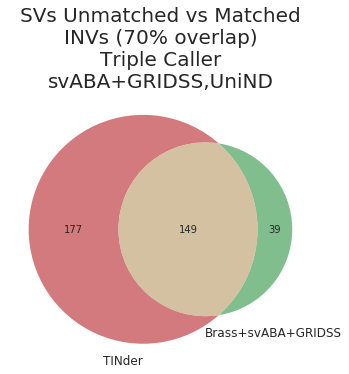

In [622]:
venn2(subsets = (177,39,149), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nINVs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND',fontsize=20)
plt.show()

In [ ]:
venn2(subsets = (177,39,149), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nINVs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND,SUPP',fontsize=20)
plt.show()

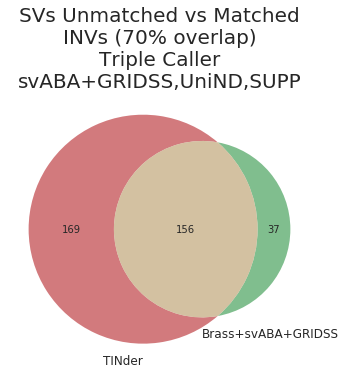

In [623]:
venn2(subsets = (169,37,156), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nINVs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND,SUPP',fontsize=20)
plt.show()

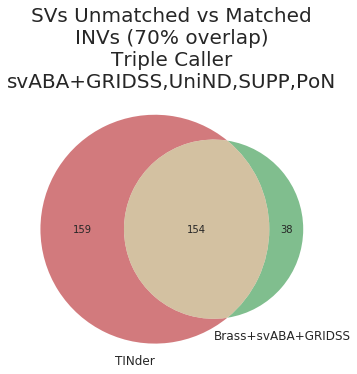

In [257]:
venn2(subsets = (159,38,154), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nINVs (70% overlap)\nTriple Caller\nsvABA+GRIDSS,UniND,SUPP,PoN',fontsize=20)
plt.show()

- green area:

In [258]:
triple_full_info_dup_INV_DETECT_check=triple_full_info_dup_INV_DETECT[~((triple_full_info_dup_INV_DETECT['SV chrom']=='X') | (triple_full_info_dup_INV_DETECT['SV chrom']=='Y'))]

triple_full_info_dup_INV_DETECT_check['SV start']=triple_full_info_dup_INV_DETECT_check['SV start'].map(int)
triple_full_info_dup_INV_DETECT_check['SV chrom']=triple_full_info_dup_INV_DETECT_check['SV chrom'].map(int)

triple_full_info_dup_INV_DETECT_check[triple_full_info_dup_INV_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index().head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,4,1,44059311,44059954,1_44059311_1_44059954_INV_--,INV,IID_H158650_T01_01_WG01,0,44,17,1_44059311_44059954_IID_H158650_T01_01_WG01,Non Detected
1,7,2,89132272,89185668,2_89132272_2_89185668_INV_++,INV,IID_H158621_T01_01_WG01,5,8,0,2_89132272_89185668_IID_H158621_T01_01_WG01,Non Detected
2,15,2,89132284,89185668,2_89132284_2_89185668_INV_++,INV,IID_H158608_T01_01_WG01,51,72,50,2_89132284_89185668_IID_H158608_T01_01_WG01,Non Detected
3,126,2,89159117,89185672,2_89159117_2_89185672_INV_++,INV,IID_H158649_T01_01_WG01,20,31,16,2_89159117_89185672_IID_H158649_T01_01_WG01,Non Detected
4,91,2,89159145,89185704,2_89159145_2_89185704_INV_++,INV,IID_H158618_T01_01_WG01,0,16,12,2_89159145_89185704_IID_H158618_T01_01_WG01,Non Detected


- red area:

In [259]:
tinder_full_set_INV_DETECT_check=tinder_full_set_INV_DETECT[~((tinder_full_set_INV_DETECT['SV chrom']=='X') | (tinder_full_set_INV_DETECT['SV chrom']=='Y'))]

tinder_full_set_INV_DETECT_check['SV start']=tinder_full_set_INV_DETECT_check['SV start'].map(int)
tinder_full_set_INV_DETECT_check['SV chrom']=tinder_full_set_INV_DETECT_check['SV chrom'].map(int)

tinder_full_set_INV_DETECT_check[tinder_full_set_INV_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index().head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
0,1143,1,46868353,46889690,21337,INV,IID_H158624_T01_01_WG01,4.7e-05,0.000449,63,75,62,1_46868353_1_46889690_IID_H158624_T01_01_WG01,Non Detected
1,1144,1,46868805,46899619,30814,INV,IID_H158624_T01_01_WG01,4.7e-05,0.000449,53,67,47,1_46868805_1_46899619_IID_H158624_T01_01_WG01,Non Detected
2,1710,1,114846413,114847249,836,INV,IID_H158634_T01_01_WG01,-1,-1.000000,48,73,0,1_114846413_1_114847249_IID_H158634_T01_01_WG01,Non Detected
3,548,1,209431760,209438696,6936,INV,IID_H158615_T01_01_WG01,-1,-1.000000,50,72,48,1_209431760_1_209438696_IID_H158615_T01_01_WG01,Non Detected
4,549,1,209438059,209452512,14453,INV,IID_H158615_T01_01_WG01,-1,-1.000000,51,64,62,1_209438059_1_209452512_IID_H158615_T01_01_WG01,Non Detected


#### - Brass score >10:

In [260]:
print(tinder_full_set_INV_DETECT.shape)
tinder_full_set_INV_DETECT.head(1)

(313, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01,Non Detected


In [261]:
tinder_full_set_INV_DETECT_score=tinder_full_set_INV_DETECT[tinder_full_set_INV_DETECT['brass_PS']>=10]
print(tinder_full_set_INV_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_INV_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(284, 13)
139 145


In [262]:
print(triple_full_info_dup_INV_DETECT.shape)
triple_full_info_dup_INV_DETECT.head(1)

(188, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,36,0,13_89110965_89112603_IID_H158635_T01_01_WG01,Non Detected


In [263]:
triple_full_info_dup_INV_DETECT['brass_PS']=triple_full_info_dup_INV_DETECT['brass_PS'].map(int)
triple_full_info_dup_INV_DETECT['gridss_VF']=triple_full_info_dup_INV_DETECT['gridss_VF'].map(int)
triple_full_info_dup_INV_DETECT['svaba_AD']=triple_full_info_dup_INV_DETECT['svaba_AD'].map(int)

triple_full_info_dup_INV_DETECT_score=triple_full_info_dup_INV_DETECT[(triple_full_info_dup_INV_DETECT['brass_PS']>=10) | (triple_full_info_dup_INV_DETECT['gridss_VF']>=10) | (triple_full_info_dup_INV_DETECT['svaba_AD']>=10)]

print(triple_full_info_dup_INV_DETECT_score.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_INV_DETECT_score.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(183, 11)
146 37


In [264]:
triple_full_info_dup_INV_DETECT['brass_PS']=triple_full_info_dup_INV_DETECT['brass_PS'].map(int)
#triple_full_info_dup_DEL_DETECT['gridss_VF']=triple_full_info_dup_DEL_DETECT['gridss_VF'].map(int)
#triple_full_info_dup_DEL_DETECT['svaba_AD']=triple_full_info_dup_DEL_DETECT['svaba_AD'].map(int)

triple_full_info_dup_INV_DETECT_scorebrass=triple_full_info_dup_INV_DETECT[(triple_full_info_dup_INV_DETECT['brass_PS']>=10)]

print(triple_full_info_dup_INV_DETECT_scorebrass.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_INV_DETECT_scorebrass.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(148, 11)
121 27


#### - Sizes:

In [265]:
tinder_full_set_INV_DETECT.head(1)

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01,Non Detected


In [266]:
tinder_full_set_INV_DETECT_size=tinder_full_set_INV_DETECT.copy()
tinder_full_set_INV_DETECT_size['SV length']=tinder_full_set_INV_DETECT_size['SV length'].map(int)

triple_full_info_dup_INV_DETECT_size=triple_full_info_dup_INV_DETECT.copy()
triple_full_info_dup_INV_DETECT_size['SV length']=triple_full_info_dup_INV_DETECT_size['SV end']-triple_full_info_dup_INV_DETECT_size['SV start']

In [267]:
onlyTINder_INVs=tinder_full_set_INV_DETECT_size[tinder_full_set_INV_DETECT_size['Detection']=='Non Detected']
common_INVs=tinder_full_set_INV_DETECT_size[tinder_full_set_INV_DETECT_size['Detection']=='Detected']
onlyTRIPLE_INVs=triple_full_info_dup_INV_DETECT_size[triple_full_info_dup_INV_DETECT_size['Detection']=='Non Detected']

In [268]:
#TINder
average_size=sum(onlyTINder_INVs['SV length'])/len(onlyTINder_INVs['SV length'])
print('onlyTINDER_DELs Size average\t',average_size)

#BTG
average_size=sum(onlyTRIPLE_INVs['SV length'])/len(onlyTRIPLE_INVs['SV length'])
print('onlyTRIPLE_DELs Size average\t',average_size)

#Common
average_size=sum(common_INVs['SV length'])/len(common_INVs['SV length'])
print('common_DELs Size average\t',average_size)

onlyTINDER_DELs Size average	 2873500.5786163523
onlyTRIPLE_DELs Size average	 78029.42105263157
common_DELs Size average	 17505974.467532467


In [269]:
sizes_TINder_df=pd.DataFrame(onlyTINder_INVs,columns=['SV length'])
sizes_TINder_df['Group']='TINder'

sizes_TRIPLE_df=pd.DataFrame(onlyTRIPLE_INVs,columns=['SV length'])
sizes_TRIPLE_df['Group']='TRIPLE'

sizes_COMMON_df=pd.DataFrame(common_INVs,columns=['SV length'])
sizes_COMMON_df['Group']='COMMON'

In [270]:
sizes_TOTAL_df=sizes_TINder_df.copy()
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_TRIPLE_df,ignore_index=True)
sizes_TOTAL_df=sizes_TOTAL_df.append(sizes_COMMON_df,ignore_index=True)
#sizes_TOTAL_df

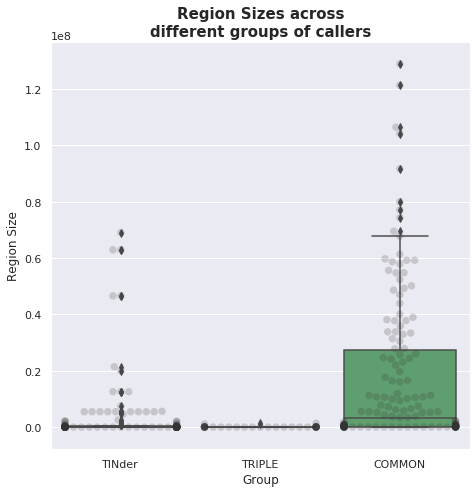

In [271]:
sns.set(rc={'figure.figsize':(7.5,7.5)})
#sns.set_style("white")
ax = sns.boxplot(x='Group',y='SV length', data=sizes_TOTAL_df,order=['TINder','TRIPLE','COMMON'])
ax = sns.swarmplot(x='Group',y='SV length',data=sizes_TOTAL_df, color=".2",size=7.5,alpha=0.2,order=['TINder','TRIPLE','COMMON'])
ax.set_title('Region Sizes across\ndifferent groups of callers',weight='bold',size=15)
ax.set(ylabel='Region Size')
plt.show()

# - Caller Combinations:

In [272]:
#tinder_full_set_INV_DETECT
#triple_full_info_dup_INV_DETECT

In [273]:
print(tinder_full_set_INV_DETECT.shape)
tinder_full_set_INV_DETECT.head(1)

(313, 13)


,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection
9,14,49407635,49461451,53816,INV,IID_H158604_T01_01_WG01,-1,-1.0,21,40,40,14_49407635_14_49461451_IID_H158604_T01_01_WG01,Non Detected


In [274]:
print(triple_full_info_dup_INV_DETECT.shape)
triple_full_info_dup_INV_DETECT.head(1)

(188, 11)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD,keys,Detection
12,13,89110965,89112603,13_89110965_13_89112603_INV_--,INV,IID_H158635_T01_01_WG01,15,36,0,13_89110965_89112603_IID_H158635_T01_01_WG01,Non Detected


In [275]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [276]:
tinder_full_set_INV_DETECT['Callers']=tinder_full_set_INV_DETECT.apply(lambda row: label_caller(row), axis=1)
triple_full_info_dup_INV_DETECT['Callers']=triple_full_info_dup_INV_DETECT.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [277]:
countsTIN=tinder_full_set_INV_DETECT.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       53
             Brass,GRIDSS,SvABA                79
             Brass,GRIDSS                      27
Detected     Brass,SvABA                       15
             Brass,GRIDSS,SvABA               122
             Brass,GRIDSS                      17

- TRIPLE:

In [278]:
countsTRI=triple_full_info_dup_INV_DETECT.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                       7
             Brass,SvABA                       10
             Brass,GRIDSS,SvABA                13
             Brass,GRIDSS                       8
Detected     GRIDSS,SvABA                      20
             Brass,SvABA                       10
             Brass,GRIDSS,SvABA               108
             Brass,GRIDSS                      12

In [279]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                     17               12
             Brass,GRIDSS,SvABA              122              108
             Brass,SvABA                      15               10
             GRIDSS,SvABA                    NaN               20
Non Detected Brass,GRIDSS                     27                8
             Brass,GRIDSS,SvABA               79               13
             Brass,SvABA                      53               10
             GRIDSS,SvABA                    NaN                7

In [280]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


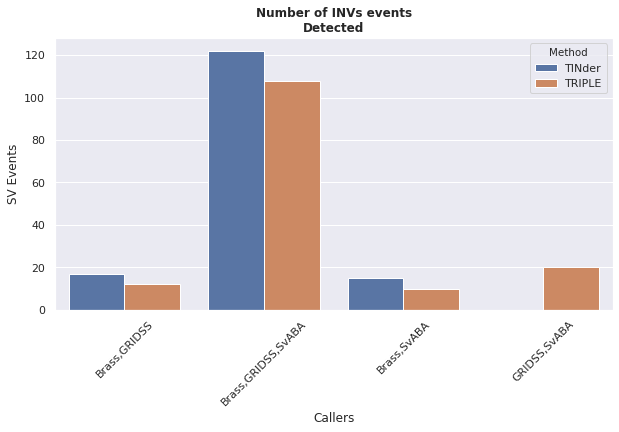

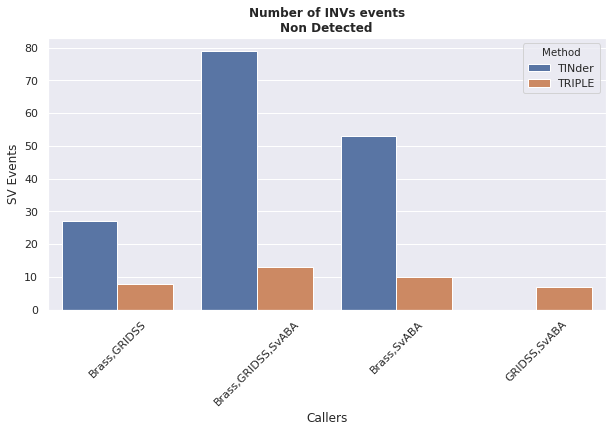

In [281]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of INVs events\nDetected',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of INVs events\nNon Detected',weight='bold')
plt.xticks(rotation=45)
plt.show()

### D) Intersection Translocations:

### 1.1) TINder calls in TRIPLE CALLER.

In [49]:
tinder_full_set_TRA=tinder_full_set[tinder_full_set['SV type']=='TRA']
print(tinder_full_set_TRA.shape)
tinder_full_set_TRA.head()

(368, 15)


,SV chrom,SV start,SV chrom2,SV start2,SV length,SV type,Gene name,STRANDS,GD_AF,GD_POPMAX_AF,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
5,12,6791754,22,41528146,NaN,TRA,ZNF384,++,-1,-1.0,IID_H158604_T01_01_WG01,45,0,60,43
20,3,57440299,6,56757781,NaN,TRA,DNAH12,--,-1,-1.0,IID_H158604_T01_01_WG01,33,0,37,32
22,6,29814678,12,133066751,NaN,TRA,NaN,--,-1,-1.0,IID_H158604_T01_01_WG01,15,1,21,18
26,7,30484963,X,133854098,NaN,TRA,NOD1,+-,-1,-1.0,IID_H158604_T01_01_WG01,6,0,0,11
96,2,3931651,12,124499974,NaN,TRA,NaN,++,-1,-1.0,IID_H158606_T01_01_WG01,56,24,72,0


- keys TINder:

In [74]:
#Formatting
tinder_full_set_TRA_only=pd.DataFrame(columns=['SV chrom','SV start','SV chrom2','SV start2','SV type','STRANDS','GD_AF','GD_POPMAX_AF','Sample','Gene name','brass_PS','brass_RC','gridss_VF','svaba_AD'])
dict_keys={}
list_keys=[]
for index,row in tinder_full_set_TRA.iterrows():
    #Sex
    if( (row['SV chrom']=='X') | (row['SV chrom2']=='X') | (row['SV chrom']=='Y') | (row['SV chrom2']=='Y')):
        if( (row['SV chrom']=='X') | (row['SV chrom']=='Y') ):
            key=str(row['SV chrom2'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV chrom'])+'_'+str(row['SV chrom'])+'_'+row['STRANDS']+'_'+row['Sample']
        else:
            key=str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+row['STRANDS']+'_'+row['Sample']
    else:   
        if (int(row['SV chrom'])<int(row['SV chrom2'])):
            key=str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+row['STRANDS']+'_'+row['Sample']
        else:
            key=str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+row['STRANDS']+'_'+row['Sample']
    
    
    if not key in dict_keys:
        dict_keys[key]={}
        dict_keys[key]=[]
        tinder_full_set_TRA_only=tinder_full_set_TRA_only.append(row)
        list_keys.append(key)

tinder_full_set_TRA_only=tinder_full_set_TRA_only[['SV chrom','SV start','SV chrom2','SV start2','SV type','STRANDS','GD_AF','GD_POPMAX_AF','Sample','Gene name','brass_PS','brass_RC','gridss_VF','svaba_AD']]
tinder_full_set_TRA_only['keys']=list_keys       

In [75]:
print(tinder_full_set_TRA_only.shape)
tinder_full_set_TRA_only.head()

(368, 15)


,SV chrom,SV start,SV chrom2,SV start2,SV type,STRANDS,GD_AF,GD_POPMAX_AF,Sample,Gene name,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
5,12,6791754,22,41528146,TRA,++,-1,-1.0,IID_H158604_T01_01_WG01,ZNF384,45,0,60,43,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01
20,3,57440299,6,56757781,TRA,--,-1,-1.0,IID_H158604_T01_01_WG01,DNAH12,33,0,37,32,3_57440299_6_56757781_--_IID_H158604_T01_01_WG01
22,6,29814678,12,133066751,TRA,--,-1,-1.0,IID_H158604_T01_01_WG01,NaN,15,1,21,18,6_29814678_12_133066751_--_IID_H158604_T01_01_...
26,7,30484963,X,133854098,TRA,+-,-1,-1.0,IID_H158604_T01_01_WG01,NOD1,6,0,0,11,7_30484963_X_133854098_+-_IID_H158604_T01_01_WG01
96,2,3931651,12,124499974,TRA,++,-1,-1.0,IID_H158606_T01_01_WG01,NaN,56,24,72,0,2_3931651_12_124499974_++_IID_H158606_T01_01_WG01


In [76]:
#Lower chromosome always in the first column:
tinder_full_set_TRA_only_order=tinder_full_set_TRA_only.copy()

#Separate Sex
tinder_full_set_TRA_only_orderNum=tinder_full_set_TRA_only_order[~ ((tinder_full_set_TRA_only_order['SV chrom']=='X')|(tinder_full_set_TRA_only_order['SV chrom']=='Y')| (tinder_full_set_TRA_only_order['SV chrom2']=='X')|(tinder_full_set_TRA_only_order['SV chrom2']=='Y') )]
tinder_full_set_TRA_only_orderSex=tinder_full_set_TRA_only_order[((tinder_full_set_TRA_only_order['SV chrom']=='X')|(tinder_full_set_TRA_only_order['SV chrom']=='Y')| (tinder_full_set_TRA_only_order['SV chrom2']=='X')|(tinder_full_set_TRA_only_order['SV chrom2']=='Y') )]

#Num
tinder_full_set_TRA_only_orderNum['SV chrom']=tinder_full_set_TRA_only_orderNum['SV chrom'].map(int)
tinder_full_set_TRA_only_orderNum['SV chrom2']=tinder_full_set_TRA_only_orderNum['SV chrom2'].map(int)
idx = (tinder_full_set_TRA_only_orderNum['SV chrom'] > tinder_full_set_TRA_only_orderNum['SV chrom'])
tinder_full_set_TRA_only_orderNum.loc[idx,['SV chrom','SV chrom2','SV start','SV start2']] = tinder_full_set_TRA_only_orderNum.loc[idx,['SV chrom2','SV chrom','SV start2','SV start']].values

#Sex
idxx1 = (tinder_full_set_TRA_only_orderSex['SV chrom'] == 'X')
idxx2 = (tinder_full_set_TRA_only_orderSex['SV chrom'] == 'Y')
tinder_full_set_TRA_only_orderSex.loc[idxx1,['SV chrom','SV chrom2','SV start','SV start2']] = tinder_full_set_TRA_only_orderSex.loc[idxx1,['SV chrom2','SV chrom','SV start2','SV start']].values
tinder_full_set_TRA_only_orderSex.loc[idxx2,['SV chrom','SV chrom2','SV start','SV start2']] = tinder_full_set_TRA_only_orderSex.loc[idxx2,['SV chrom2','SV chrom','SV start2','SV start']].values

#Merge
tinder_full_set_TRA_only_order=tinder_full_set_TRA_only_orderNum.append(tinder_full_set_TRA_only_orderSex).reset_index()
print(tinder_full_set_TRA_only_order.shape)
tinder_full_set_TRA_only_order.head()

(368, 16)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site

,index,SV chrom,SV start,SV chrom2,SV start2,SV type,STRANDS,GD_AF,GD_POPMAX_AF,Sample,Gene name,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
0,5,12,6791754,22,41528146,TRA,++,-1,-1.0,IID_H158604_T01_01_WG01,ZNF384,45,0,60,43,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01
1,20,3,57440299,6,56757781,TRA,--,-1,-1.0,IID_H158604_T01_01_WG01,DNAH12,33,0,37,32,3_57440299_6_56757781_--_IID_H158604_T01_01_WG01
2,22,6,29814678,12,133066751,TRA,--,-1,-1.0,IID_H158604_T01_01_WG01,NaN,15,1,21,18,6_29814678_12_133066751_--_IID_H158604_T01_01_...
3,96,2,3931651,12,124499974,TRA,++,-1,-1.0,IID_H158606_T01_01_WG01,NaN,56,24,72,0,2_3931651_12_124499974_++_IID_H158606_T01_01_WG01
4,120,8,66514692,11,55053049,TRA,--,-1,-1.0,IID_H158606_T01_01_WG01,ARMC1,22,0,0,21,8_66514692_11_55053049_--_IID_H158606_T01_01_WG01


In [77]:
tinder_full_set_TRA_only_order_2intersect=tinder_full_set_TRA_only_order[['SV chrom','SV start','SV chrom2','SV start2','GD_AF','GD_POPMAX_AF','SV type','STRANDS','Sample','keys','brass_PS','brass_RC','gridss_VF','svaba_AD']]
#tinder_full_DEL_2intersect=tinder_full_DEL[['chr1','start1','start2','SV length','brass_score','SV type','DHFC','DHFFC','DHBFC','blacklist','Sample']]

tinder_full_set_TRA_only_order_2intersect['GD_AF']=tinder_full_set_TRA_only_order_2intersect['GD_AF'].map(int)
tinder_full_set_TRA_only_order_2intersect['GD_POPMAX_AF']=tinder_full_set_TRA_only_order_2intersect['GD_POPMAX_AF'].map(int)

#tinder_full_DEL_2intersect['start1']=tinder_full_DEL_2intersect['start1'].map(int)

print(tinder_full_set_TRA_only_order_2intersect.shape)
tinder_full_set_TRA_only_order_2intersect.head()

(368, 14)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,STRANDS,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,6791754,22,41528146,-1,-1,TRA,++,IID_H158604_T01_01_WG01,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01,45,0,60,43
1,3,57440299,6,56757781,-1,-1,TRA,--,IID_H158604_T01_01_WG01,3_57440299_6_56757781_--_IID_H158604_T01_01_WG01,33,0,37,32
2,6,29814678,12,133066751,-1,-1,TRA,--,IID_H158604_T01_01_WG01,6_29814678_12_133066751_--_IID_H158604_T01_01_...,15,1,21,18
3,2,3931651,12,124499974,-1,-1,TRA,++,IID_H158606_T01_01_WG01,2_3931651_12_124499974_++_IID_H158606_T01_01_WG01,56,24,72,0
4,8,66514692,11,55053049,-1,-1,TRA,--,IID_H158606_T01_01_WG01,8_66514692_11_55053049_--_IID_H158606_T01_01_WG01,22,0,0,21


In [78]:
tinder_full_set_TRA_only_order_2intersect[tinder_full_set_TRA_only_order_2intersect['Sample']=='IID_H158604_T01_01_WG01']

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,STRANDS,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,6791754,22,41528146,-1,-1,TRA,++,IID_H158604_T01_01_WG01,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01,45,0,60,43
1,3,57440299,6,56757781,-1,-1,TRA,--,IID_H158604_T01_01_WG01,3_57440299_6_56757781_--_IID_H158604_T01_01_WG01,33,0,37,32
2,6,29814678,12,133066751,-1,-1,TRA,--,IID_H158604_T01_01_WG01,6_29814678_12_133066751_--_IID_H158604_T01_01_...,15,1,21,18
334,7,30484963,X,133854098,-1,-1,TRA,+-,IID_H158604_T01_01_WG01,7_30484963_X_133854098_+-_IID_H158604_T01_01_WG01,6,0,0,11


### - IMPORTANT: sort before remove duplicates, in order to eliminate just the rows in which brass, gridss and svaaba are equal to cero.

In [79]:
triple_full_info_dup_TRA=triple_full_info_dup[triple_full_info_dup['SV type']=='TRA']
print(triple_full_info_dup_TRA.shape)
triple_full_info_dup_TRA.head()

(424, 10)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD
39,5,91140686,91140687,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,10,3,11,11
40,5,121735582,121735583,5_121735582_7_39434467_TRA_-+,TRA,IID_H158612_T01_01_WG01,15,8,22,21
239,7,32355672,32355673,5_91140686_7_32355672_TRA_+-,TRA,IID_H158612_T01_01_WG01,0,0,0,0
244,7,39434467,39434468,5_121735582_7_39434467_TRA_-+,TRA,IID_H158612_T01_01_WG01,0,0,0,0
3,14,106329704,106329705,14_106329704_20_48820040_TRA_++,TRA,IID_H158619_T01_01_WG01,44,20,63,42


In [80]:
tra2_chr=[]
tra2_pos=[]
strands=[]

for index,row in triple_full_info_dup_TRA.iterrows():
    chrom1=row['ID'].split('_')[0]
    pos1=row['ID'].split('_')[1]   
    chrom2=row['ID'].split('_')[2]
    pos2=row['ID'].split('_')[3]
    strand=row['ID'].split('_')[5]
    
    if (str(row['SV chrom'])==str(chrom1)):  
        tra2_chr.append(chrom2)
        tra2_pos.append(pos2)
    else:
        #print(row['SV chrom'],chrom1)
        tra2_chr.append(chrom1)
        tra2_pos.append(pos1)
    
    strands.append(strand)

triple_full_info_dup_TRA['SV chrom2']=tra2_chr
triple_full_info_dup_TRA['SV start2']=tra2_pos
triple_full_info_dup_TRA['STRANDS']=strands

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to 

In [81]:
triple_full_info_dup_TRA=triple_full_info_dup_TRA.sort_values(by=['brass_PS','gridss_VF','svaba_AD'],ascending=False)
triple_full_info_dup_TRA.drop_duplicates(subset='ID',keep='first',inplace=True)
triple_full_info_dup_TRA.shape

(212, 13)

- keys TRIPLE:

In [82]:
keys=[]
for index,row in triple_full_info_dup_TRA.iterrows():
    keys.append(str(row['SV chrom'])+'_'+str(row['SV start'])+'_'+str(row['SV chrom2'])+'_'+str(row['SV start2'])+'_'+row['STRANDS']+'_'+row['Sample'])
triple_full_info_dup_TRA_key=triple_full_info_dup_TRA.copy()
triple_full_info_dup_TRA_key['keys']=keys
triple_full_info_dup_TRA_key.head()

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,STRANDS,keys
182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,32,118,53,8,128756921,-+,6_89259203_8_128756921_-+_IID_H158617_T01_01_WG01
20673,4,31299869,31299870,4_31299869_11_116966714_TRA_--,TRA,IID_H158636_T01_01_WG01,9,24,44,0,11,116966714,--,4_31299869_11_116966714_--_IID_H158636_T01_01_...
0,1,3689668,3689669,1_3689668_5_174621621_TRA_--,TRA,IID_H158613_T01_01_WG01,9,0,22,13,5,174621621,--,1_3689668_5_174621621_--_IID_H158613_T01_01_WG01
3,12,46124335,46124336,12_46124335_14_22984604_TRA_+-,TRA,IID_H158641_T01_01_WG01,9,4,14,8,14,22984604,+-,12_46124335_14_22984604_+-_IID_H158641_T01_01_...
2,12,6793843,6793844,12_6793843_22_41530230_TRA_++,TRA,IID_H158669_T01_01_WG01,9,0,14,13,22,41530230,++,12_6793843_22_41530230_++_IID_H158669_T01_01_WG01


In [83]:
#Lower chromosome always in the first column:
triple_full_info_dup_TRA_order=triple_full_info_dup_TRA_key.copy()

#Separate Sex
triple_full_info_dup_TRA_key_orderNum=triple_full_info_dup_TRA_key[~ ((triple_full_info_dup_TRA_key['SV chrom']=='X')|(triple_full_info_dup_TRA_key['SV chrom']=='Y')| (triple_full_info_dup_TRA_key['SV chrom2']=='X')|(triple_full_info_dup_TRA_key['SV chrom2']=='Y') )]
triple_full_info_dup_TRA_key_orderSex=triple_full_info_dup_TRA_key[((triple_full_info_dup_TRA_key['SV chrom']=='X')|(triple_full_info_dup_TRA_key['SV chrom']=='Y')| (triple_full_info_dup_TRA_key['SV chrom2']=='X')|(triple_full_info_dup_TRA_key['SV chrom2']=='Y') )]

#Num
triple_full_info_dup_TRA_key_orderNum['SV chrom']=triple_full_info_dup_TRA_key_orderNum['SV chrom'].map(int)
triple_full_info_dup_TRA_key_orderNum['SV chrom2']=triple_full_info_dup_TRA_key_orderNum['SV chrom2'].map(int)
idx = (triple_full_info_dup_TRA_key_orderNum['SV chrom'] > triple_full_info_dup_TRA_key_orderNum['SV chrom'])
triple_full_info_dup_TRA_key_orderNum.loc[idx,['SV chrom','SV chrom2','SV start','SV start2']] = triple_full_info_dup_TRA_key_orderNum.loc[idx,['SV chrom2','SV chrom','SV start2','SV start']].values

#Sex
idxx1 = (triple_full_info_dup_TRA_key_orderSex['SV chrom'] == 'X')
idxx2 = (triple_full_info_dup_TRA_key_orderSex['SV chrom'] == 'Y')
triple_full_info_dup_TRA_key_orderSex.loc[idxx1,['SV chrom','SV chrom2','SV start','SV start2']] = triple_full_info_dup_TRA_key_orderSex.loc[idxx1,['SV chrom2','SV chrom','SV start2','SV start']].values
triple_full_info_dup_TRA_key_orderSex.loc[idxx2,['SV chrom','SV chrom2','SV start','SV start2']] = triple_full_info_dup_TRA_key_orderSex.loc[idxx2,['SV chrom2','SV chrom','SV start2','SV start']].values

#Merge
triple_full_info_dup_TRA_order=triple_full_info_dup_TRA_key_orderNum.append(triple_full_info_dup_TRA_key_orderSex).reset_index()
print(triple_full_info_dup_TRA_order.shape)
triple_full_info_dup_TRA_order.head()

(212, 15)


/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site

,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,STRANDS,keys
0,182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,32,118,53,8,128756921,-+,6_89259203_8_128756921_-+_IID_H158617_T01_01_WG01
1,20673,4,31299869,31299870,4_31299869_11_116966714_TRA_--,TRA,IID_H158636_T01_01_WG01,9,24,44,0,11,116966714,--,4_31299869_11_116966714_--_IID_H158636_T01_01_...
2,0,1,3689668,3689669,1_3689668_5_174621621_TRA_--,TRA,IID_H158613_T01_01_WG01,9,0,22,13,5,174621621,--,1_3689668_5_174621621_--_IID_H158613_T01_01_WG01
3,3,12,46124335,46124336,12_46124335_14_22984604_TRA_+-,TRA,IID_H158641_T01_01_WG01,9,4,14,8,14,22984604,+-,12_46124335_14_22984604_+-_IID_H158641_T01_01_...
4,2,12,6793843,6793844,12_6793843_22_41530230_TRA_++,TRA,IID_H158669_T01_01_WG01,9,0,14,13,22,41530230,++,12_6793843_22_41530230_++_IID_H158669_T01_01_WG01


- Iteration of the "tinder_full_set_TRA_only_order_2intersect" tsv and look for a match in triple_full_info_dup_TRA_key:

In [84]:
print(tinder_full_set_TRA_only_order_2intersect.shape)
tinder_full_set_TRA_only_order_2intersect.head(1)

(368, 14)


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,STRANDS,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,6791754,22,41528146,-1,-1,TRA,++,IID_H158604_T01_01_WG01,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01,45,0,60,43


In [85]:
print(triple_full_info_dup_TRA_order.shape)
triple_full_info_dup_TRA_order.head(1)

(212, 15)


,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,STRANDS,keys
0,182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,32,118,53,8,128756921,-+,6_89259203_8_128756921_-+_IID_H158617_T01_01_WG01


In [86]:
#triple_full_info_dup_TRA_order['SV chrom']=triple_full_info_dup_TRA_order['SV chrom'].map(str)
#triple_full_info_dup_TRA_order['SV chrom2']=triple_full_info_dup_TRA_order['SV chrom2'].map(str)
#triple_full_info_dup_TRA_order['SV start']=triple_full_info_dup_TRA_order['SV start'].map(int)
#triple_full_info_dup_TRA_order['SV start2']=triple_full_info_dup_TRA_order['SV start2'].astype(int)

In [87]:
triple_full_info_dup_TRA_order.head()

,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,STRANDS,keys
0,182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,32,118,53,8,128756921,-+,6_89259203_8_128756921_-+_IID_H158617_T01_01_WG01
1,20673,4,31299869,31299870,4_31299869_11_116966714_TRA_--,TRA,IID_H158636_T01_01_WG01,9,24,44,0,11,116966714,--,4_31299869_11_116966714_--_IID_H158636_T01_01_...
2,0,1,3689668,3689669,1_3689668_5_174621621_TRA_--,TRA,IID_H158613_T01_01_WG01,9,0,22,13,5,174621621,--,1_3689668_5_174621621_--_IID_H158613_T01_01_WG01
3,3,12,46124335,46124336,12_46124335_14_22984604_TRA_+-,TRA,IID_H158641_T01_01_WG01,9,4,14,8,14,22984604,+-,12_46124335_14_22984604_+-_IID_H158641_T01_01_...
4,2,12,6793843,6793844,12_6793843_22_41530230_TRA_++,TRA,IID_H158669_T01_01_WG01,9,0,14,13,22,41530230,++,12_6793843_22_41530230_++_IID_H158669_T01_01_WG01


In [88]:
chr_list1=[]
chr_list2=[]
for index,row in tinder_full_set_TRA_only_order_2intersect.iterrows():
    #print(row['SV chrom'])
    if ((row['SV chrom']=='X') | (row['SV chrom']=='Y')):
        chr_list1.append(row['SV chrom'])
    else:
        #print(row['SV chrom'])
        chr_list1.append(row['SV chrom'])

    if ((row['SV chrom2']=='X') | (row['SV chrom2']=='Y')):
        chr_list2.append(row['SV chrom2'])
    else:
        chr_list2.append(row['SV chrom2'])
    
    
    tinder_full_set_TRA_only_order_2intersect_chr2=tinder_full_set_TRA_only_order_2intersect.copy()
tinder_full_set_TRA_only_order_2intersect_chr2['SV chrom']=chr_list1
tinder_full_set_TRA_only_order_2intersect_chr2['SV chrom2']=chr_list2

In [89]:
tinder_full_set_TRA_only_order_2intersect_chr2.head()

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,STRANDS,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD
0,12,6791754,22,41528146,-1,-1,TRA,++,IID_H158604_T01_01_WG01,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01,45,0,60,43
1,3,57440299,6,56757781,-1,-1,TRA,--,IID_H158604_T01_01_WG01,3_57440299_6_56757781_--_IID_H158604_T01_01_WG01,33,0,37,32
2,6,29814678,12,133066751,-1,-1,TRA,--,IID_H158604_T01_01_WG01,6_29814678_12_133066751_--_IID_H158604_T01_01_...,15,1,21,18
3,2,3931651,12,124499974,-1,-1,TRA,++,IID_H158606_T01_01_WG01,2_3931651_12_124499974_++_IID_H158606_T01_01_WG01,56,24,72,0
4,8,66514692,11,55053049,-1,-1,TRA,--,IID_H158606_T01_01_WG01,8_66514692_11_55053049_--_IID_H158606_T01_01_WG01,22,0,0,21


In [90]:
intersect_TRA=pd.DataFrame(columns=['SV chrom','SV start','SV chrom2','SV start2','GD_AF','GD_POPMAX_AF','SV type','STRANDS','Sample','brass_PS','brass_RC','gridss_VF','svaba_AD'])
intersect_TRA2=pd.DataFrame()

#intersect_TRA=pd.DataFrame(columns=['chr1','start1','end1','chr2','start2','end2','brass_score','svclass','sample','assembly_score','copynumber_flag','micro-homology','assembled read count','gene1','region1','gene2','region2'])

for index,row in tinder_full_set_TRA_only_order_2intersect_chr2.iterrows():
    for index2,row2 in triple_full_info_dup_TRA_order.iterrows():
        #print(str(row['SV chrom2']),str(row2['SV chrom2']))
        #print(str(row['SV chrom']),str(row2['SV chrom']),'\n')
        #Check chromosomes
        if((str(row['SV chrom'])==str(row2['SV chrom'])) & (str(row['SV chrom2'])==str(row2['SV chrom2'])) & (row['STRANDS']==row2['STRANDS']) ):
            #print(row['SV chrom2'],row2['SV chrom2'])
            #print(row['SV chrom'],row2['SV chrom'])
            #Check Window of overlapping
            window1_1=row['SV start']-10000
            window1_2=row['SV start']+10000
            window2_1=row['SV start2']-10000
            window2_2=row['SV start2']+10000
            if((int(row2['SV start']) >=  window1_1) & (int(row2['SV start']) <=  window1_2) & (int(row2['SV start2']) >=  window2_1) & (int(row2['SV start2']) <=  window2_2) & (str(row['Sample'])==str(row2['Sample'])  )):
                intersect_TRA=intersect_TRA.append(row)
                intersect_TRA2=intersect_TRA2.append(row2)

print(intersect_TRA.shape)
print(len(intersect_TRA['keys'].unique()))
intersect_TRA.head()

(189, 14)
189


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,STRANDS,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,keys
0,12,6791754,22,41528146,-1,-1,TRA,++,IID_H158604_T01_01_WG01,45,0,60,43,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01
14,8,38257261,17,27420720,-1,-1,TRA,-+,IID_H158609_T01_01_WG01,18,9,25,18,8_38257261_17_27420720_-+_IID_H158609_T01_01_WG01
15,8,38276409,17,27420993,-1,-1,TRA,+-,IID_H158609_T01_01_WG01,31,13,44,26,8_38276409_17_27420993_+-_IID_H158609_T01_01_WG01
19,12,6794078,19,15482853,-1,-1,TRA,+-,IID_H158610_T01_01_WG01,49,0,66,30,12_6794078_19_15482853_+-_IID_H158610_T01_01_WG01
20,12,6794082,19,15482867,-1,-1,TRA,-+,IID_H158610_T01_01_WG01,42,0,67,0,12_6794082_19_15482867_-+_IID_H158610_T01_01_WG01


In [91]:
#Detection TINder

detection=[]
for index,row in tinder_full_set_TRA_only_order_2intersect.iterrows():
    if (row['keys'] in list(intersect_TRA['keys'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')
        
tinder_full_set_TRA_only_order_2intersect_DETECT=tinder_full_set_TRA_only_order_2intersect.copy()
tinder_full_set_TRA_only_order_2intersect_DETECT['Detection']=detection

In [92]:
print(tinder_full_set_TRA_only_order_2intersect_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in tinder_full_set_TRA_only_order_2intersect_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(368, 15)
189 179


In [93]:
#Joe
tinder_full_set_TRA_only_order_2intersect_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_TRA_only_order_DETECT_ORIENTATION.tsv',sep='\t')

In [94]:
tinder_full_set_TRA_only_order_2intersect_DETECT.head(1)

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,STRANDS,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD,Detection
0,12,6791754,22,41528146,-1,-1,TRA,++,IID_H158604_T01_01_WG01,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01,45,0,60,43,Detected


In [95]:
intersect_TRA2.head()

,ID,STRANDS,SV chrom,SV chrom2,SV end,SV start,SV start2,SV type,Sample,brass_PS,brass_RC,gridss_VF,index,keys,svaba_AD
39,12_6791754_22_41528146_TRA_++,++,12,22,6791755.0,6791754.0,41528146,TRA,IID_H158604_T01_01_WG01,45,0,60,2.0,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01,43
162,8_38257261_17_27420723_TRA_-+,-+,8,17,38257262.0,38257261.0,27420723,TRA,IID_H158609_T01_01_WG01,18,9,25,20.0,8_38257261_17_27420723_-+_IID_H158609_T01_01_WG01,18
114,8_38276410_17_27420993_TRA_+-,+-,8,17,38276411.0,38276410.0,27420993,TRA,IID_H158609_T01_01_WG01,31,14,44,22.0,8_38276410_17_27420993_+-_IID_H158609_T01_01_WG01,26
32,12_6794078_19_15482853_TRA_+-,+-,12,19,6794079.0,6794078.0,15482853,TRA,IID_H158610_T01_01_WG01,49,0,66,0.0,12_6794078_19_15482853_+-_IID_H158610_T01_01_WG01,30
46,12_6794082_19_15482867_TRA_-+,-+,12,19,6794083.0,6794082.0,15482867,TRA,IID_H158610_T01_01_WG01,42,0,67,2.0,12_6794082_19_15482867_-+_IID_H158610_T01_01_WG01,33


In [96]:
#Detection Triple Caller

detection=[]
for index,row in triple_full_info_dup_TRA_key.iterrows():
    if (row['ID'] in list(intersect_TRA2['ID'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')
        
triple_full_info_dup_TRA_key_DETECT=triple_full_info_dup_TRA_key.copy()
triple_full_info_dup_TRA_key_DETECT['Detection']=detection

In [97]:
print(triple_full_info_dup_TRA_key_DETECT.shape)

detected_count=0
nondetected_count=0
for index,row in triple_full_info_dup_TRA_key_DETECT.iterrows():
    if (str(row['Detection'])=='Detected'):
         detected_count += 1
    else:
        nondetected_count += 1

print(detected_count,nondetected_count)

(212, 15)
189 23


In [98]:
#Joe
triple_full_info_dup_TRA_key_DETECT.reset_index().to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_TRA_key_DETECT_ORIENTATION.tsv',sep='\t')

In [99]:
intersect_TRA.drop_duplicates(inplace=True)
print(intersect_TRA.shape)

(189, 14)


In [100]:
intersect_TRA2.drop_duplicates(inplace=True)
print(intersect_TRA2.shape)

(189, 15)


- TRAs Analysis:

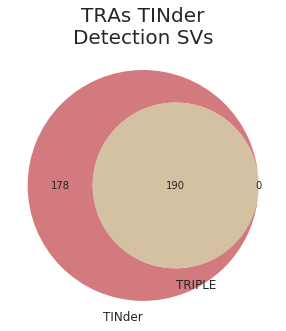

In [78]:
venn2(subsets = (178,0,190), set_labels = ('TINder', 'TRIPLE'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('TRAs TINder\nDetection SVs',fontsize=20)
plt.show()

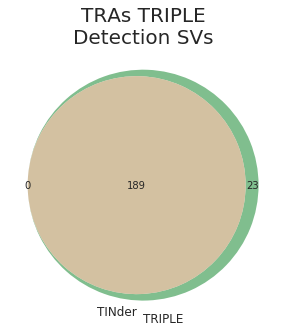

In [79]:
venn2(subsets = (0,23,189), set_labels = ('TINder', 'TRIPLE'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('TRAs TRIPLE\nDetection SVs',fontsize=20)
plt.show()

- TRAs Analysis ORIENTATION:

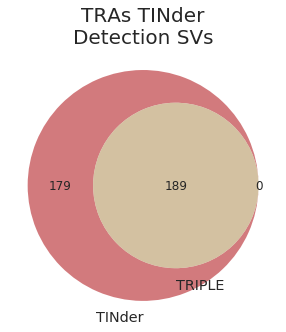

In [101]:
venn2(subsets = (179,0,189), set_labels = ('TINder', 'TRIPLE'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('TRAs TINder\nDetection SVs',fontsize=20)
plt.show()

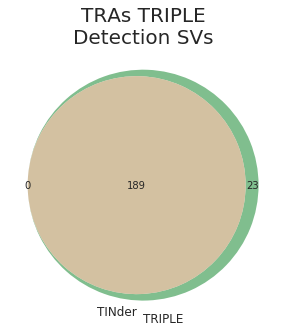

In [102]:
venn2(subsets = (0,23,189), set_labels = ('TINder', 'TRIPLE'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('TRAs TRIPLE\nDetection SVs',fontsize=20)
plt.show()

- green area:

In [103]:
triple_full_info_dup_TRA_key_DETECT_check=triple_full_info_dup_TRA_key_DETECT[~((triple_full_info_dup_TRA_key_DETECT['SV chrom']=='X') | (triple_full_info_dup_TRA_key_DETECT['SV chrom']=='Y'))]

triple_full_info_dup_TRA_key_DETECT_check['SV start']=triple_full_info_dup_TRA_key_DETECT_check['SV start'].map(int)
triple_full_info_dup_TRA_key_DETECT_check['SV chrom']=triple_full_info_dup_TRA_key_DETECT_check['SV chrom'].map(int)

triple_full_info_dup_TRA_key_DETECT_check[triple_full_info_dup_TRA_key_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index()

,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,STRANDS,keys,Detection
0,2,1,33476441,33476442,1_33476441_2_32048478_TRA_+-,TRA,IID_H158650_T01_01_WG01,13,0,0,15,2,32048478,+-,1_33476441_2_32048478_+-_IID_H158650_T01_01_WG01,Non Detected
1,3854,1,80326198,80326199,1_80326198_5_180712856_TRA_-+,TRA,IID_H158613_T01_01_WG01,27,8,32,14,5,180712856,-+,1_80326198_5_180712856_-+_IID_H158613_T01_01_WG01,Non Detected
2,0,1,89682910,89682911,1_89682910_2_194077140_TRA_+-,TRA,IID_H158638_T01_01_WG01,7,0,0,11,2,194077140,+-,1_89682910_2_194077140_+-_IID_H158638_T01_01_WG01,Non Detected
3,4147,1,104102371,104102372,1_104102371_22_18114064_TRA_-+,TRA,IID_H158613_T01_01_WG01,40,0,82,46,22,18114064,-+,1_104102371_22_18114064_-+_IID_H158613_T01_01_...,Non Detected
4,4149,1,104102646,104102647,1_104102646_22_18128918_TRA_++,TRA,IID_H158613_T01_01_WG01,19,18,32,33,22,18128918,++,1_104102646_22_18128918_++_IID_H158613_T01_01_...,Non Detected
5,0,1,168186421,168186422,1_168186421_3_53175884_TRA_+-,TRA,IID_H158666_T01_01_WG01,11,0,0,11,3,53175884,+-,1_168186421_3_53175884_+-_IID_H158666_T01_01_WG01,Non Detected
6,1,1,182274315,182274316,1_182274315_3_53175884_TRA_--,TRA,IID_H158666_T01_01_WG01,18,0,0,17,3,53175884,--,1_182274315_3_53175884_--_IID_H158666_T01_01_WG01,Non Detected
7,6,1,210891618,210891619,1_210891618_19_45732644_TRA_++,TRA,IID_H158650_T01_01_WG01,17,0,0,23,19,45732644,++,1_210891618_19_45732644_++_IID_H158650_T01_01_...,Non Detected
8,17234,1,213298664,213298665,1_213298664_4_141692656_TRA_--,TRA,IID_H158636_T01_01_WG01,40,12,45,43,4,141692656,--,1_213298664_4_141692656_--_IID_H158636_T01_01_...,Non Detected
9,18137,1,228850775,228850776,1_228850775_9_129376542_TRA_+-,TRA,IID_H158636_T01_01_WG01,33,18,44,19,9,129376542,+-,1_228850775_9_129376542_+-_IID_H158636_T01_01_...,Non Detected


- red area:

In [104]:
tinder_full_set_TRA_only_order_2intersect_DETECT_check=tinder_full_set_TRA_only_order_2intersect_DETECT[~((tinder_full_set_TRA_only_order_2intersect_DETECT['SV chrom']=='X') | (tinder_full_set_TRA_only_order_2intersect_DETECT['SV chrom']=='Y'))]

tinder_full_set_TRA_only_order_2intersect_DETECT_check['SV start']=tinder_full_set_TRA_only_order_2intersect_DETECT_check['SV start'].map(int)
tinder_full_set_TRA_only_order_2intersect_DETECT_check['SV chrom']=tinder_full_set_TRA_only_order_2intersect_DETECT_check['SV chrom'].map(int)

tinder_full_set_TRA_only_order_2intersect_DETECT_check[tinder_full_set_TRA_only_order_2intersect_DETECT_check['Detection']=='Non Detected'].sort_values(by=['SV chrom','SV start']).reset_index().head()

,index,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,STRANDS,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD,Detection
0,16,1,1331862,14,93638161,-1,-1,TRA,+-,IID_H158610_T01_01_WG01,1_1331862_14_93638161_+-_IID_H158610_T01_01_WG01,13,0,0,13,Non Detected
1,235,1,1778568,13,73561100,-1,-1,TRA,++,IID_H158645_T01_01_WG01,1_1778568_13_73561100_++_IID_H158645_T01_01_WG01,13,16,45,0,Non Detected
2,153,1,7923045,16,66524370,-1,-1,TRA,--,IID_H158634_T01_01_WG01,1_7923045_16_66524370_--_IID_H158634_T01_01_WG01,31,0,0,37,Non Detected
3,329,1,7923061,16,66524333,-1,-1,TRA,--,IID_H158671_T01_01_WG01,1_7923061_16_66524333_--_IID_H158671_T01_01_WG01,27,0,0,29,Non Detected
4,288,1,7923187,17,45077397,-1,-1,TRA,++,IID_H158663_T01_01_WG01,1_7923187_17_45077397_++_IID_H158663_T01_01_WG01,10,0,11,0,Non Detected


### - Brass score 10:

In [105]:
print(tinder_full_set_TRA_only_order_2intersect_DETECT.shape)
tinder_full_set_TRA_only_order_2intersect_DETECT.head(1)

(368, 15)


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,STRANDS,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD,Detection
0,12,6791754,22,41528146,-1,-1,TRA,++,IID_H158604_T01_01_WG01,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01,45,0,60,43,Detected


In [106]:
tinder_full_set_TRA_only_order_2intersect_DETECT_score=tinder_full_set_TRA_only_order_2intersect_DETECT[tinder_full_set_TRA_only_order_2intersect_DETECT['brass_PS']>=10]
tinder_full_set_TRA_only_order_2intersect_DETECT_score20=tinder_full_set_TRA_only_order_2intersect_DETECT[tinder_full_set_TRA_only_order_2intersect_DETECT['brass_PS']>=20]
print(tinder_full_set_TRA_only_order_2intersect_DETECT_score['Detection'].value_counts())
print(tinder_full_set_TRA_only_order_2intersect_DETECT['Detection'].value_counts())
print(tinder_full_set_TRA_only_order_2intersect_DETECT_score20['Detection'].value_counts())

Detected        174
Non Detected    134
Name: Detection, dtype: int64
Detected        189
Non Detected    179
Name: Detection, dtype: int64
Detected        144
Non Detected     74
Name: Detection, dtype: int64


In [107]:
print(triple_full_info_dup_TRA_key_DETECT.shape)
triple_full_info_dup_TRA_key_DETECT.head(1)

(212, 15)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,STRANDS,keys,Detection
182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,32,118,53,8,128756921,-+,6_89259203_8_128756921_-+_IID_H158617_T01_01_WG01,Detected


In [108]:
triple_full_info_dup_TRA_key_DETECT['brass_PS']=triple_full_info_dup_TRA_key_DETECT['brass_PS'].map(int)
triple_full_info_dup_TRA_key_DETECT['gridss_VF']=triple_full_info_dup_TRA_key_DETECT['gridss_VF'].map(int)
triple_full_info_dup_TRA_key_DETECT['svaba_AD']=triple_full_info_dup_TRA_key_DETECT['svaba_AD'].map(int)

triple_full_info_dup_TRA_key_DETECT_score=triple_full_info_dup_TRA_key_DETECT[(triple_full_info_dup_TRA_key_DETECT['brass_PS']>=10) | (triple_full_info_dup_TRA_key_DETECT['gridss_VF']>=10) | (triple_full_info_dup_TRA_key_DETECT['svaba_AD']>=10)]
print(triple_full_info_dup_TRA_key_DETECT_score['Detection'].value_counts())
print(triple_full_info_dup_TRA_key_DETECT['Detection'].value_counts())

Detected        187
Non Detected     21
Name: Detection, dtype: int64
Detected        189
Non Detected     23
Name: Detection, dtype: int64


In [109]:
triple_full_info_dup_TRA_key_DETECT['brass_PS']=triple_full_info_dup_TRA_key_DETECT['brass_PS'].map(int)

triple_full_info_dup_TRA_key_DETECT_score=triple_full_info_dup_TRA_key_DETECT[(triple_full_info_dup_TRA_key_DETECT['brass_PS']>=10)]
triple_full_info_dup_TRA_key_DETECT_score20=triple_full_info_dup_TRA_key_DETECT[(triple_full_info_dup_TRA_key_DETECT['brass_PS']>=20)]

print(triple_full_info_dup_TRA_key_DETECT_score['Detection'].value_counts())
print(triple_full_info_dup_TRA_key_DETECT['Detection'].value_counts())
print(triple_full_info_dup_TRA_key_DETECT_score20['Detection'].value_counts())

Detected        166
Non Detected     12
Name: Detection, dtype: int64
Detected        189
Non Detected     23
Name: Detection, dtype: int64
Detected        141
Non Detected      5
Name: Detection, dtype: int64


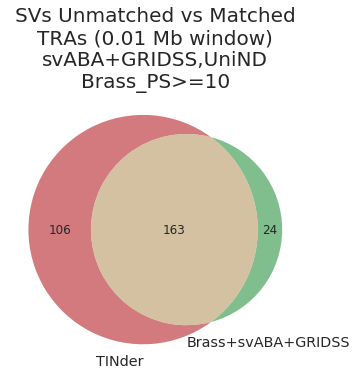

In [777]:
venn2(subsets = (106,24,163), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nTRAs (0.01 Mb window)\nsvABA+GRIDSS,UniND\nBrass_PS>=10',fontsize=20)
plt.show()

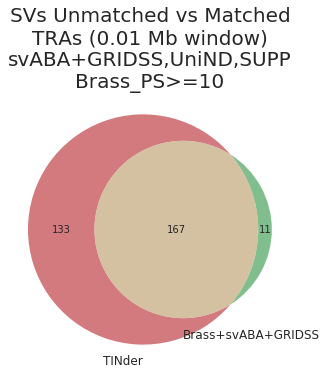

In [339]:
venn2(subsets = (133,11,167), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nTRAs (0.01 Mb window)\nsvABA+GRIDSS,UniND,SUPP\nBrass_PS>=10',fontsize=20)
plt.show()

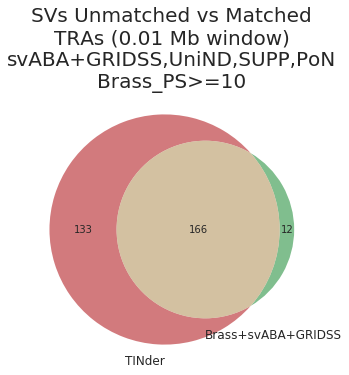

In [319]:
venn2(subsets = (133,12,166), set_labels = ('TINder', 'Brass+svABA+GRIDSS'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('SVs Unmatched vs Matched\nTRAs (0.01 Mb window)\nsvABA+GRIDSS,UniND,SUPP,PoN\nBrass_PS>=10',fontsize=20)
plt.show()

- TRAs Analysis:

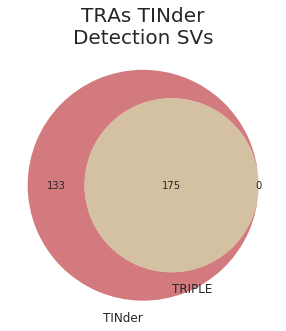

In [86]:
venn2(subsets = (133,0,175), set_labels = ('TINder', 'TRIPLE'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('TRAs TINder\nDetection SVs',fontsize=20)
plt.show()

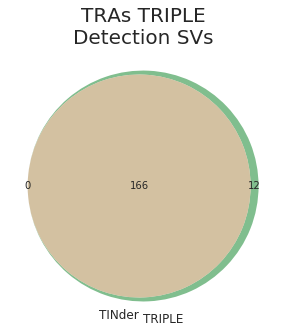

In [87]:
venn2(subsets = (0,12,166), set_labels = ('TINder', 'TRIPLE'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('TRAs TRIPLE\nDetection SVs',fontsize=20)
plt.show()

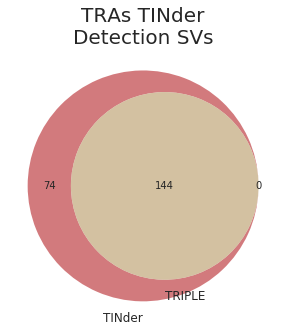

In [92]:
venn2(subsets = (74,0,144), set_labels = ('TINder', 'TRIPLE'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('TRAs TINder\nDetection SVs',fontsize=20)
plt.show()

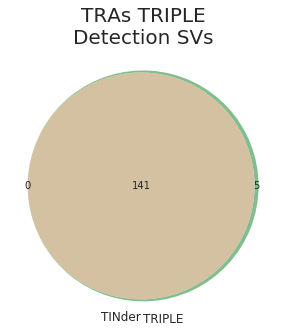

In [93]:
venn2(subsets = (0,5,141), set_labels = ('TINder', 'TRIPLE'),alpha=0.75)
plt.rcParams.update({'font.size': 10})
plt.title('TRAs TRIPLE\nDetection SVs',fontsize=20)
plt.show()

# - Caller Combinations:

In [110]:
#tinder_full_set_TRA_only_order_2intersect_DETECT
#triple_full_info_dup_TRA_key_DETECT

In [111]:
print(tinder_full_set_TRA_only_order_2intersect_DETECT.shape)
tinder_full_set_TRA_only_order_2intersect_DETECT.head(1)

(368, 15)


,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,STRANDS,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD,Detection
0,12,6791754,22,41528146,-1,-1,TRA,++,IID_H158604_T01_01_WG01,12_6791754_22_41528146_++_IID_H158604_T01_01_WG01,45,0,60,43,Detected


In [112]:
print(triple_full_info_dup_TRA_key_DETECT.shape)
triple_full_info_dup_TRA_key_DETECT.head(1)

(212, 15)


,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,STRANDS,keys,Detection
182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,32,118,53,8,128756921,-+,6_89259203_8_128756921_-+_IID_H158617_T01_01_WG01,Detected


In [113]:
#Function to apply calls from SV-detectors
def label_caller (row):
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])>0)):
        return 'Brass,GRIDSS,SvABA'
    if ((int(row['brass_PS'])>0) & (int(row['gridss_VF'])>0) & (int(row['svaba_AD'])==0)):
        return 'Brass,GRIDSS'
    if ((int(row['brass_PS'])>0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])==0)):
        return 'Brass,SvABA'
    if ((int(row['brass_PS'])==0) & (int(row['svaba_AD'])>0) & (int(row['gridss_VF'])>0)):
        return 'GRIDSS,SvABA'

In [114]:
tinder_full_set_TRA_only_order_2intersect_DETECT['Callers']=tinder_full_set_TRA_only_order_2intersect_DETECT.apply(lambda row: label_caller(row), axis=1)
triple_full_info_dup_TRA_key_DETECT['Callers']=triple_full_info_dup_TRA_key_DETECT.apply(lambda row: label_caller(row), axis=1)

- TINder :

In [115]:
countsTIN=tinder_full_set_TRA_only_order_2intersect_DETECT.groupby(['Detection','Callers']).size()
countsTIN=pd.DataFrame(countsTIN).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTIN.columns = ['SV Events TINder']
countsTIN

SV Events TINder
Detection    Callers                             
Non Detected Brass,SvABA                       74
             Brass,GRIDSS,SvABA                57
             Brass,GRIDSS                      48
Detected     Brass,SvABA                        1
             Brass,GRIDSS,SvABA               176
             Brass,GRIDSS                      12

- TRIPLE:

In [116]:
countsTRI=triple_full_info_dup_TRA_key_DETECT.groupby(['Detection','Callers']).size()
countsTRI=pd.DataFrame(countsTRI).sort_values(by=['Detection','Callers'],ascending=False)
#counts['Callers']=counts.index
countsTRI.columns = ['SV Events TRIPLE']
countsTRI

SV Events TRIPLE
Detection    Callers                             
Non Detected GRIDSS,SvABA                       4
             Brass,SvABA                       11
             Brass,GRIDSS,SvABA                 8
Detected     GRIDSS,SvABA                      11
             Brass,SvABA                        2
             Brass,GRIDSS,SvABA               165
             Brass,GRIDSS                      11

In [117]:
comb=pd.concat([countsTIN, countsTRI], axis=1, sort=False)
comb['SV Events TINder']=countsTIN['SV Events TINder'].map(str)
comb['SV Events TRIPLE']=countsTRI['SV Events TRIPLE'].map(str)
comb

SV Events TINder SV Events TRIPLE
Detection    Callers                                             
Detected     Brass,GRIDSS                     12               11
             Brass,GRIDSS,SvABA              176              165
             Brass,SvABA                       1                2
             GRIDSS,SvABA                    NaN               11
Non Detected Brass,GRIDSS                     48              NaN
             Brass,GRIDSS,SvABA               57                8
             Brass,SvABA                      74               11
             GRIDSS,SvABA                    NaN                4

In [118]:
#Detected
comb_plot1=comb.loc['Detected']
comb_plot1['Detection']='Detected'
comb_plot1_TIN=comb_plot1[['SV Events TINder','Detection']]
comb_plot1_TIN.columns=['SV Events','Detection']
comb_plot1_TIN['Method']='TINder'
comb_plot1_TRI=comb_plot1[['SV Events TRIPLE','Detection']]
comb_plot1_TRI.columns=['SV Events','Detection']
comb_plot1_TRI['Method']='TRIPLE'
comb_plot1_plot=pd.concat([comb_plot1_TIN, comb_plot1_TRI], axis=0, sort=False)
comb_plot1_plot=comb_plot1_plot.fillna(0)
comb_plot1_plot['Callers']=comb_plot1_plot.index
comb_plot1_plot['SV Events']=comb_plot1_plot['SV Events'].map(int)

#Non Detected
comb_plot2=comb.loc['Non Detected']
comb_plot2['Detection']='Non Detected'
comb_plot2_TIN=comb_plot2[['SV Events TINder','Detection']]
comb_plot2_TIN.columns=['SV Events','Detection']
comb_plot2_TIN['Method']='TINder'
comb_plot2_TRI=comb_plot2[['SV Events TRIPLE','Detection']]
comb_plot2_TRI.columns=['SV Events','Detection']
comb_plot2_TRI['Method']='TRIPLE'
comb_plot2_plot=pd.concat([comb_plot2_TIN, comb_plot2_TRI], axis=0, sort=False)
comb_plot2_plot=comb_plot2_plot.fillna(0)
comb_plot2_plot['Callers']=comb_plot2_plot.index
comb_plot2_plot['SV Events']=comb_plot2_plot['SV Events'].map(int)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


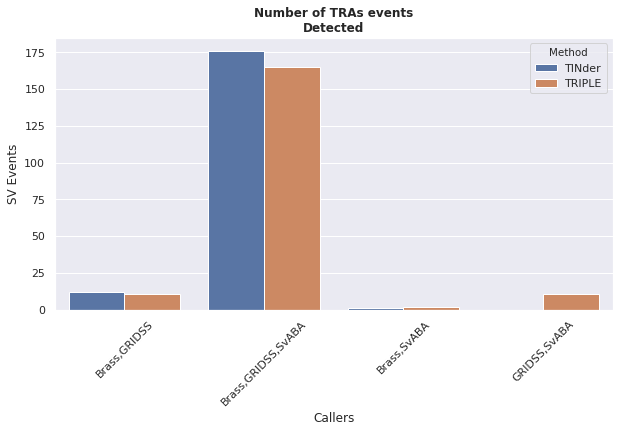

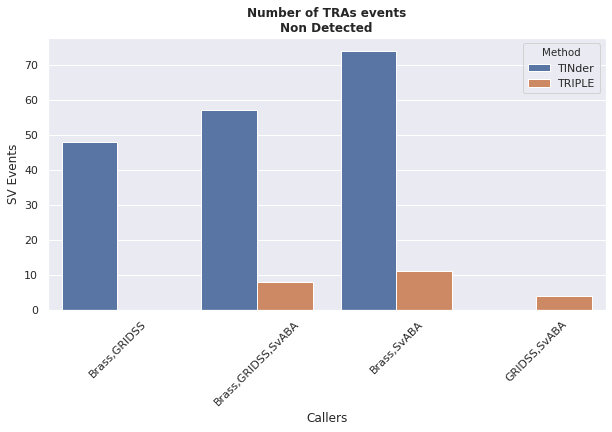

In [119]:
sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot1_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of TRAs events\nDetected',weight='bold')
plt.xticks(rotation=45)
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
#sns.set(style="white")
ax=sns.barplot(data=comb_plot2_plot, x='Callers', y='SV Events',hue='Method')
plt.xticks(rotation=90)
ax.set_title('Number of TRAs events\nNon Detected',weight='bold')
plt.xticks(rotation=45)
plt.show()

### - Clinical Validation:

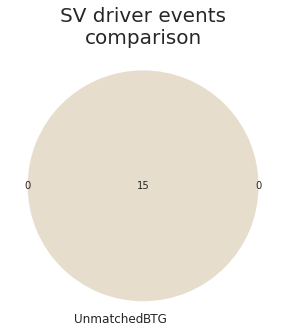

In [375]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,0,15), set_labels = ('Unmatched', 'BTG'))
plt.title('SV driver events\ncomparison',fontsize=20)
plt.show()

In [374]:
SV_drivers=pd.read_csv('/work/isabl/home/gutierj2/uk_all/clinics/SVs/Dan_SVs_Drivers.tsv',sep='\t')
SV_drivers

,ISABL_ID,SV_Known_FusionGene,Detection
0,IID_H158604,EP300-ZNF384,✓
1,IID_H158609,MYO18A-FGFR1,✓
2,IID_H158610,AKAP8-ZNF384,✓
3,IID_H158617,BCL2-IGK,✓
4,IID_H158621,CDKN2A-IGK,✓
5,IID_H158623,ADAMTS14-NF1,✓
6,IID_H158625,PAX5-FOXP1,✓
7,IID_H158627,PAX5-ETV6,✓
8,IID_H158628,P2RY8-CRLF2,✓
9,IID_H158633,EPOR-IGH,✓


In [ ]:
tinder_full_set_TRA_only_order_2intersect_DETECT
triple_full_info_dup_TRA_key_DETECT

- 1) AKAP8-ZNF384:

In [362]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158610_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,6794078,6794079,12_6794078_19_15482853_TRA_+-,TRA,IID_H158610_T01_01_WG01,49,66,30
2,12,6794082,6794083,12_6794082_19_15482867_TRA_-+,TRA,IID_H158610_T01_01_WG01,42,67,33
47,19,15482853,15482854,12_6794078_19_15482853_TRA_+-,TRA,IID_H158610_T01_01_WG01,0,0,0
49,19,15482867,15482868,12_6794082_19_15482867_TRA_-+,TRA,IID_H158610_T01_01_WG01,0,0,0


In [359]:
tinder_full_set_TRA_only_order_2intersect_DETECT[(tinder_full_set_TRA_only_order_2intersect_DETECT['Sample']=='IID_H158610_T01_01_WG01')&(tinder_full_set_TRA_only_order_2intersect_DETECT['SV chrom']==12)]

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD,Detection,Callers
19,12,6794078,19,15482853,-1,-1,TRA,IID_H158610_T01_01_WG01,12_6794078_19_15482853_IID_H158610_T01_01_WG01,49,66,30,Detected,"Brass,GRIDSS,SvABA"
20,12,6794082,19,15482867,-1,-1,TRA,IID_H158610_T01_01_WG01,12_6794082_19_15482867_IID_H158610_T01_01_WG01,42,67,0,Detected,"Brass,GRIDSS"


- 2) P2RY8-CRLF2:

In [365]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158628_T01_01_WG01')&(triple_full_info_dup['SV type']=='DEL')&(triple_full_info_dup['SV chrom']=='X')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
51,X,1335077,1655359,X_1335077_X_1655359_DEL_+-,DEL,IID_H158628_T01_01_WG01,68,95,41


In [364]:
tinder_full_set_DEL_DETECT[(tinder_full_set_DEL_DETECT['Sample']=='IID_H158628_T01_01_WG01')&(tinder_full_set_DEL_DETECT['SV chrom']=='X')]

,SV chrom,SV start,SV start2,SV length,SV type,Sample,GD_AF,GD_POPMAX_AF,brass_PS,gridss_VF,svaba_AD,keys,Detection,Callers
1426,X,1335077,1655359,320282,DEL,IID_H158628_T01_01_WG01,-1,-1.0,68,92,41,X_1335077_X_1655359_IID_H158628_T01_01_WG01,Detected,"Brass,GRIDSS,SvABA"


- 3) TCF3-PBX1:

In [371]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158662_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')&(triple_full_info_dup['SV chrom']==1)]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,1,164674917,164674918,1_164674917_19_1617930_TRA_++,TRA,IID_H158662_T01_01_WG01,65,78,64
2,1,164674923,164674924,1_164674923_19_1617930_TRA_--,TRA,IID_H158662_T01_01_WG01,45,54,52


In [370]:
tinder_full_set_TRA_only_order_2intersect_DETECT[(tinder_full_set_TRA_only_order_2intersect_DETECT['Sample']=='IID_H158662_T01_01_WG01')&(tinder_full_set_TRA_only_order_2intersect_DETECT['SV chrom']==1)]

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD,Detection,Callers
279,1,164674917,19,1617930,-1,-1,TRA,IID_H158662_T01_01_WG01,1_164674917_19_1617930_IID_H158662_T01_01_WG01,65,78,64,Detected,"Brass,GRIDSS,SvABA"
280,1,164674923,19,1617930,-1,-1,TRA,IID_H158662_T01_01_WG01,1_164674923_19_1617930_IID_H158662_T01_01_WG01,45,54,52,Detected,"Brass,GRIDSS,SvABA"


- 4) EP300-ZNF384:

In [371]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158667_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')&(triple_full_info_dup['SV chrom']==12)]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
0,12,6795824,6795825,12_6795824_22_41529661_TRA_++,TRA,IID_H158667_T01_01_WG01,45,65,0
2,12,6795830,6795831,12_6795830_22_41529673_TRA_--,TRA,IID_H158667_T01_01_WG01,53,66,65
129,12,23469283,23469284,12_23469283_13_76225709_TRA_--,TRA,IID_H158667_T01_01_WG01,60,73,72
166,12,27304559,27304560,2_21562923_12_27304559_TRA_--,TRA,IID_H158667_T01_01_WG01,0,0,0
167,12,28836392,28836393,2_21609866_12_28836392_TRA_--,TRA,IID_H158667_T01_01_WG01,0,0,0
168,12,28861157,28861158,2_22483072_12_28861157_TRA_+-,TRA,IID_H158667_T01_01_WG01,0,0,0


In [372]:
tinder_full_set_TRA_only_order_2intersect_DETECT[(tinder_full_set_TRA_only_order_2intersect_DETECT['Sample']=='IID_H158667_T01_01_WG01')&(tinder_full_set_TRA_only_order_2intersect_DETECT['SV chrom']==12)]

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD,Detection,Callers
305,12,6795824,22,41529661,-1,-1,TRA,IID_H158667_T01_01_WG01,12_6795824_22_41529661_IID_H158667_T01_01_WG01,45,65,0,Detected,"Brass,GRIDSS"
306,12,6795830,22,41529673,-1,-1,TRA,IID_H158667_T01_01_WG01,12_6795830_22_41529673_IID_H158667_T01_01_WG01,53,66,65,Detected,"Brass,GRIDSS,SvABA"
307,12,23469283,13,76225709,-1,-1,TRA,IID_H158667_T01_01_WG01,12_23469283_13_76225709_IID_H158667_T01_01_WG01,60,73,72,Detected,"Brass,GRIDSS,SvABA"


- 5) EP300-ZNF384:

In [388]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158671_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
5,12,6792031,6792032,12_6792031_22_41529189_TRA_++,TRA,IID_H158671_T01_01_WG01,38,52,0
7,12,6792034,6792035,12_6792034_22_41529223_TRA_--,TRA,IID_H158671_T01_01_WG01,38,49,48
27,22,41529189,41529190,12_6792031_22_41529189_TRA_++,TRA,IID_H158671_T01_01_WG01,0,0,0
29,22,41529223,41529224,12_6792034_22_41529223_TRA_--,TRA,IID_H158671_T01_01_WG01,0,0,0


In [373]:
tinder_full_set_TRA_only_order_2intersect_DETECT[(tinder_full_set_TRA_only_order_2intersect_DETECT['Sample']=='IID_H158671_T01_01_WG01')&(tinder_full_set_TRA_only_order_2intersect_DETECT['SV chrom']==12)]

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD,Detection,Callers
330,12,6792031,22,41529189,-1,-1,TRA,IID_H158671_T01_01_WG01,12_6792031_22_41529189_IID_H158671_T01_01_WG01,38,52,0,Detected,"Brass,GRIDSS"
331,12,6792034,22,41529223,-1,-1,TRA,IID_H158671_T01_01_WG01,12_6792034_22_41529223_IID_H158671_T01_01_WG01,38,49,48,Detected,"Brass,GRIDSS,SvABA"


In [387]:
tinder_full_set_TRA_only_order_2intersect_DETECT[(tinder_full_set_TRA_only_order_2intersect_DETECT['Sample']=='IID_H158633_T01_01_WG01')&(tinder_full_set_TRA_only_order_2intersect_DETECT['SV type']=='TRA')]

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD,Detection,Callers
147,10,22889019,19,21907110,-1,-1,TRA,IID_H158633_T01_01_WG01,10_22889019_19_21907110_IID_H158633_T01_01_WG01,39,45,39,Non Detected,"Brass,GRIDSS,SvABA"
148,10,22889032,19,21950350,-1,-1,TRA,IID_H158633_T01_01_WG01,10_22889032_19_21950350_IID_H158633_T01_01_WG01,8,47,31,Non Detected,"Brass,GRIDSS,SvABA"
149,10,22889056,19,21948638,-1,-1,TRA,IID_H158633_T01_01_WG01,10_22889056_19_21948638_IID_H158633_T01_01_WG01,13,0,13,Non Detected,"Brass,SvABA"
150,14,106330461,19,11496111,-1,-1,TRA,IID_H158633_T01_01_WG01,14_106330461_19_11496111_IID_H158633_T01_01_WG01,39,58,36,Detected,"Brass,GRIDSS,SvABA"
151,14,106845322,19,11488884,-1,-1,TRA,IID_H158633_T01_01_WG01,14_106845322_19_11488884_IID_H158633_T01_01_WG01,28,44,48,Detected,"Brass,GRIDSS,SvABA"
152,8,28593049,20,36304596,-1,-1,TRA,IID_H158633_T01_01_WG01,8_28593049_20_36304596_IID_H158633_T01_01_WG01,5,10,9,Detected,"Brass,GRIDSS,SvABA"


In [384]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158623_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
21,14,107128948,107128949,14_107128948_20_48822512_TRA_+-,TRA,IID_H158623_T01_01_WG01,0,32,17
24,20,48822512,48822513,14_107128948_20_48822512_TRA_+-,TRA,IID_H158623_T01_01_WG01,0,0,0
41,6,87855904,87855905,6_87855904_X_44746405_TRA_++,TRA,IID_H158623_T01_01_WG01,10,15,15
42,6,87889781,87889782,6_87889781_X_44743944_TRA_--,TRA,IID_H158623_T01_01_WG01,10,18,16
44,6,87890227,87890228,6_87890227_X_44773236_TRA_++,TRA,IID_H158623_T01_01_WG01,13,18,17
52,X,44743944,44743945,6_87889781_X_44743944_TRA_--,TRA,IID_H158623_T01_01_WG01,0,0,0
60,X,44746405,44746406,6_87855904_X_44746405_TRA_++,TRA,IID_H158623_T01_01_WG01,0,0,0
62,X,44773236,44773237,6_87890227_X_44773236_TRA_++,TRA,IID_H158623_T01_01_WG01,0,0,0


6) NF1:

In [388]:
triple_full_info_dup[(triple_full_info_dup['Sample']=='IID_H158623_T01_01_WG01')&(triple_full_info_dup['SV type']=='TRA')]

,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,gridss_VF,svaba_AD
21,14,107128948,107128949,14_107128948_20_48822512_TRA_+-,TRA,IID_H158623_T01_01_WG01,0,32,17
24,20,48822512,48822513,14_107128948_20_48822512_TRA_+-,TRA,IID_H158623_T01_01_WG01,0,0,0
41,6,87855904,87855905,6_87855904_X_44746405_TRA_++,TRA,IID_H158623_T01_01_WG01,10,15,15
42,6,87889781,87889782,6_87889781_X_44743944_TRA_--,TRA,IID_H158623_T01_01_WG01,10,18,16
44,6,87890227,87890228,6_87890227_X_44773236_TRA_++,TRA,IID_H158623_T01_01_WG01,13,18,17
52,X,44743944,44743945,6_87889781_X_44743944_TRA_--,TRA,IID_H158623_T01_01_WG01,0,0,0
60,X,44746405,44746406,6_87855904_X_44746405_TRA_++,TRA,IID_H158623_T01_01_WG01,0,0,0
62,X,44773236,44773237,6_87890227_X_44773236_TRA_++,TRA,IID_H158623_T01_01_WG01,0,0,0


In [392]:
tinder_full_set_TRA_only_order_2intersect_DETECT[(tinder_full_set_TRA_only_order_2intersect_DETECT['Sample']=='IID_H158623_T01_01_WG01')]

,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,gridss_VF,svaba_AD,Detection,Callers
107,10,6116222,13,31412736,-1,-1,TRA,IID_H158623_T01_01_WG01,10_6116222_13_31412736_IID_H158623_T01_01_WG01,7,60,0,Non Detected,"Brass,GRIDSS"
108,14,102878068,17,29458909,-1,-1,TRA,IID_H158623_T01_01_WG01,14_102878068_17_29458909_IID_H158623_T01_01_WG01,20,59,37,Non Detected,"Brass,GRIDSS,SvABA"
109,14,107128948,20,48822512,-1,-1,TRA,IID_H158623_T01_01_WG01,14_107128948_20_48822512_IID_H158623_T01_01_WG01,24,32,17,Detected,"Brass,GRIDSS,SvABA"
110,2,140881013,13,106418329,-1,-1,TRA,IID_H158623_T01_01_WG01,2_140881013_13_106418329_IID_H158623_T01_01_WG01,25,57,21,Non Detected,"Brass,GRIDSS,SvABA"
111,2,140881021,13,106418162,-1,-1,TRA,IID_H158623_T01_01_WG01,2_140881021_13_106418162_IID_H158623_T01_01_WG01,18,44,43,Non Detected,"Brass,GRIDSS,SvABA"
112,3,20013551,19,39199733,-1,-1,TRA,IID_H158623_T01_01_WG01,3_20013551_19_39199733_IID_H158623_T01_01_WG01,14,43,13,Non Detected,"Brass,GRIDSS,SvABA"
113,3,20013746,19,39199582,-1,-1,TRA,IID_H158623_T01_01_WG01,3_20013746_19_39199582_IID_H158623_T01_01_WG01,13,0,12,Non Detected,"Brass,SvABA"
114,3,48251933,12,56925714,-1,-1,TRA,IID_H158623_T01_01_WG01,3_48251933_12_56925714_IID_H158623_T01_01_WG01,20,64,29,Non Detected,"Brass,GRIDSS,SvABA"
115,3,48252061,19,37048910,-1,-1,TRA,IID_H158623_T01_01_WG01,3_48252061_19_37048910_IID_H158623_T01_01_WG01,18,57,54,Non Detected,"Brass,GRIDSS,SvABA"
348,6,87855904,X,44746405,-1,-1,TRA,IID_H158623_T01_01_WG01,6_87855904_X_44746405_IID_H158623_T01_01_WG01,10,15,15,Detected,"Brass,GRIDSS,SvABA"
